# Real Business Cycle Theory

New Classical Macroeconomics introduced the efficient markets hypothesis into macroeconomics. This development began largely with focus on inflation expectations. Recall that Keynesians asserted that expectations were driven by animal spirits. In response Friedman articulates adaptive - backward looking - expectations. Agents, he asserted, expect that the future will look like the recent past. Rational expectations moved this discussion further in the direction of agent intelligence, asserting that decisions made by economic agents effectively integrate all available information. Early analyis by Lucas and Sargent focused on the pace of integration of past information into present decisions. If expectations were rational, aggregate demand shocks would only briefly boost real income, with the price level and interest rates immediately adjusting to changing policy stance of the central bank. 

It is only a small jump from this view to the idea that all available information is, on average, *instantly* integrated into agent decisions. Economic conditions are, then, at all times efficient. Any change in expression of agent preferences is interpreted as an exogenous information shock. In this view, aggregate demand shocks are either 1) instantly integrated into agent expectation or 2) are driven endogenously by changes in credit that are a function of supply side changes. Either way, we move into a world where aggregate demand shocks do not play a substantive role in analysis. The significance of nominal factors is discounted entirely Downturns simply reflect changing total factor productivity.

## Business Cycles or Economic Fluctuations

Business cycles are deceptively named. When we refer to the business cycle, we are actually discussing fluctuations in economic activity, namely, real output. When real output increases rapidly, we refer to this as a *boom*. A rapid contraction of real output is a *bust*.

A regular pattern of general economic expansion followed by contraction has been a standard feature of the industrial era. Explanations of business cycles, however, are varied and the subject of controversy. Jevons, for example, hypothesized that [commercial crises coincided with the sunspot cycle](https://www.nature.com/articles/019033d0.pdf). The logic here was that agricultural productivity is a function of fluctuations in solar radiation. Changes in productivity, if this theory was correct, reflect changes in real output. In this sense, the sunspot cycle theory of business cycles was the first real business cycle theory! Of course, the theory required that 1) crop growth was strongly correlated with the cycle and 2) the the impact on agriculture was strong enough to show generate financial crises that are typically associated with business cycles. While the truth of the theory is not obvious, it was a reasonable early attempt to explain the business cycle.

So far, we have concentrated on aggregate fluctuations of the quantity of money. I have detailed a theory of the business cycle, per se, but have presumed that business cycles are aggregate demand driven phenomena. Volatility in either the supply of or demand for money impacts total expenditures, thereby generating excess supplies or demands for money that impact the short-run, or cyclical, component of real income. As we will discuss, real business cycle does not necessarily disregard aggregate demand shocks, but rather, sees them as secondary factor reflecting changes in real income. Since expectations are rational, business cycles are either stochastic or a function of information shocks. 

In general, business cycles appear to have "stylized facts", meaning that certain macroeconomic indicators tend to move either with or against the business cycle. The business cycle is typically defined in terms of productivity and expenditures. Thus, it should be no surprise that consumption and investment are procyclcical. By definition, if GDP is equal to the sum of consumption and investment expenditures, $C+I$, then movements in these variables will be driving the business cycle. 

|Variable|Direction|Timing|
|---|---|---|
|**Production**|||
|*Industrial Production*|Procyclical|Coincident|
|**Expenditure**|||
|*Consumption*|Procyclical|Coincident|
|*Business Fixed Investment*|Procyclical|Coincident|
|*Residential Investment*|Procyclical|Leading|
|*Inventory Investment*|Procyclical|Leading|
|*Government Purchases*|Procyclical|Undesignated|
|**Labour Market Variables**|||
|*Employment*|Procyclical|Coincident|
|*Unemployment*|Countercyclical|No clear pattern|
|*Average Labour Productivity*|Procyclical|Leading|
|*Real Wage*|Procyclical|Undesignated|
|**Money Supply and Inflation**|||
|*Money Supply*|Procyclical|Leading|
|*Inflation*|Procyclical|Lagging|
|**Financial Variables**|||
|*Stock Prices*|Procyclical|Leading|
|*Nominal Interest Rates*|Procyclical|Lagging|
|*Real Interest Rates*|Procyclical|Undesignated|

**Abel and Bernanke (2001) cited in Snowden and Vane**



In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [2]:
data_dict = {"y":"GDPC1",
             "Dollar Index": "DTWEXBGS",
             "CPI":"CPIAUCSL",
             "PCEPI":"PCEPI",
             "$y^*$":"GDPPOT",
             "$Y^*$":"NGDPPOT",
             "C":"PCE",
             "I":"GPDI",
             "Fixed Business Investment":"BOGZ1FA105019005Q",
             "Business Inventories":"BUSINV",
             "Non-Farm Labor Productivity":"OPHNFB",
             # 16+ years, full-time, non-farm, real
             "Wages":"LES1252881600Q",
             "S&P 500":"SP500",
             
            }
rates_dict ={"U":"UNRATE",
             "FFR": "DFF",
             "$r_{3M}$":"TB3MS",
             "$r_{1}$": "DGS1",
             "$r_{10}$": "DGS10",
             "$r_{30}$": "DGS30"}
freq = "M"
start = datetime.datetime(1950, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()
FRED_data = {}
FRED_data["Level"] = gather_data(data_dict, start, 
          end = end, freq = freq)
# data["Level"]["$P_{Deflator}$"] = data["Level"]["Y"].div(data["Level"]["y"])
for y in ["y","$y^*$","$Y^*$", "C", "I", "Fixed Business Investment"]:
    # fill in missing monthly observations since data is quarterly
    FRED_data["Level"][y] = FRED_data["Level"][y].interpolate(method='polynomial', order=3)  

# Transform all nominal values to real values
for key in ["C", "I", "Fixed Business Investment", "Business Inventories", "Non-Farm Labor Productivity","S&P 500"]:
    FRED_data["Level"][key] = FRED_data["Level"][key].div(FRED_data["Level"]["CPI"].div(100))
    

divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", parse_dates = True,
                        sheet_name = "Broad", header  = 1, index_col = "Date")
# resample Annual at Start of month
keys = list(divisia.keys())
divisia = divisia.resample(freq).mean().rename(columns={keys[0]: "M4",
                        keys[2]:"$r_{M4}$"})

FRED_data["Level"]["M4"] = divisia["M4"]
FRED_data["Log"] = np.log(FRED_data["Level"])
FRED_data["Rates"] = FRED_data["Log"].diff(12)
rates =  gather_data(rates_dict, start, 
          end = end, freq = freq)
rates = rates.div(100)
rates["$r_{M4}$"] = divisia["$r_{M4}$"]
rate_keys = list(rates.keys())
for key in rate_keys:
    real_key = "Real " + key
    rates[real_key] = rates[key].sub(FRED_data["Level"]["CPI"].pct_change(12))
    
for key, val in rates.items():
    FRED_data["Rates"][key] = val
FRED_data["Diff Rates"] = FRED_data["Rates"].diff(12)

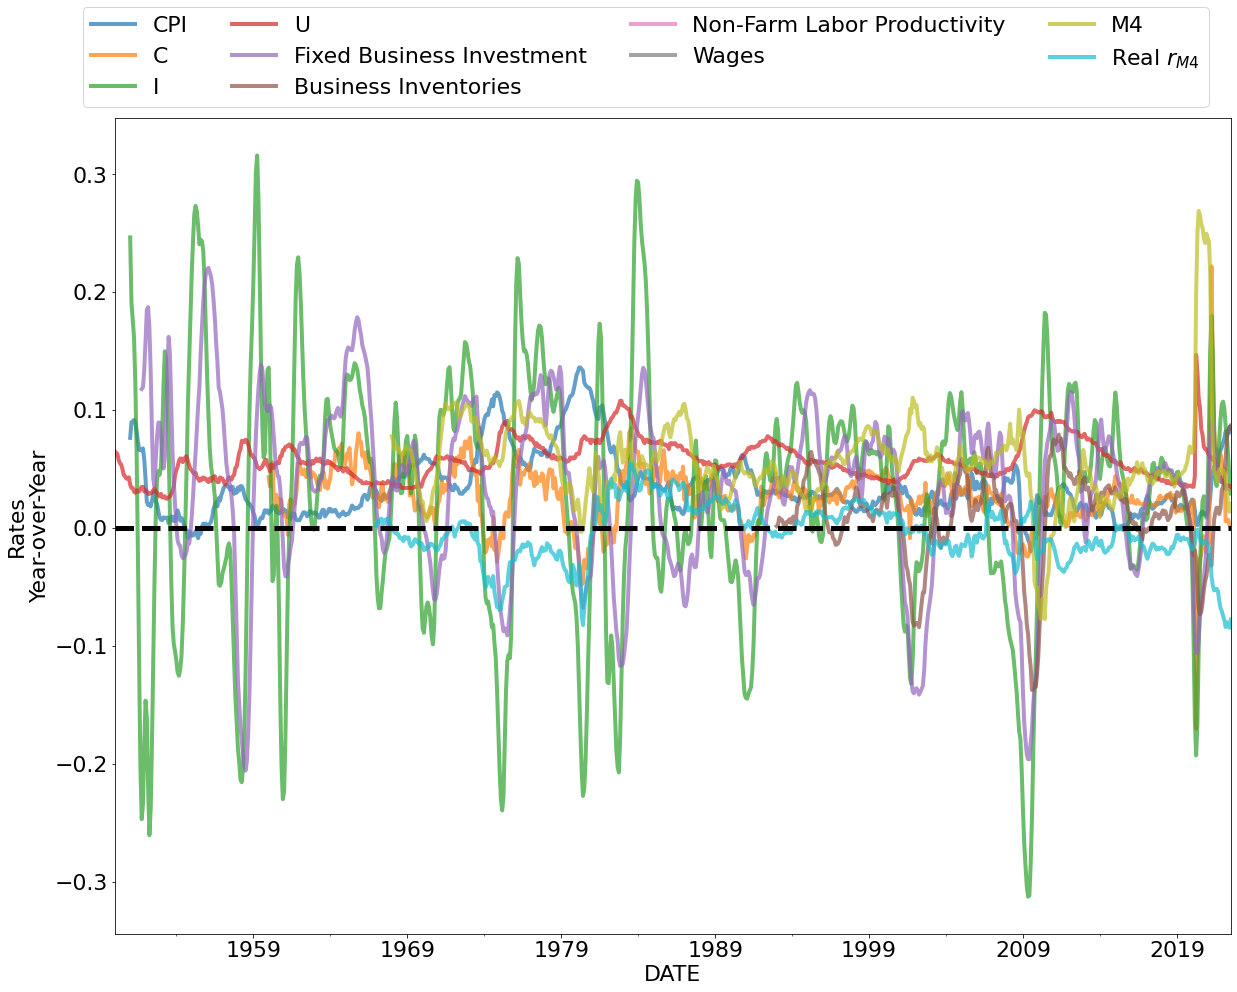

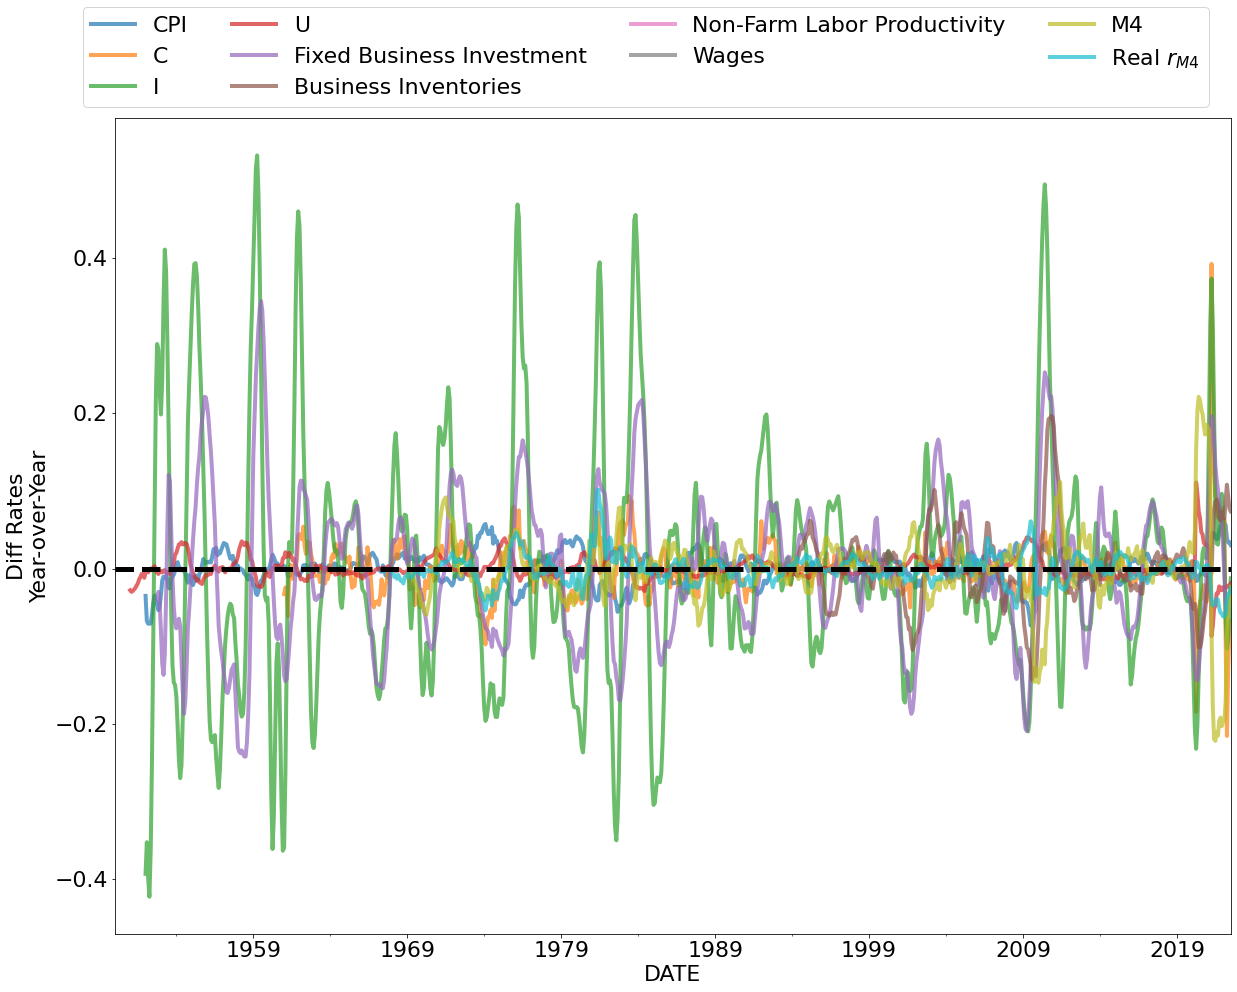

In [3]:
plt.rcParams.update({'font.size': 22})    
plot_vars = ["CPI",
             "C",
             "I",
             "U",
             "Fixed Business Investment",
             "Business Inventories",
             "Non-Farm Labor Productivity",
             # 16+ years, full-time, non-farm
             "Wages",
            "M4",
            "Real $r_{M4}$"]
#              "S&P 500"]
for key in ["Rates", "Diff Rates"]:
    plot_data = FRED_data[key][plot_vars]
    fig, ax = plt.subplots(figsize=(20,15))
    plot_data.plot.line(ax = ax, linewidth = 4, alpha = .7)
    ax.axhline(0, linestyle = "--", color = "k", linewidth = 5)
    ax.legend(ncol = 4, bbox_to_anchor = (.99, 1.15))
    ax.set_ylabel(key +"\nYear-over-Year")

### Macroeconomic Indicators During U.S. Recessions

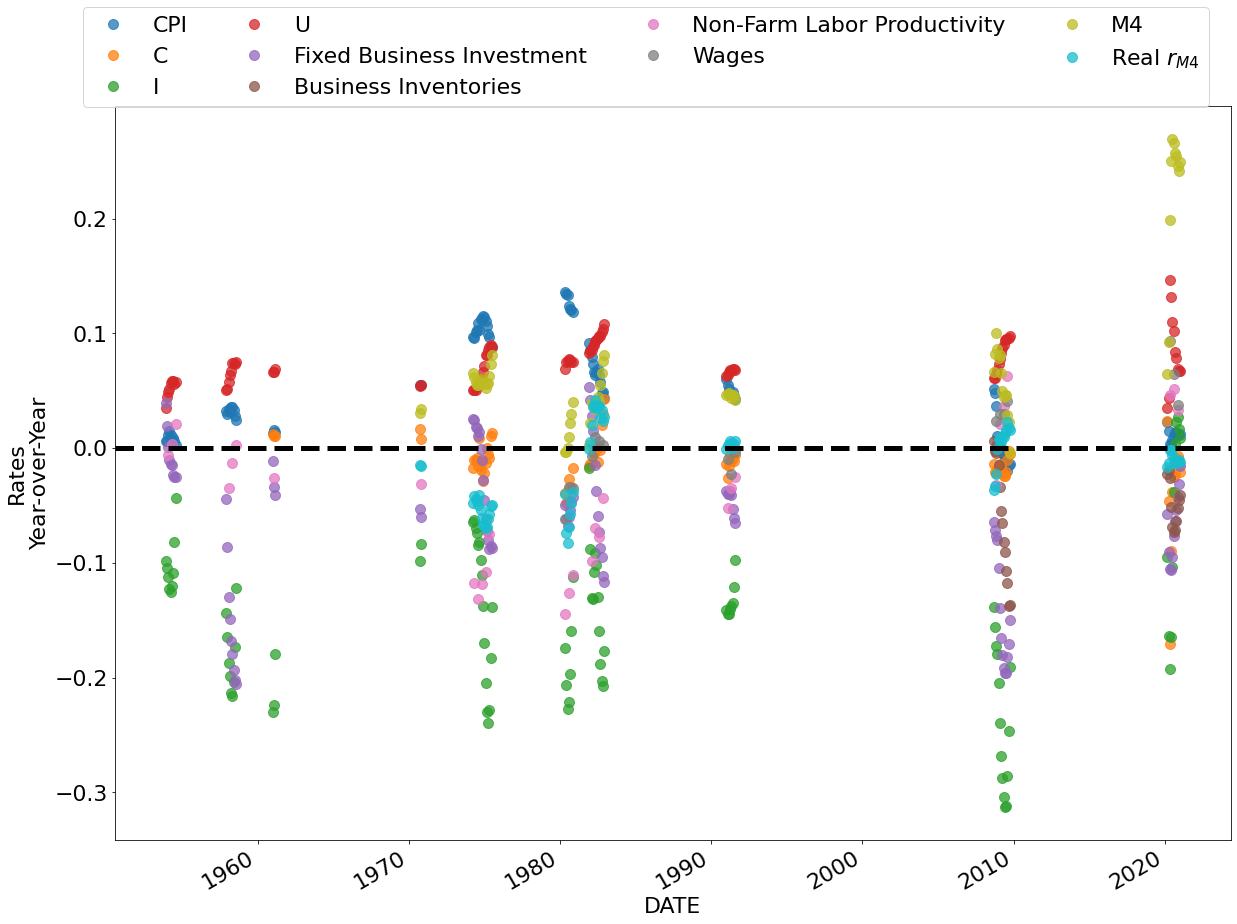

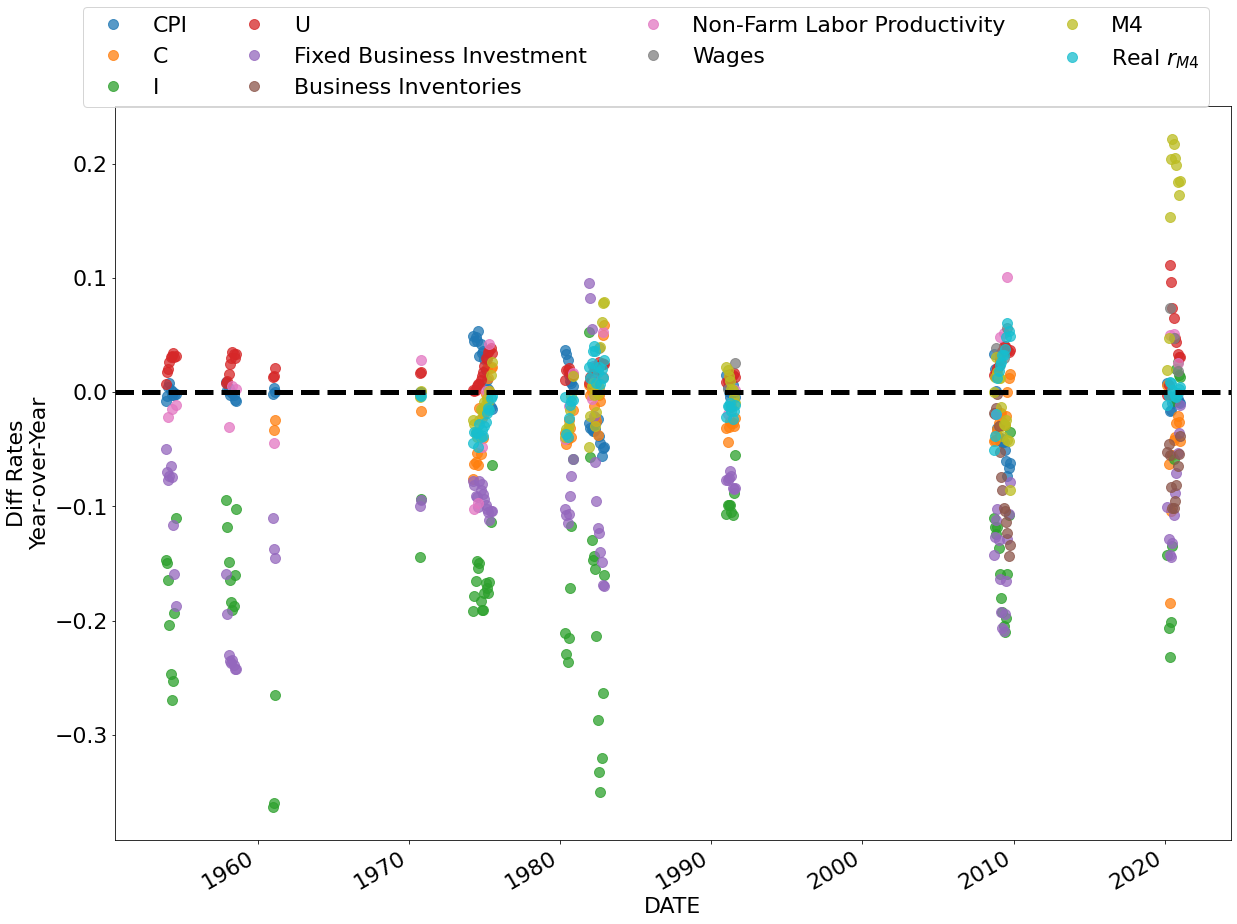

In [4]:
for key in ["Rates", "Diff Rates"]:
    plot_data = FRED_data[key][plot_vars]
    fig, ax = plt.subplots(figsize=(20,15))
    plot_data[FRED_data["Rates"]["y"]<0][plot_vars].plot.line(linestyle = "", marker = "o", markersize = 10, 
                                                              alpha = .75, ax = ax)
    ax.axhline(0, linestyle = "--", color = "k", linewidth = 5)
    ax.set_ylabel(key +"\nYear-over-Year")
    ax.legend(ncol = 4, bbox_to_anchor = (.99, 1.15))

In general, we can see that the table tends to be correct. However, the M4 measure is not exactly consistent with this story. This may be due, in part, to the counter cyclicality of monetary policy.  In the most recent recession, monetary and fiscal policy operated together to increase the rate of growth of currency in circulation and M4. Likewise, inflation is sometime positive during a recession, especially in the case where inflation is generally high and inflation expectations.

If we are to take the data seriously, we should likely delimit the variables under our consideration to a small number of predictable, real factors. Furhter, the timing of chagnes in these macrovariables is often inconsistent. Context matters. While general theories of business cycle can be helpful for anchoring interpretation, it is inappropriate to assert any more than the most general patterns. For example, whether fundamentally driven by a contraction in aggregate supply or demand, downturns tend to be accompanied by a contraction of aggregate demand.

In [5]:
PWT = pd.read_excel("https://www.rug.nl/ggdc/docs/pwt100.xlsx", sheet_name = None)

In [6]:
pd.set_option('display.max_rows', None)
PWT["Legend"]

Variable name  \
0                               Identifier variables   
1                                        countrycode   
2                                            country   
3                                      currency_unit   
4                                               year   
5                                                NaN   
6         Real GDP, employment and population levels   
7                                              rgdpe   
8                                              rgdpo   
9                                                pop   
10                                               emp   
11                                               avh   
12                                                hc   
13                                               NaN   
14                Current price GDP, capital and TFP   
15                                              ccon   
16                                               cda   
17                                             cgdpe   
18                                             cgdpo   
19                                                cn   
20                                                ck   
21                                              ctfp   
22                                             cwtfp   
23                                               NaN   
24                 National accounts-based variables   
25                                            rgdpna   
26                                            rconna   
27                                             rdana   
28                                              rnna   
29                                              rkna   
30                                            rtfpna   
31                                           rwtfpna   
32                                             labsh   
33                                               irr   
34                                             delta   
35                                               NaN   
36               Exchange rates and GDP price levels   
37                                                xr   
38                                            pl_con   
39                                             pl_da   
40                                           pl_gdpo   
41                                               NaN   
42                        Data information variables   
43                                             i_cig   
44                                              i_xm   
45                                              i_xr   
46                                         i_outlier   
47                                             i_irr   
48                                           cor_exp   
49                                           statcap   
50                                               NaN   
51                                   Shares in CGDPo   
52                                             csh_c   
53                                             csh_i   
54                                             csh_g   
55                                             csh_x   
56                                             csh_m   
57                                             csh_r   
58                                               NaN   
59  Price levels, expenditure categories and capital   
60                                              pl_c   
61                                              pl_i   
62                                              pl_g   
63                                              pl_x   
64                                              pl_m   
65                                              pl_n   
66                                              pl_k   

                                  Variable definition  
0                                                 NaN  
1                           3-letter ISO country code  
2                                        Country name  
3     

In [7]:
pd.set_option('display.max_rows', 10)
data = {"Data":PWT["Data"].copy()}
data["Data"]["year"] = pd.to_datetime(data["Data"]["year"].astype(str), yearfirst = True)
data["Data"].set_index(["countrycode", "year"], inplace = True)

In [8]:
price_levels = ["xr", "pl_con", "pl_da", "pl_gdpo"]
employment_variables = ["emp", "avh", "pop", "hc"]
capital_variables = ["rnna", "rtfpna"]
output_variables = ["rgdpna", "rconna", "rdana"]
keys = price_levels + employment_variables + output_variables + capital_variables
data["Data"] = data["Data"][keys].dropna()
# data["Data"]["U"] = data["Data"]["emp"].div(data["Data"]["pop"]).mul(-1) + 1

In [9]:
ccode_dct = dict(set(list(PWT["Data"].reset_index().set_index(["countrycode", "country"]).index)))
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]
lucas_countries = ["Argentina", "Austria", "Belgium", "Canada", "Denmark", 
                   "Germany", "Ireland", "Italy", "Netherlands", "Norway", 
                   "Sweden", "United Kingdom", "United States", 'Venezuela (Bolivarian Republic of)']
oecd_ccodes = []
lucas_ccodes = []
for code, country in ccode_dct.items():
    if country in oecd_countries:
        oecd_ccodes.append(code)
    if country in lucas_countries:
        lucas_ccodes.append(code)


#include all oecd countries and others included by lucas
reg_countries = sorted(list(set(oecd_ccodes + lucas_ccodes)))

# include only the intersecting set of countries
# reg_countries = sorted([country for country in oecd_ccodes if country in lucas_ccodes])

#include only oecd countries
# reg_countries = oecd_ccodes
# reg_countries

In [10]:
plot_vars = keys
data["Data"] = data["Data"][plot_vars]
data["Data"].rename(columns = {"rgdpna":"y",
                               "rnna":"k",
                               "pl_gdpo":"P",
                               "pl_con":"$P_C$",
                               "rtfpna":"A",
                               "rconna":"C"}, inplace = True)
data["Data"]["Contraction"] = (data["Data"]["y"] < data["Data"]["y"].shift()).astype(int)
data["Data"]["L"] = data["Data"]["emp"].mul(data["Data"]["avh"]) 
data["Data"]["$\\frac{y}{pop}$"] = data["Data"]["y"].div(data["Data"]["pop"]) 
data["Data"]["$\\frac{y}{L}$"] = data["Data"]["y"].div(data["Data"]["L"]) 
data["Data"]["$\\frac{k}{L}$"] = data["Data"]["k"].div(data["Data"]["L"]) 


data["Log"] = np.log(data["Data"])
data["Rates"] = data["Log"].groupby("countrycode").diff()
for key in  ["Log", "Rates"]:
    data[key]["Contraction"] = data["Data"]["Contraction"]


In [11]:

# data["Log"]["U"] = data["Data"]["U"]
# plot_data = plot_data.groupby("countrycode").diff()
plot_data = data["Log"].dropna()
plot_data["$AD_t$"] = plot_data["P"].add(plot_data["y"])
# transform y to y / pop
# plot_data["y"] = plot_data["$\\frac{y}{pop}$"]
for var in ["y", "A"]:
    plot_data["$" + var + "_{nt}$"] = np.nan
    plot_data["$" + var + "_{ct}$"] = np.nan


### Average Movements during Downturn in real income

It may be more helpful to visualize the distribution of different components across countries. As before, we will evaluate only OECD countries for the sake of data quality. We will find that, consistently, changes in $A$ are correlated with recession. The trouble with this view, however, is that $A$ is simply a residual. Will improvements in $A$ drive capital accumulation, over accumulation associated with the business cycle tend to yield a fall in $A$. Still, it is a useful fact to note that changes in total factor productivity are the fundamental drive of economic activity. We might not have gotten too far beyond Solow in this respect, however, we can at least investigate the components of these variables and their statistical structure. We will disucss this structure after reviewing cyclical movements in macroeconomic aggregates.

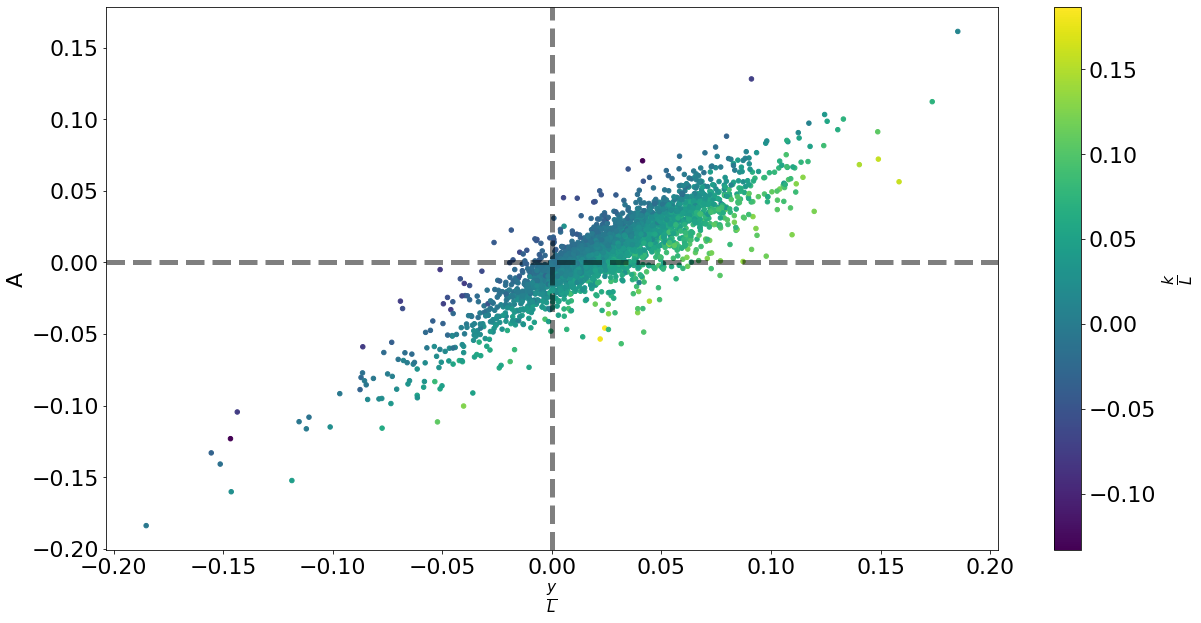

In [12]:
reg_vars = ["$\\frac{y}{L}$", "$\\frac{k}{L}$", "A"]
fig, ax = plt.subplots(figsize = (20,10))
plot_data[reg_vars].groupby("countrycode").diff().plot.scatter(x = reg_vars[0], 
                                                               y = reg_vars[2],
                                                               c = reg_vars[1],
                                                               cmap = "viridis",
                                                               ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, alpha = .5, color = "k")
ax.axvline(0, ls = "--", linewidth = 5, alpha = .5, color = "k")


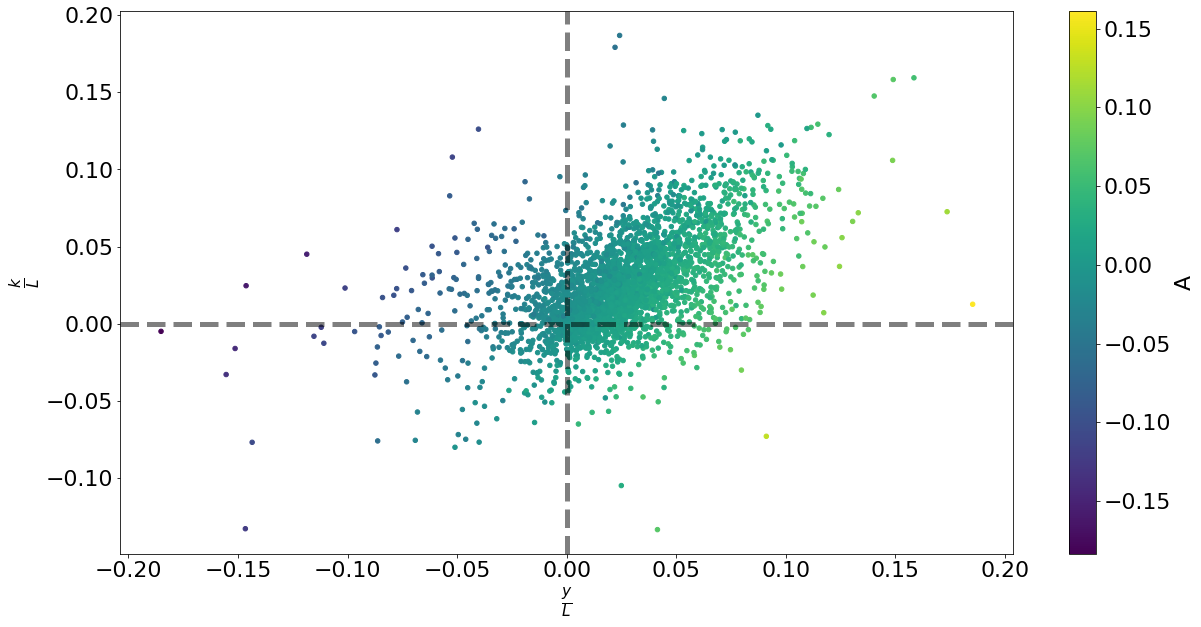

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
plot_data[reg_vars].groupby("countrycode").diff().plot.scatter(x = reg_vars[0], 
                                                               y = reg_vars[1],
                                                               c = reg_vars[2],
                                                               cmap = "viridis",
                                                               ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, alpha = .5, color = "k")
ax.axvline(0, ls = "--", linewidth = 5, alpha = .5, color = "k")

### International Data

Our view of the features of business cycles may be better informed by an international view. We will take the average of relevant variables during downturns in each country using the Penn World Tables.

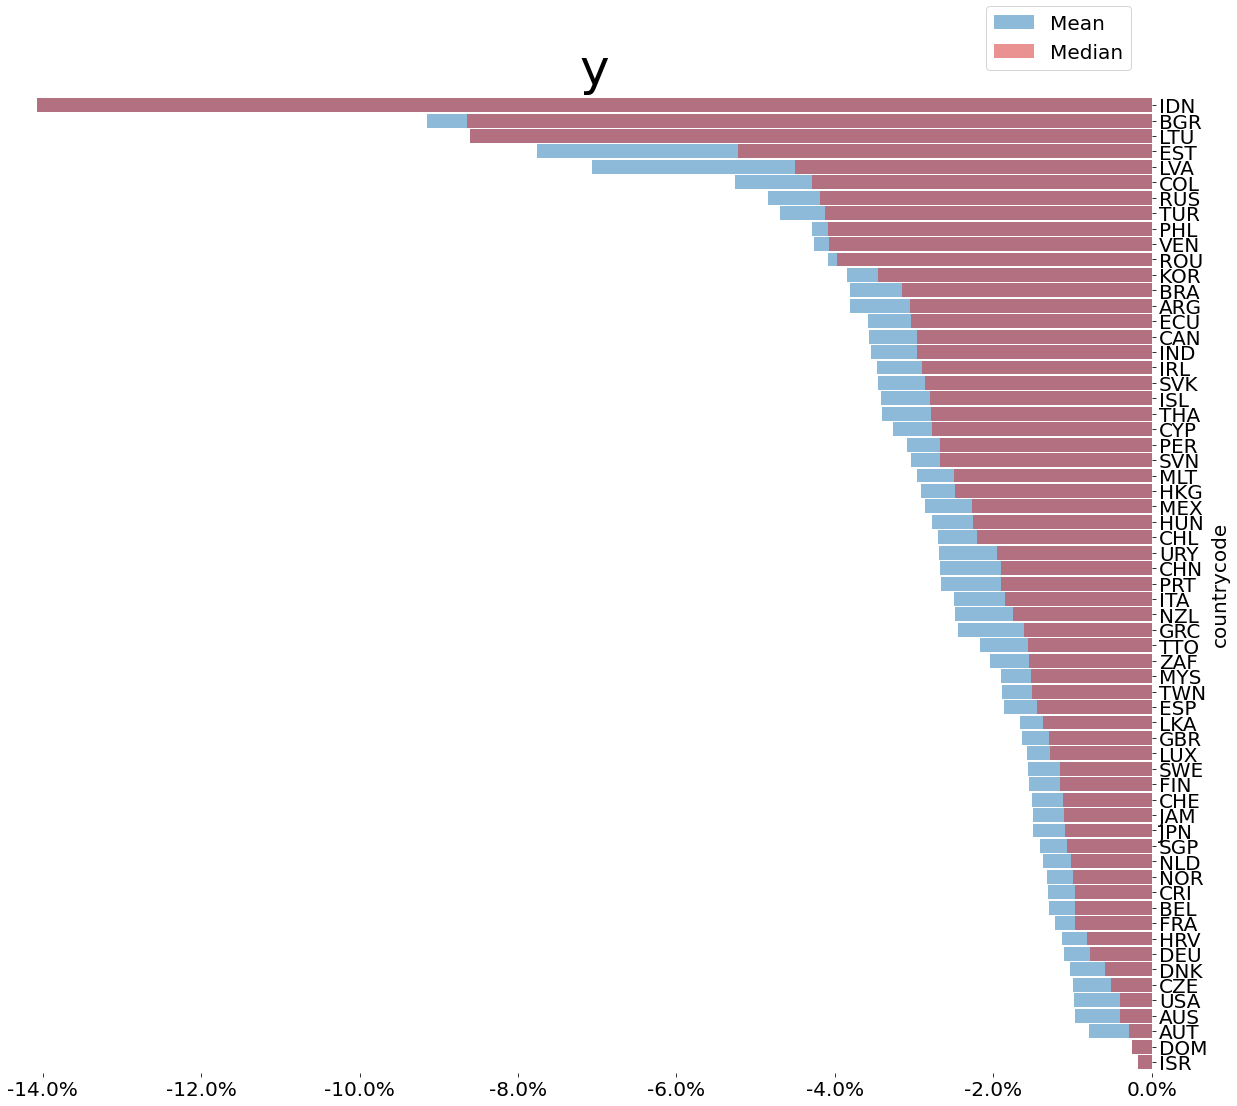

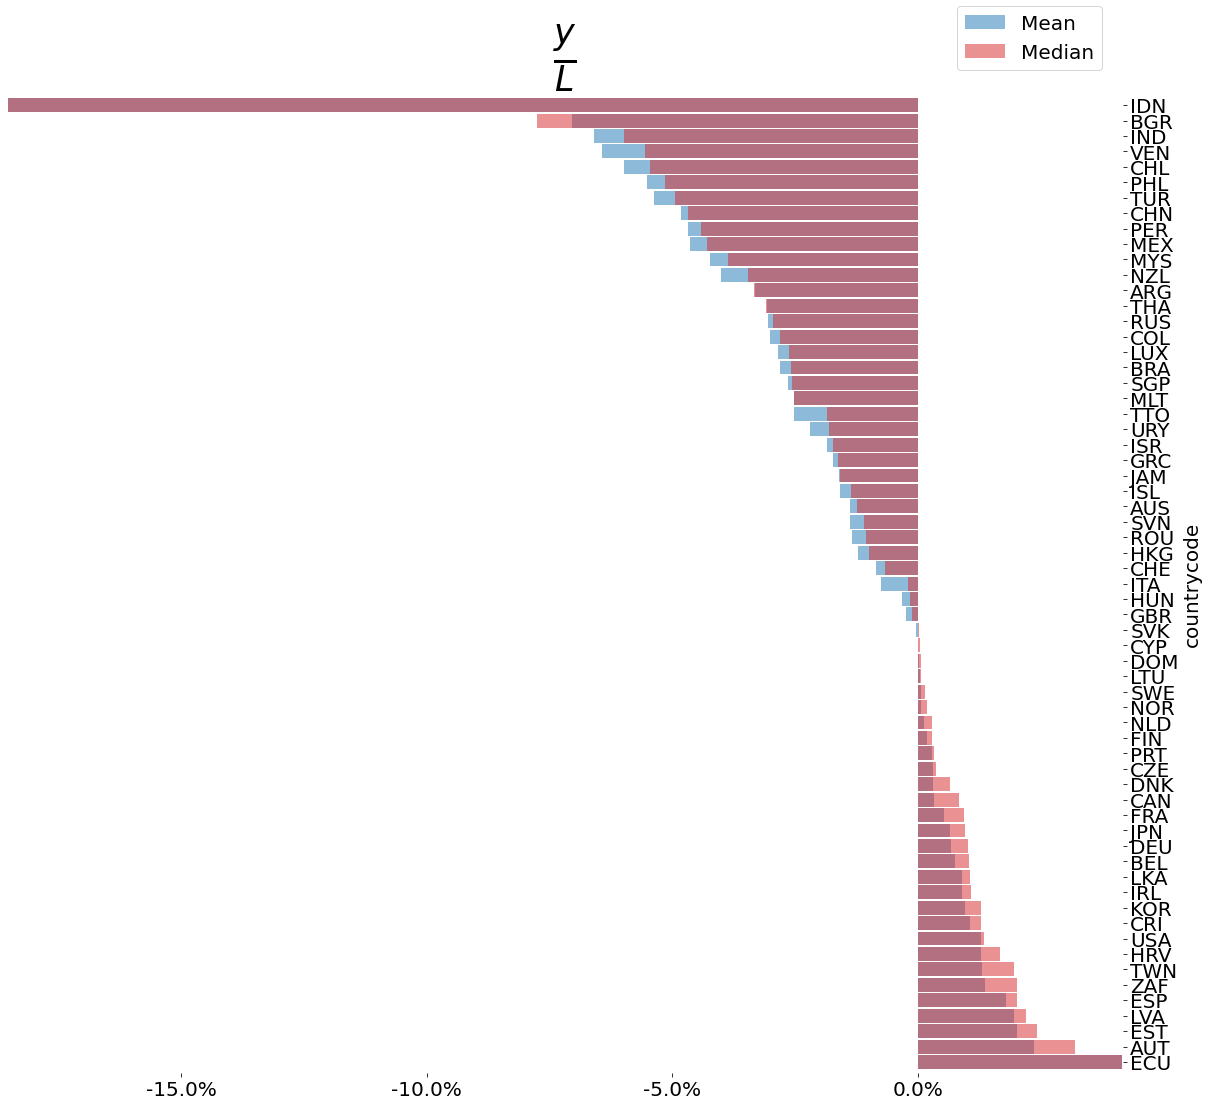

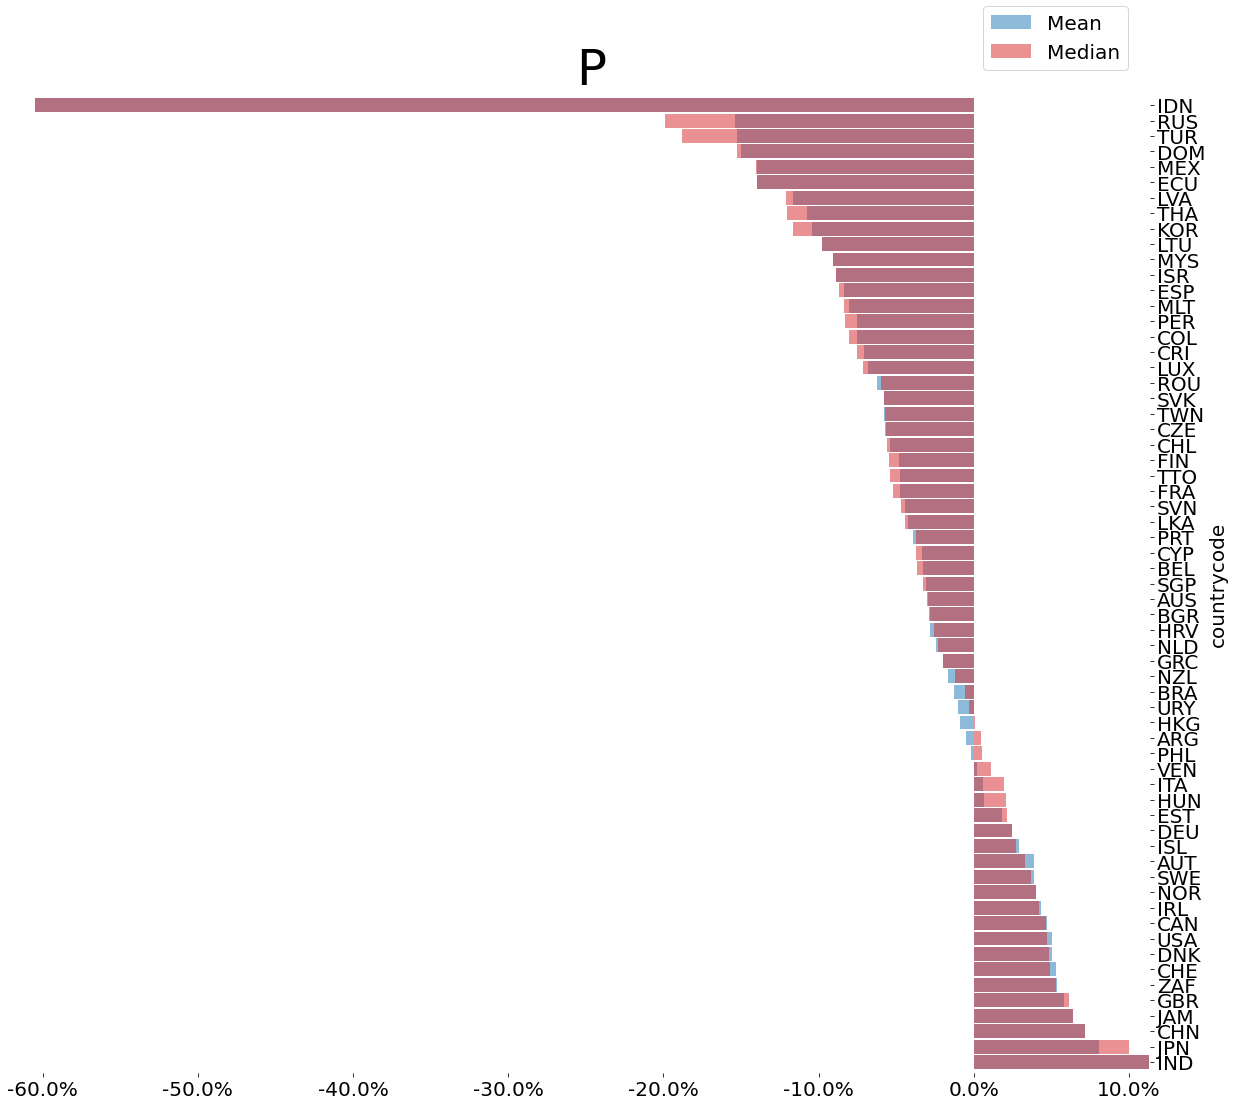

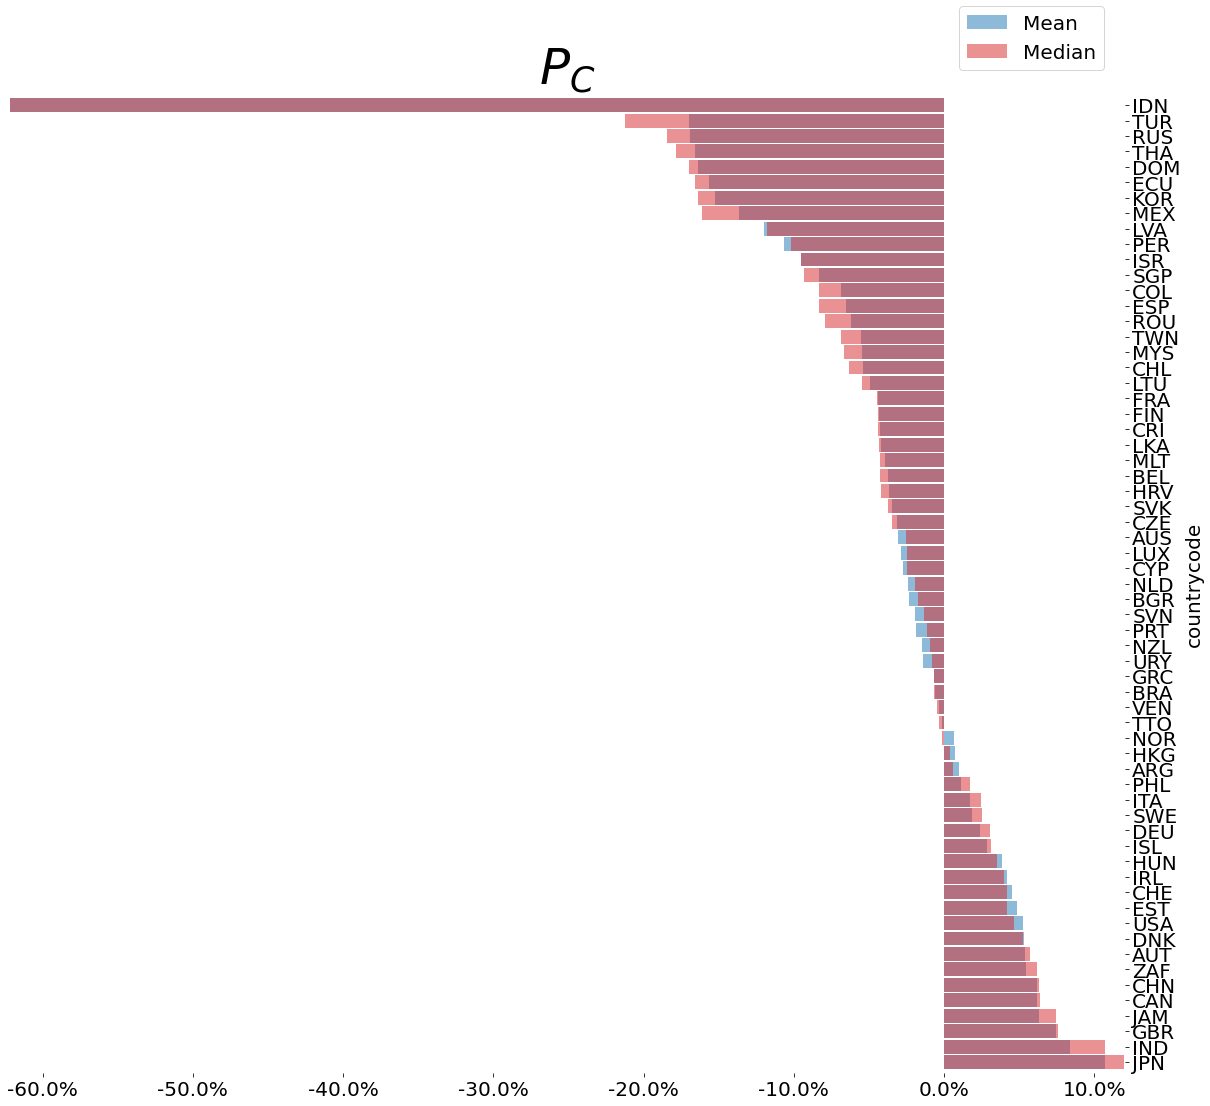

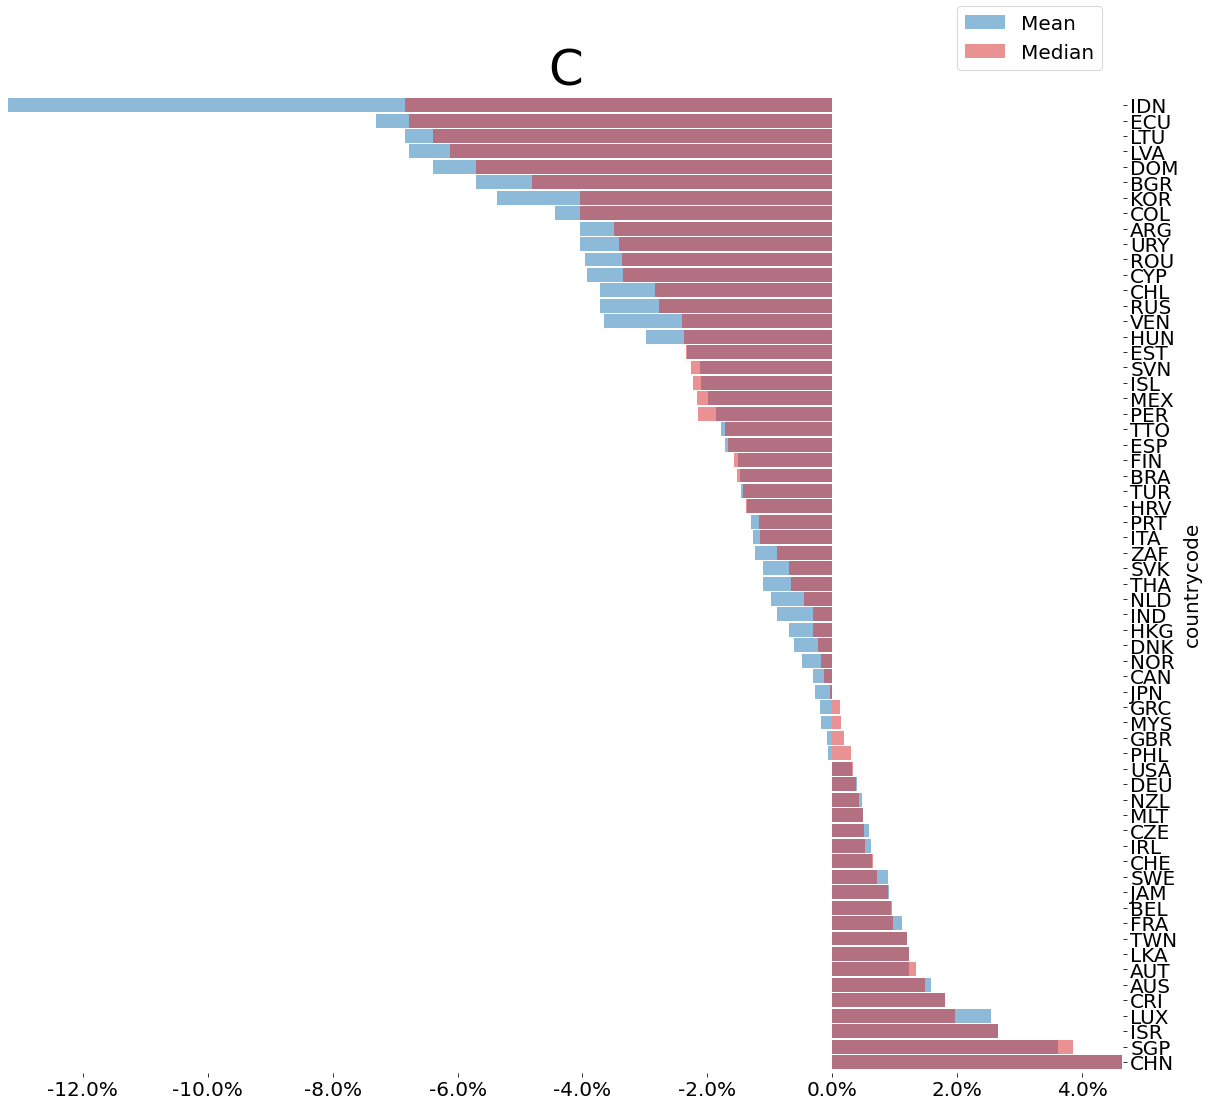

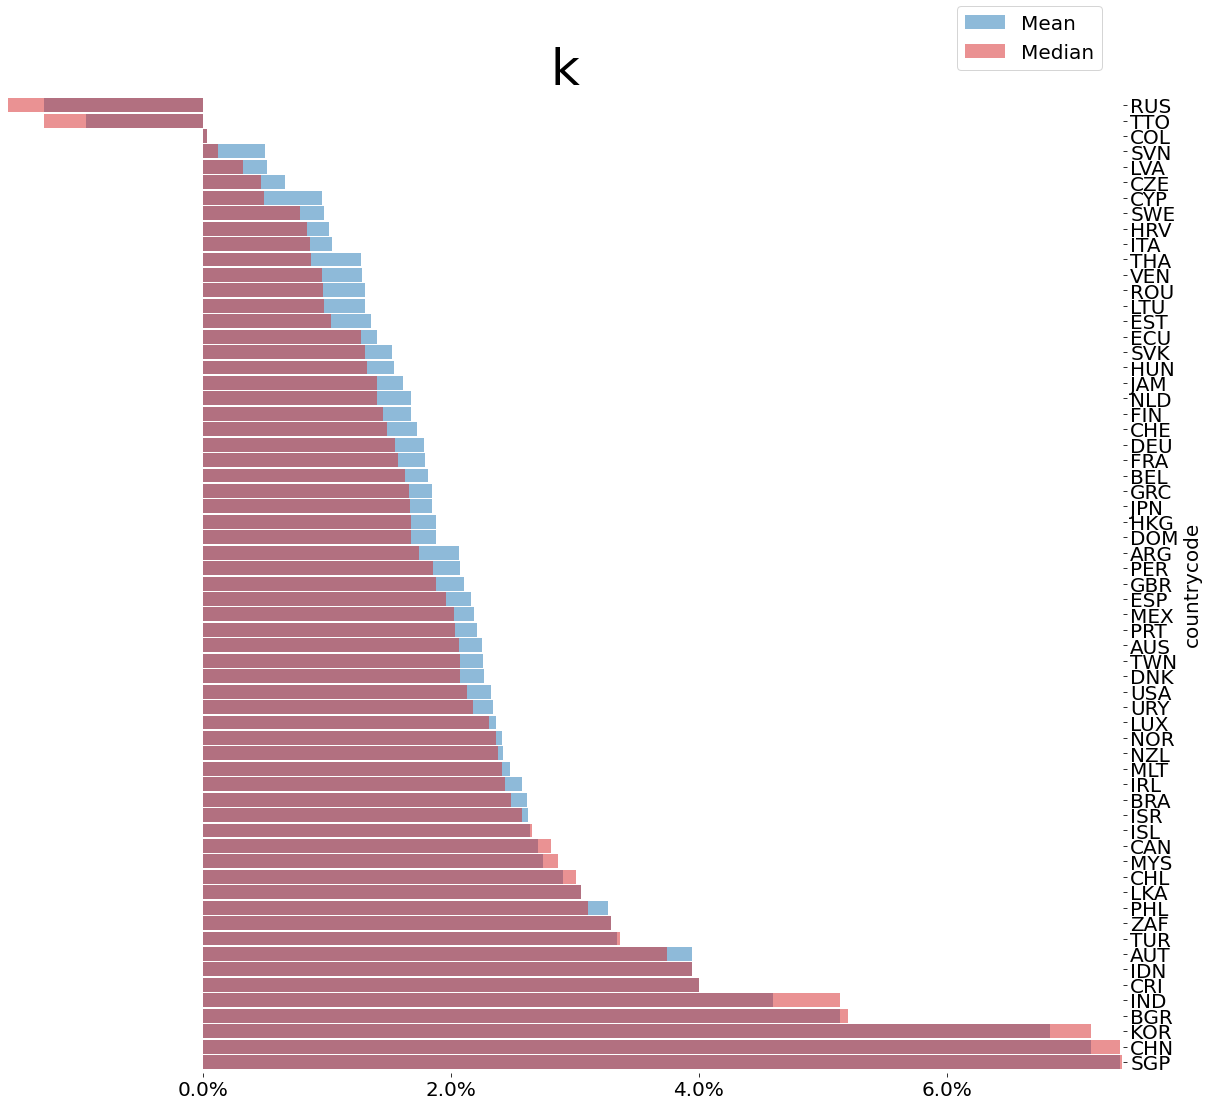

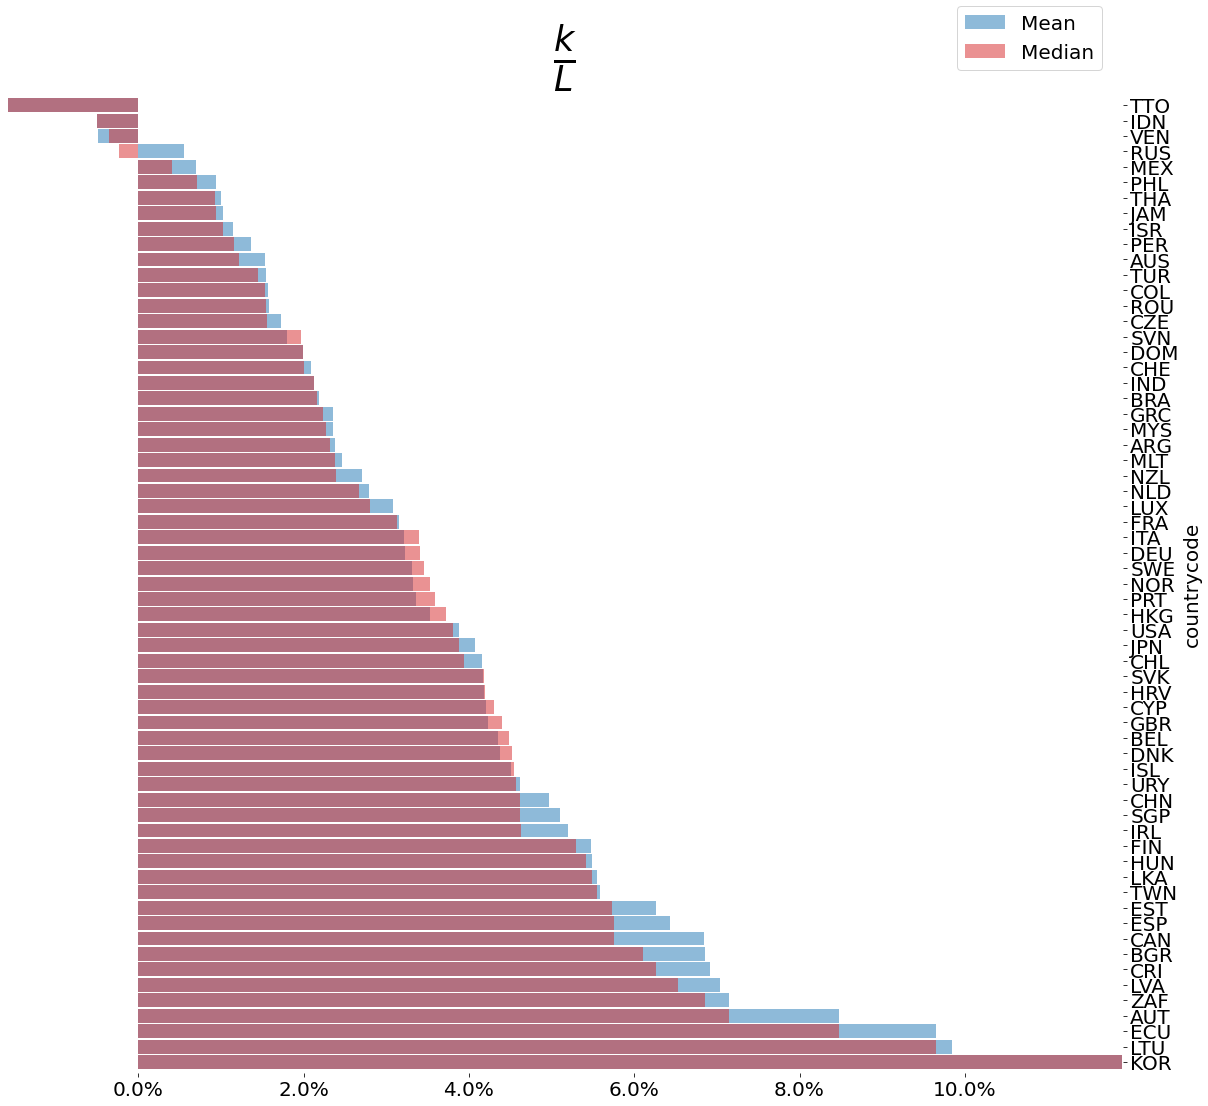

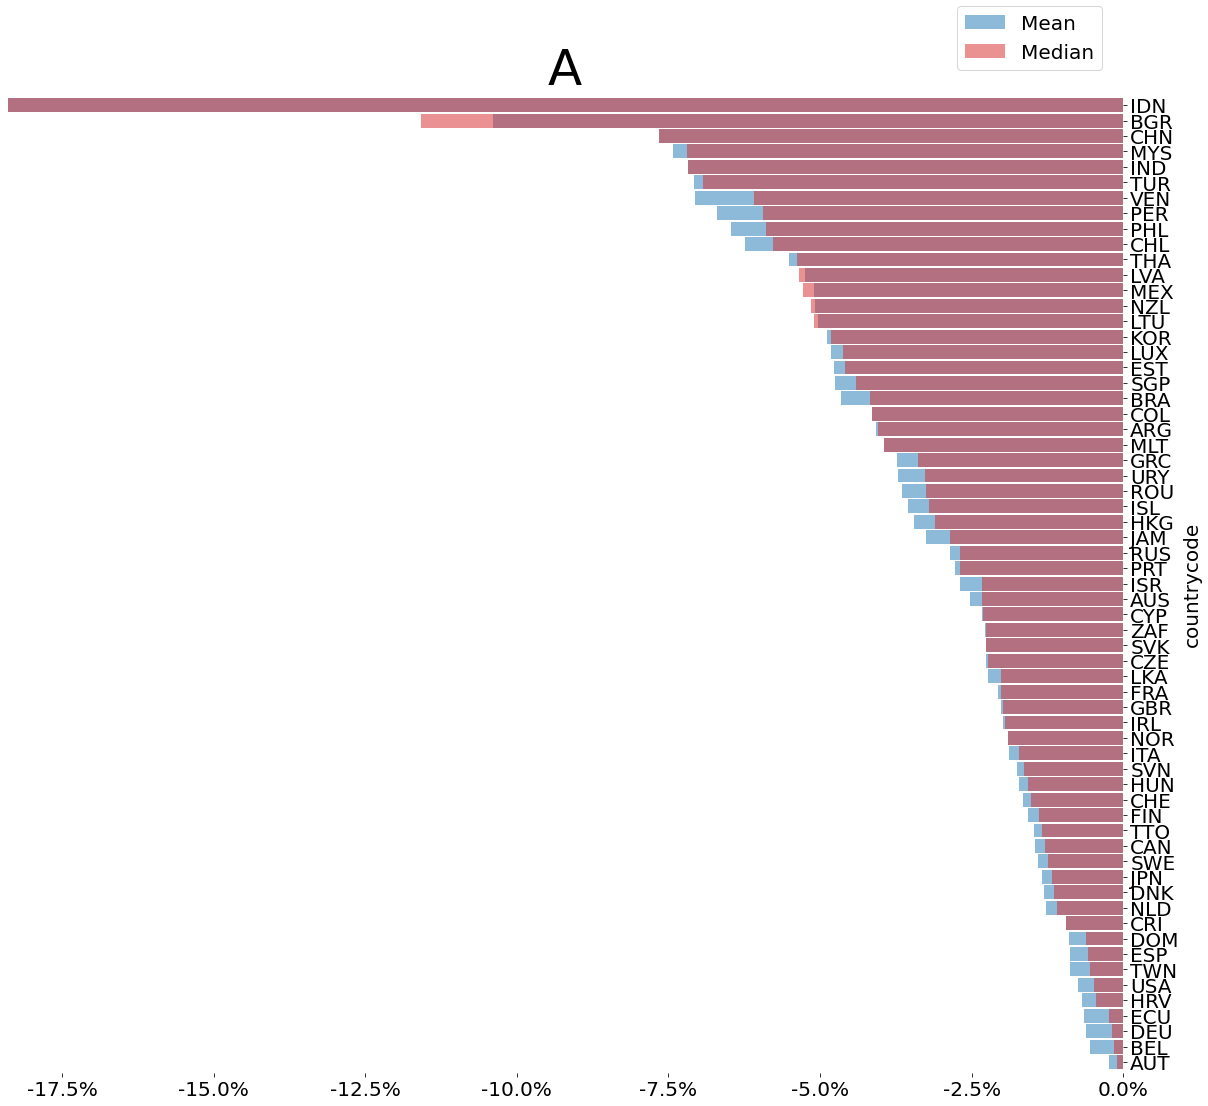

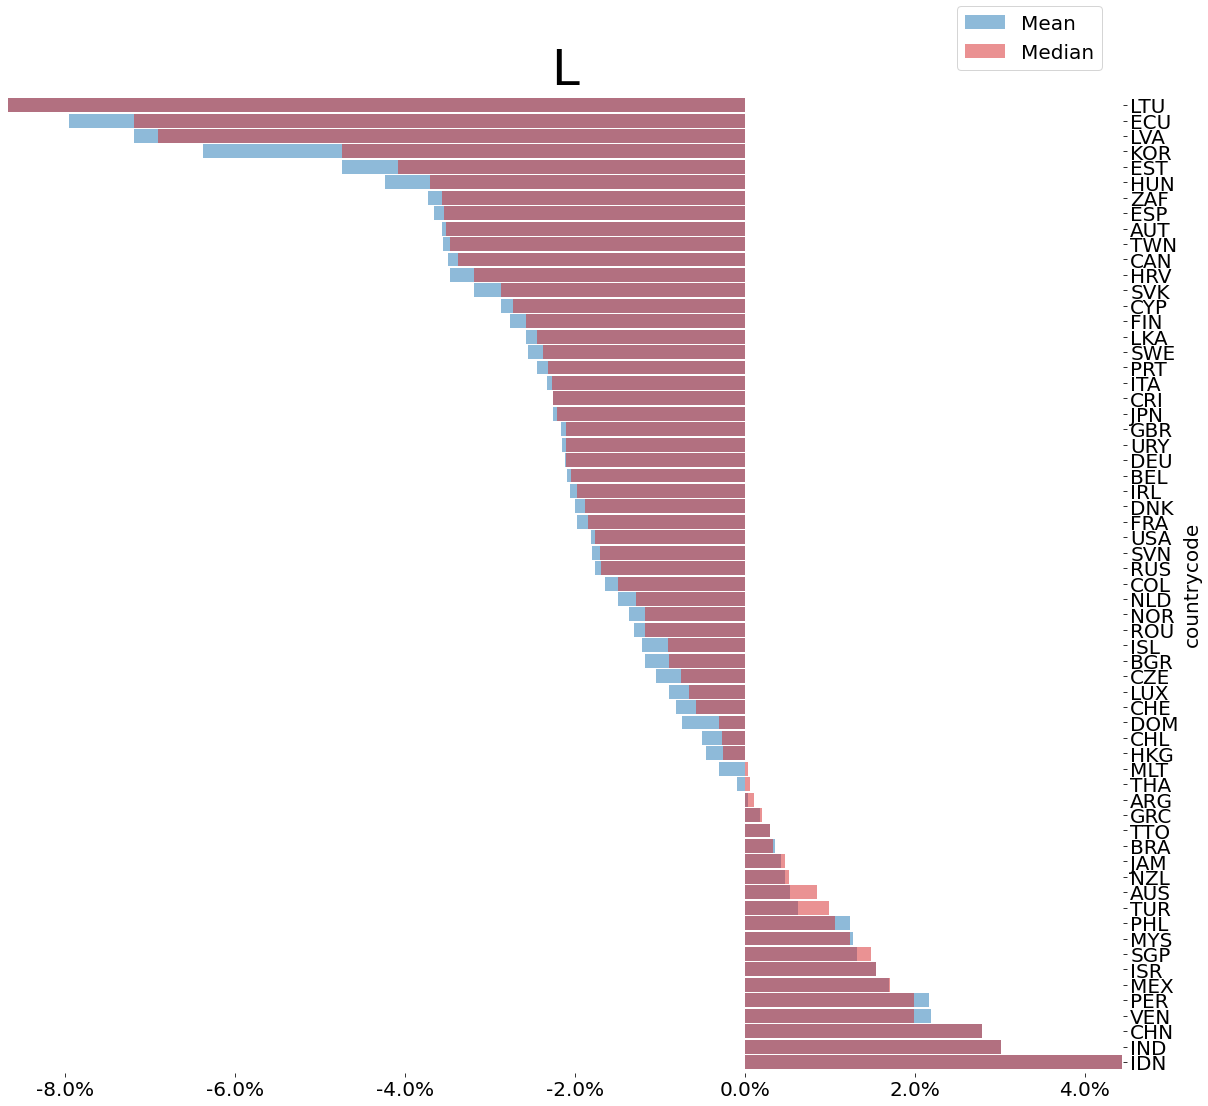

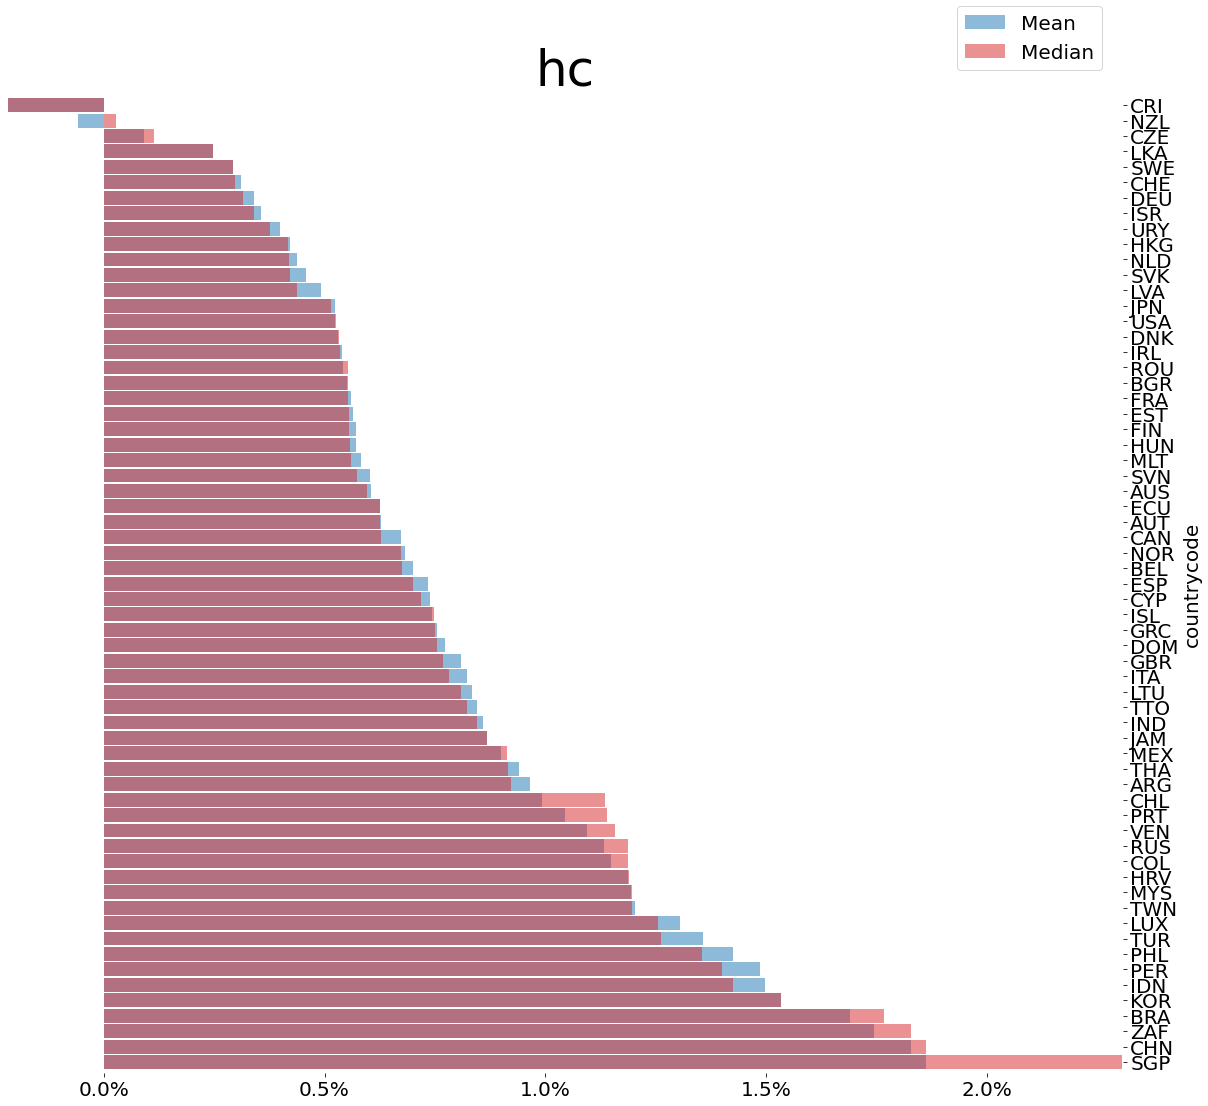

In [14]:
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
plt.rcParams.update({'font.size': 20})    
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
recession_df = data["Rates"][data["Rates"]["Contraction"]==1].dropna()
for mean_var in ["y", "$\\frac{y}{L}$","P","$P_C$","C", "k", "$\\frac{k}{L}$", "A", "L", "hc"]:
    fig, ax = plt.subplots(figsize = (20,18))
    recession_df.groupby("countrycode").mean().sort_values(mean_var, ascending = False)[[mean_var]].plot.barh(ax = ax, 
                                                                                                    width = .9, 
                                                                                                    alpha = .5,
                                                                                                    label = "Median",
                                                                                                    legend = False)
    recession_df.groupby("countrycode").median().sort_values(mean_var, ascending = False)[[mean_var]].plot.barh(ax = ax, 
                                                                                                    width = .9,
                                                                                                    color = "C3",
                                                                                                    alpha = .5,
                                                                                                    label = "Mean",
                                                                                                    legend = False)
    ax.legend(['Mean', 'Median'], bbox_to_anchor = (.99,1.1))
    ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks() ])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    remove_spines(ax)
    ax.set_title(mean_var, fontsize = 50)

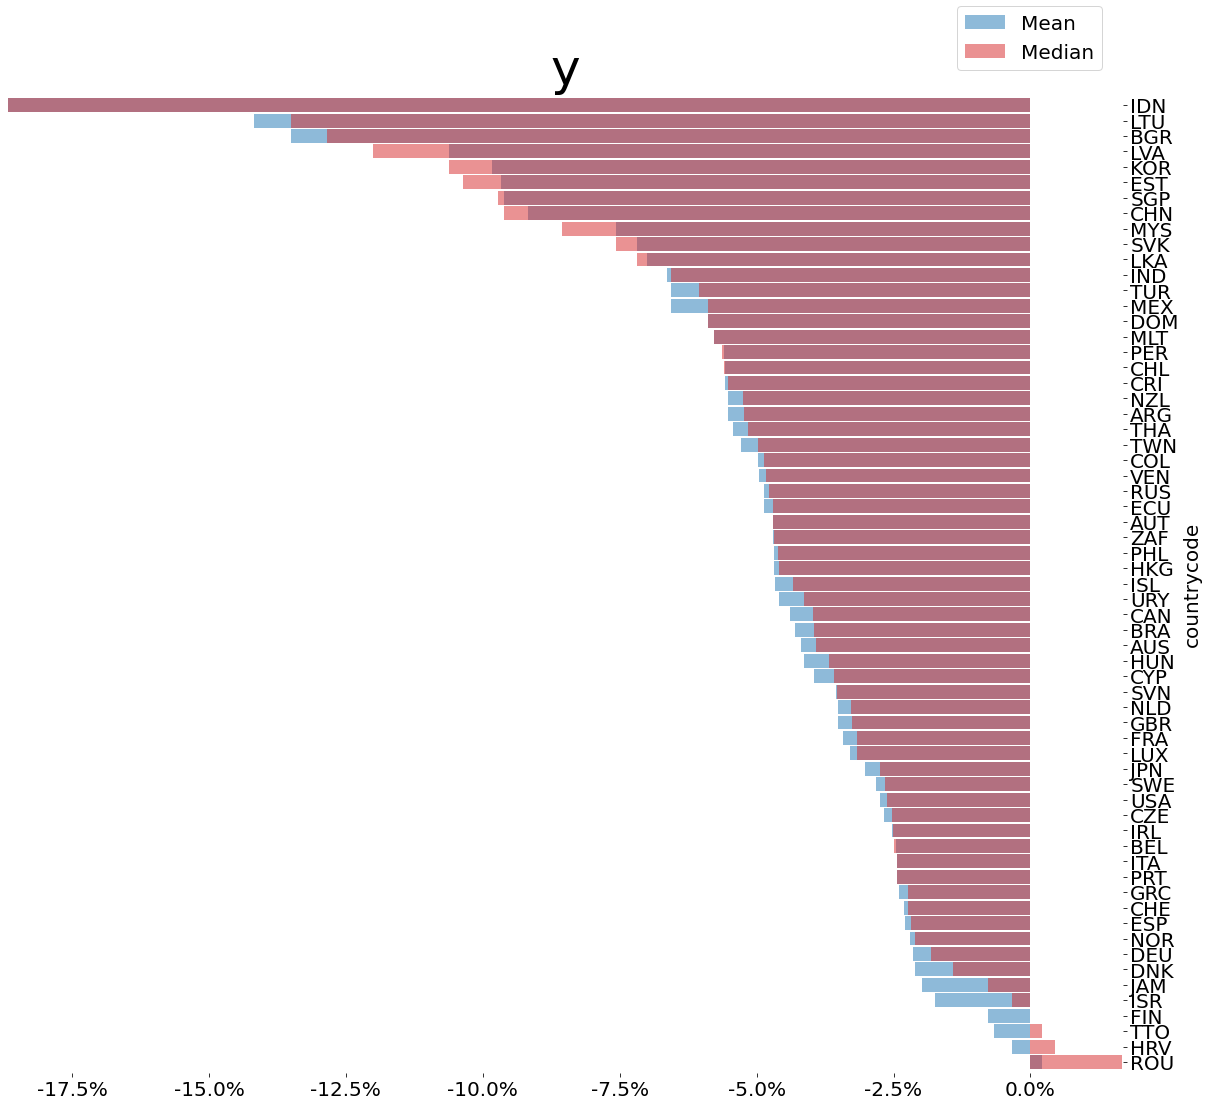

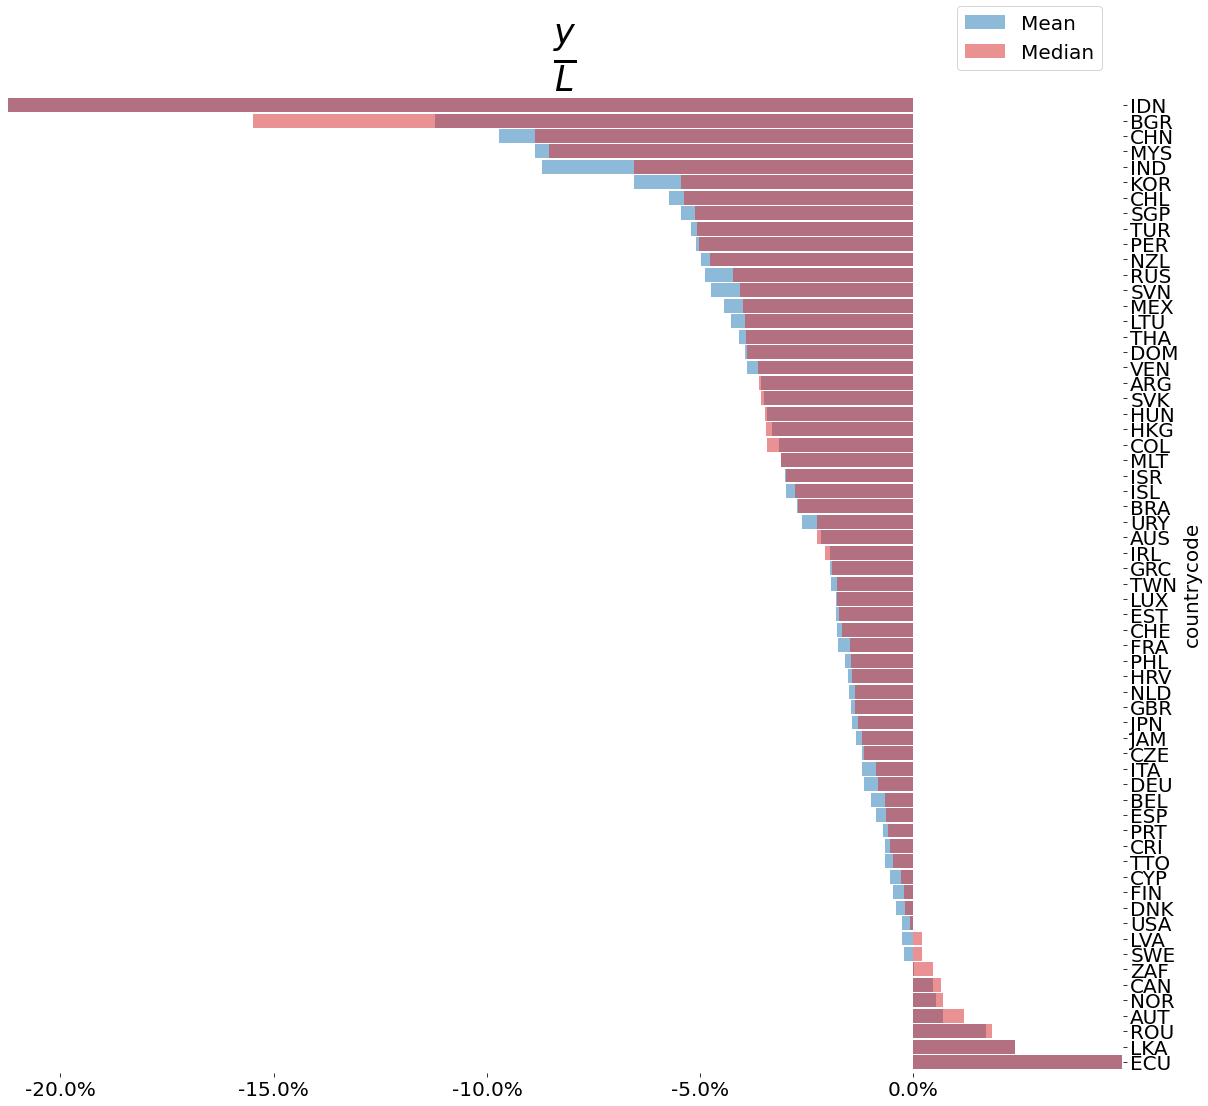

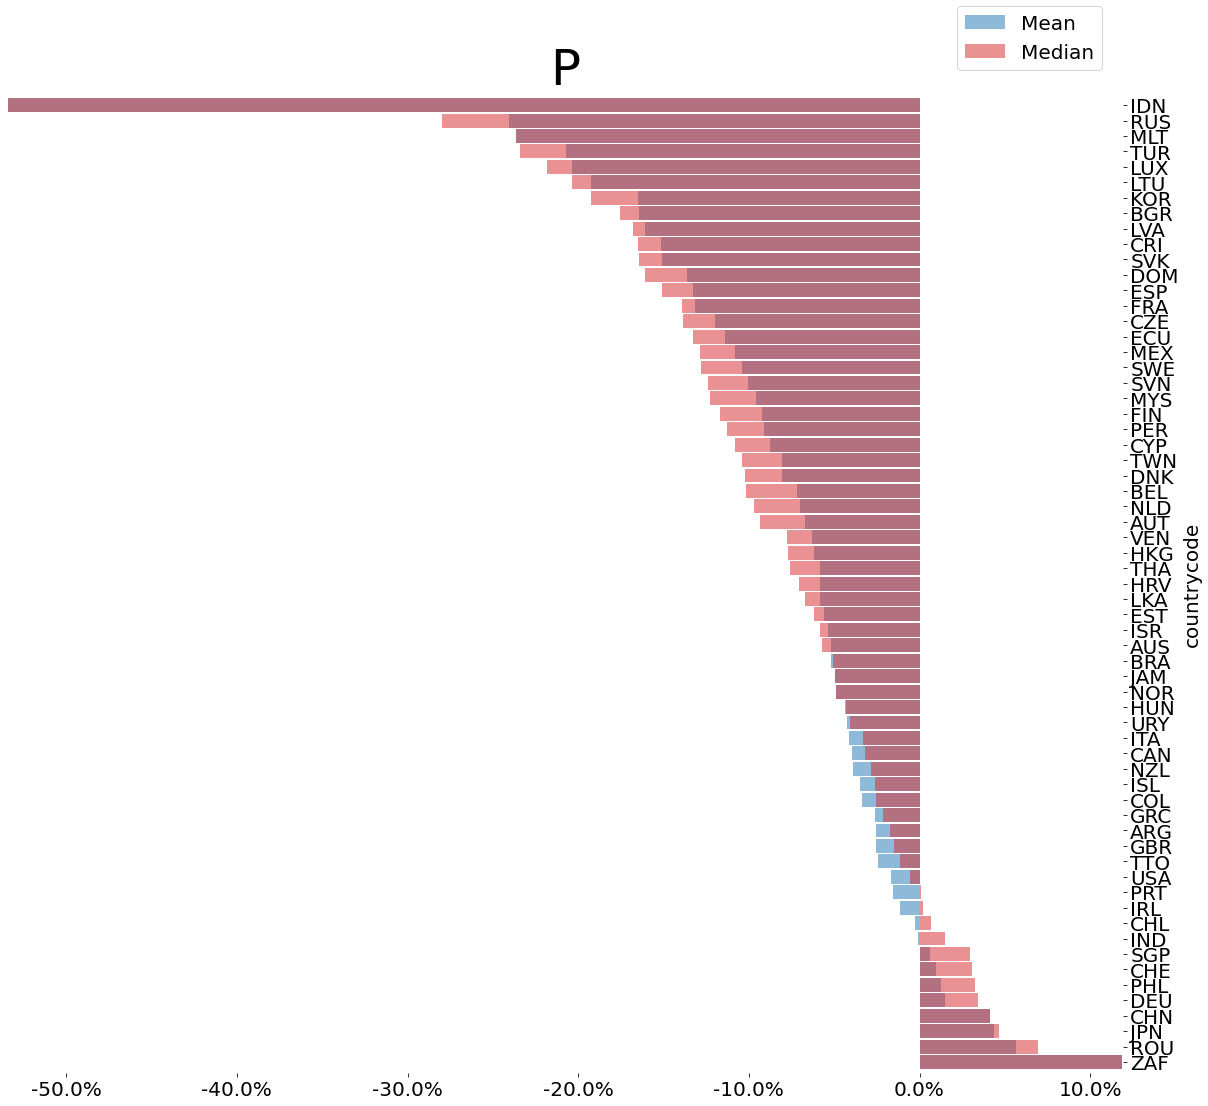

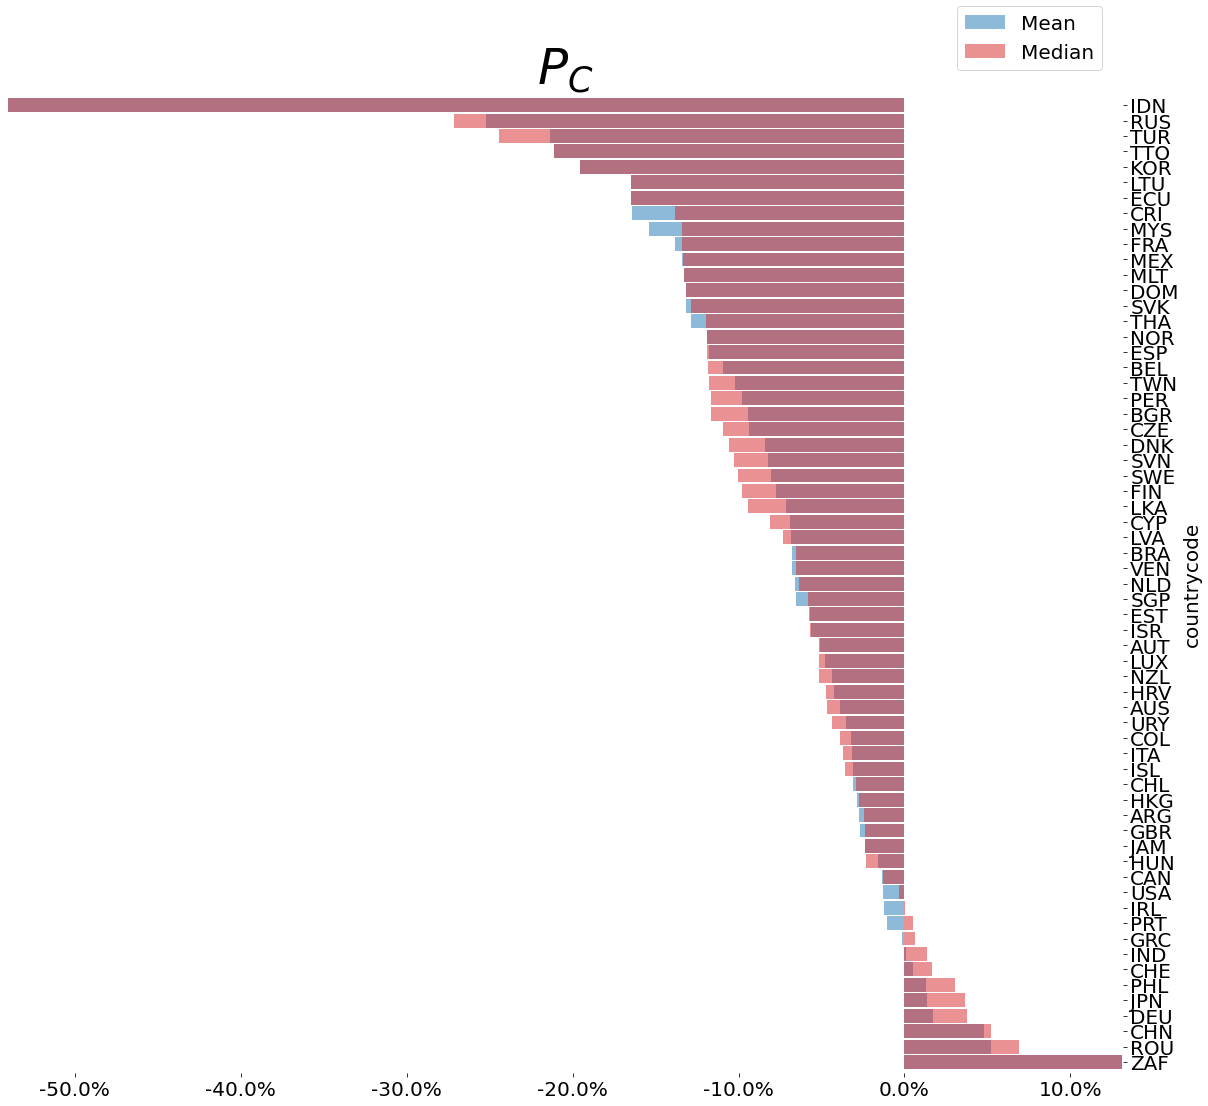

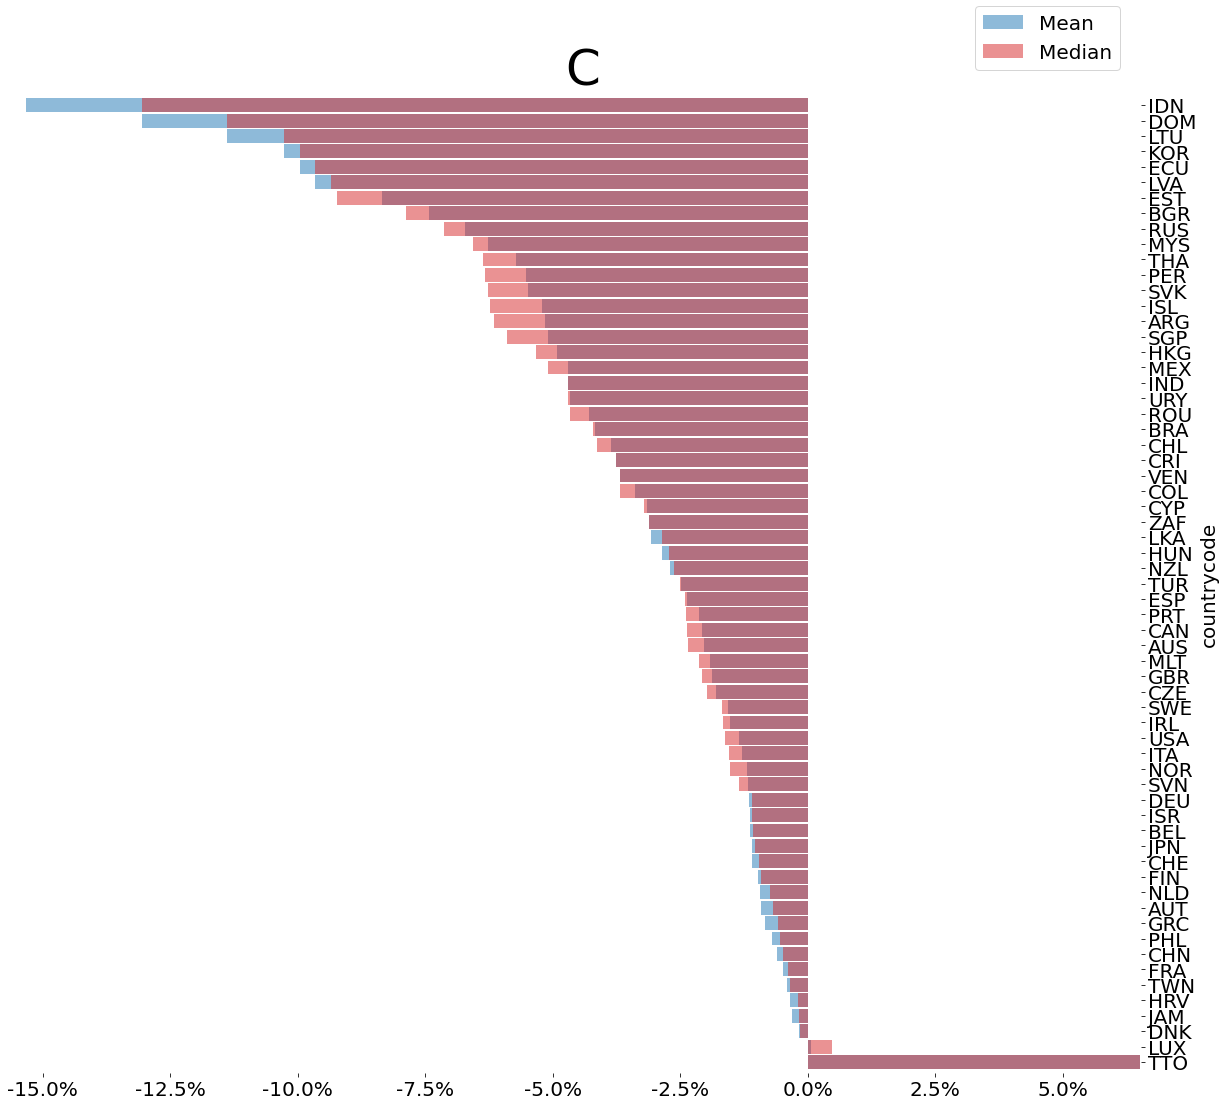

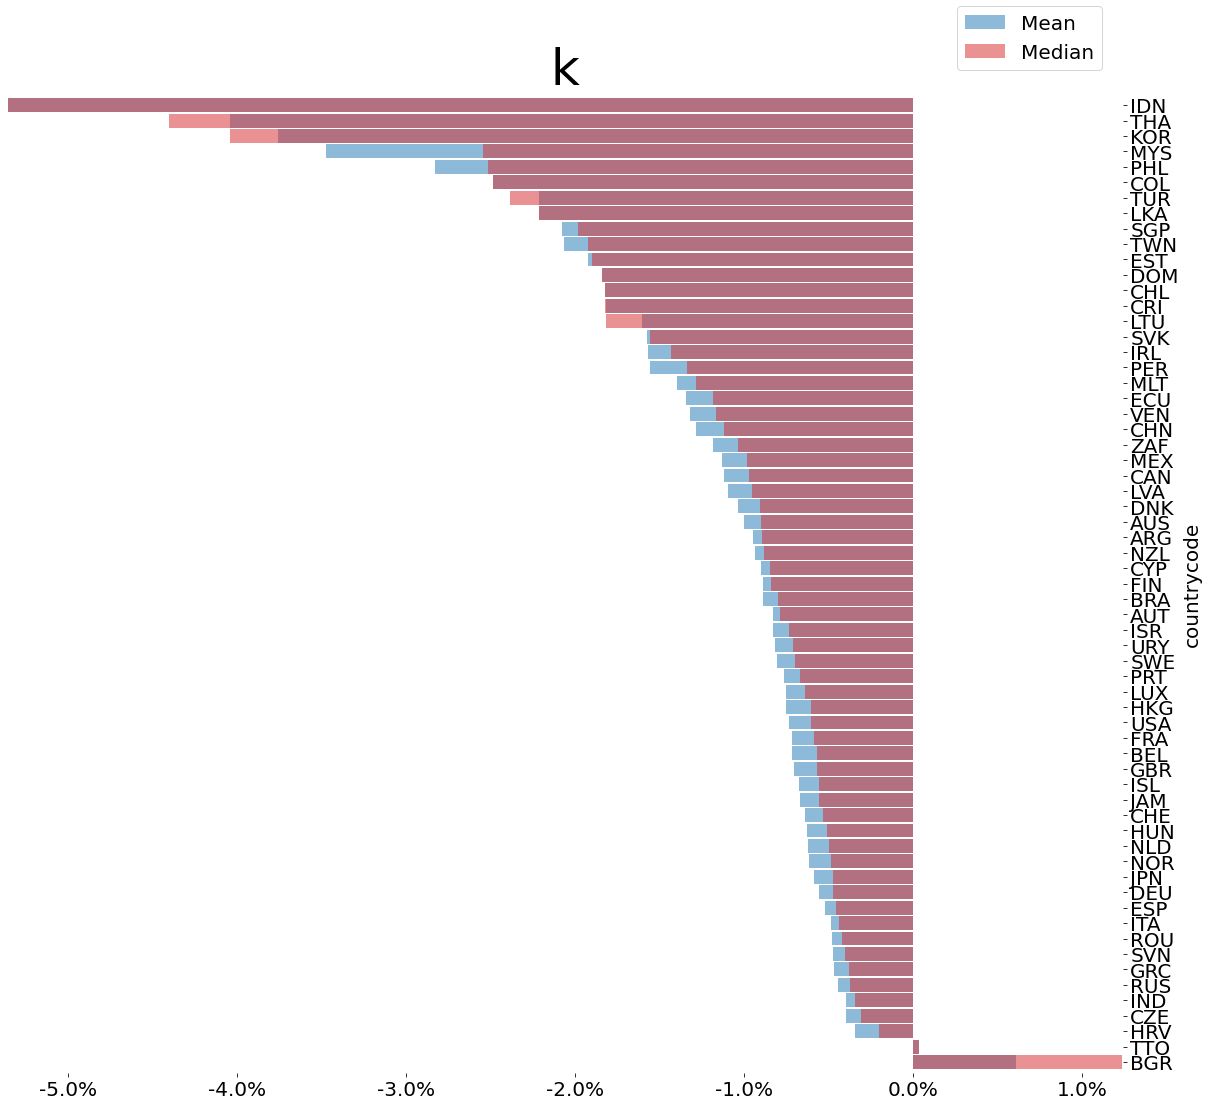

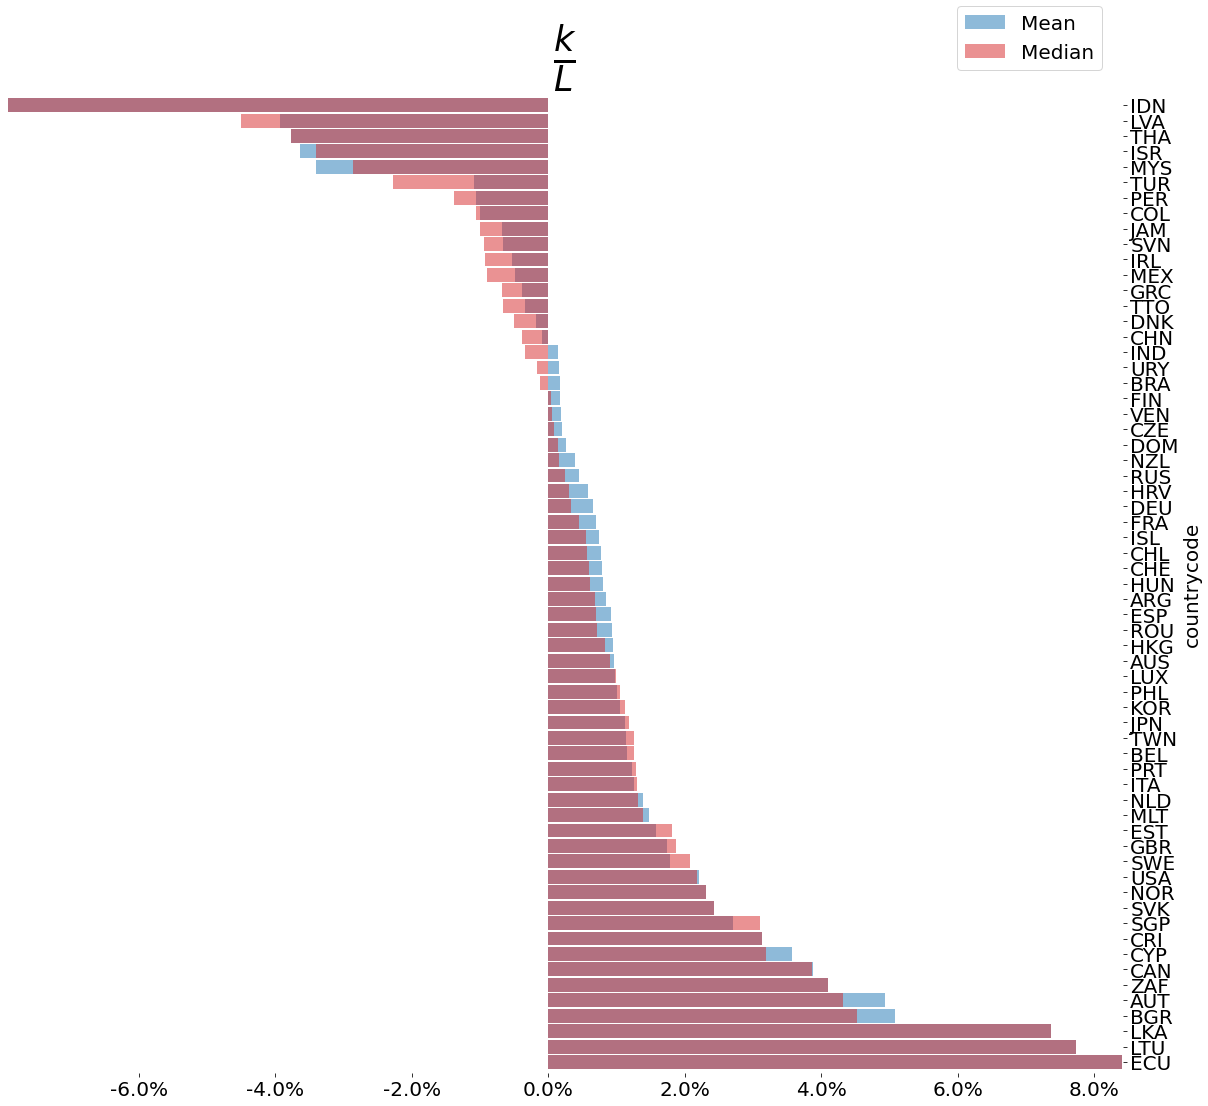

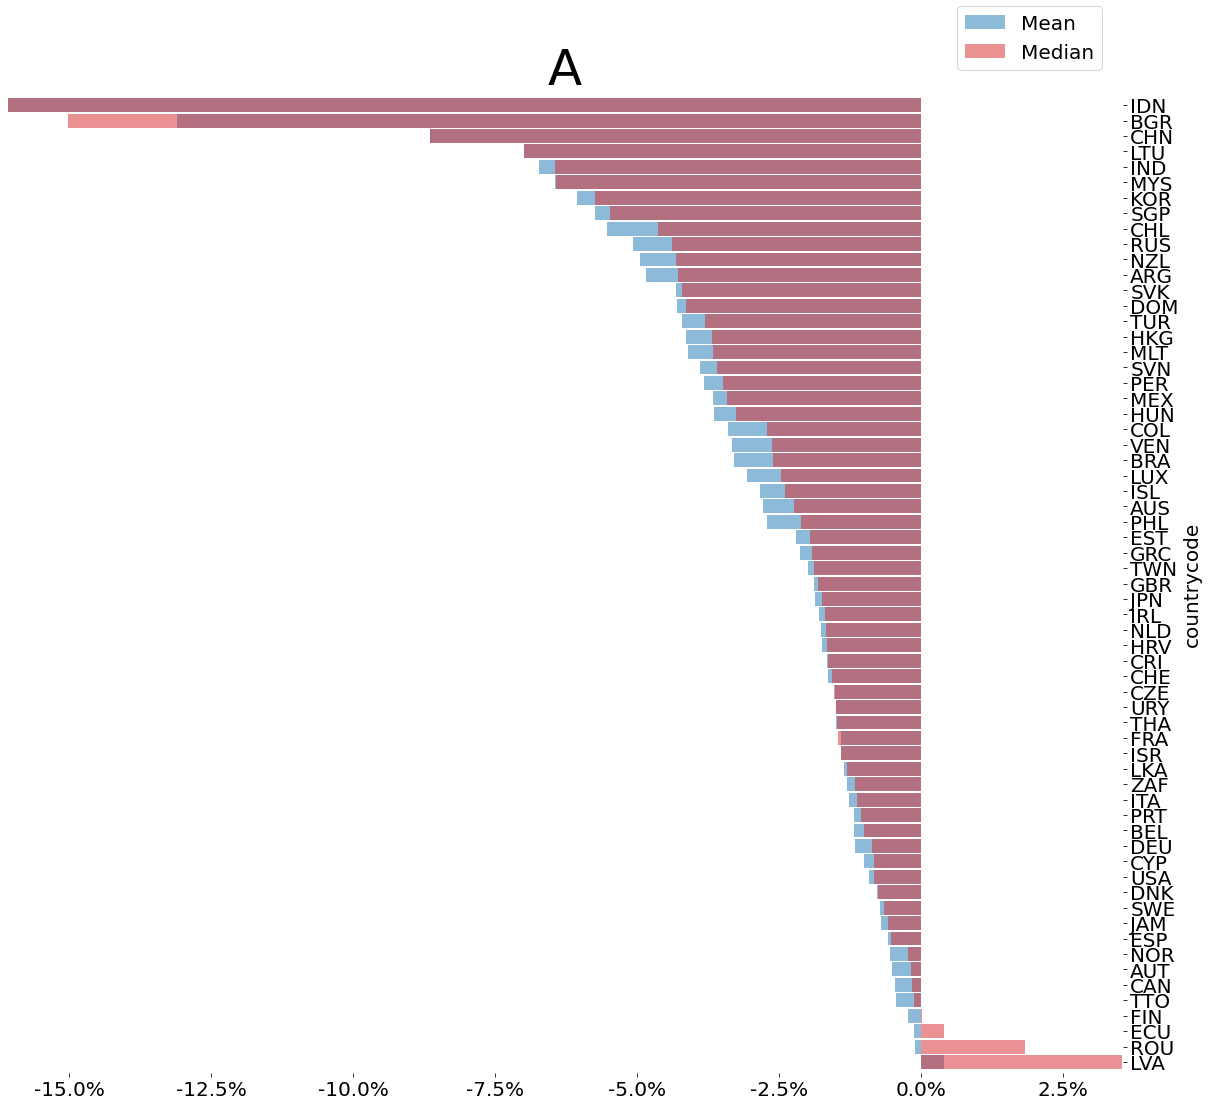

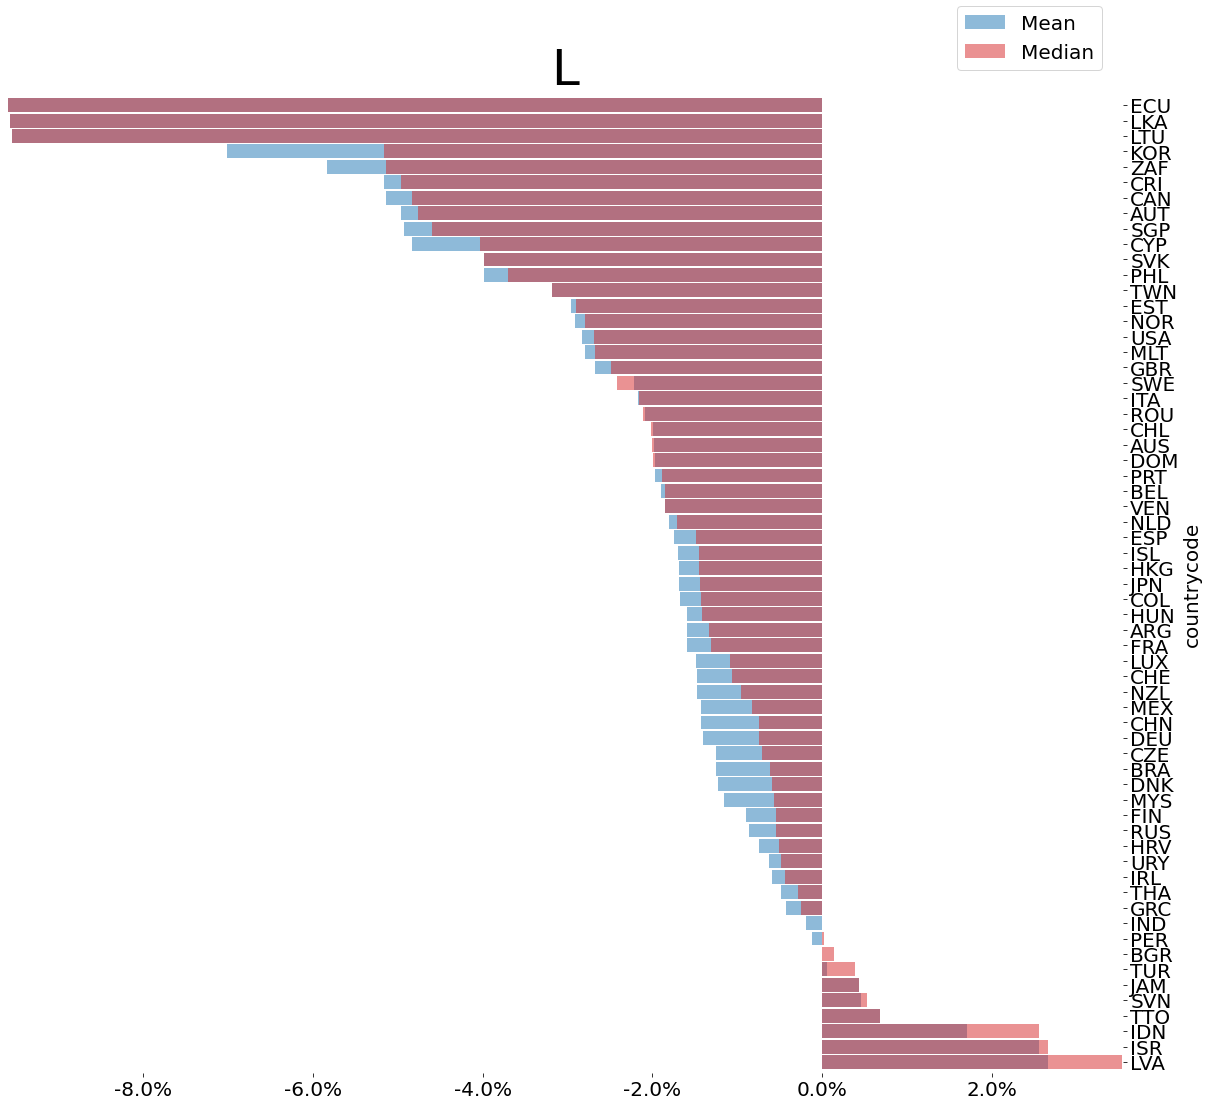

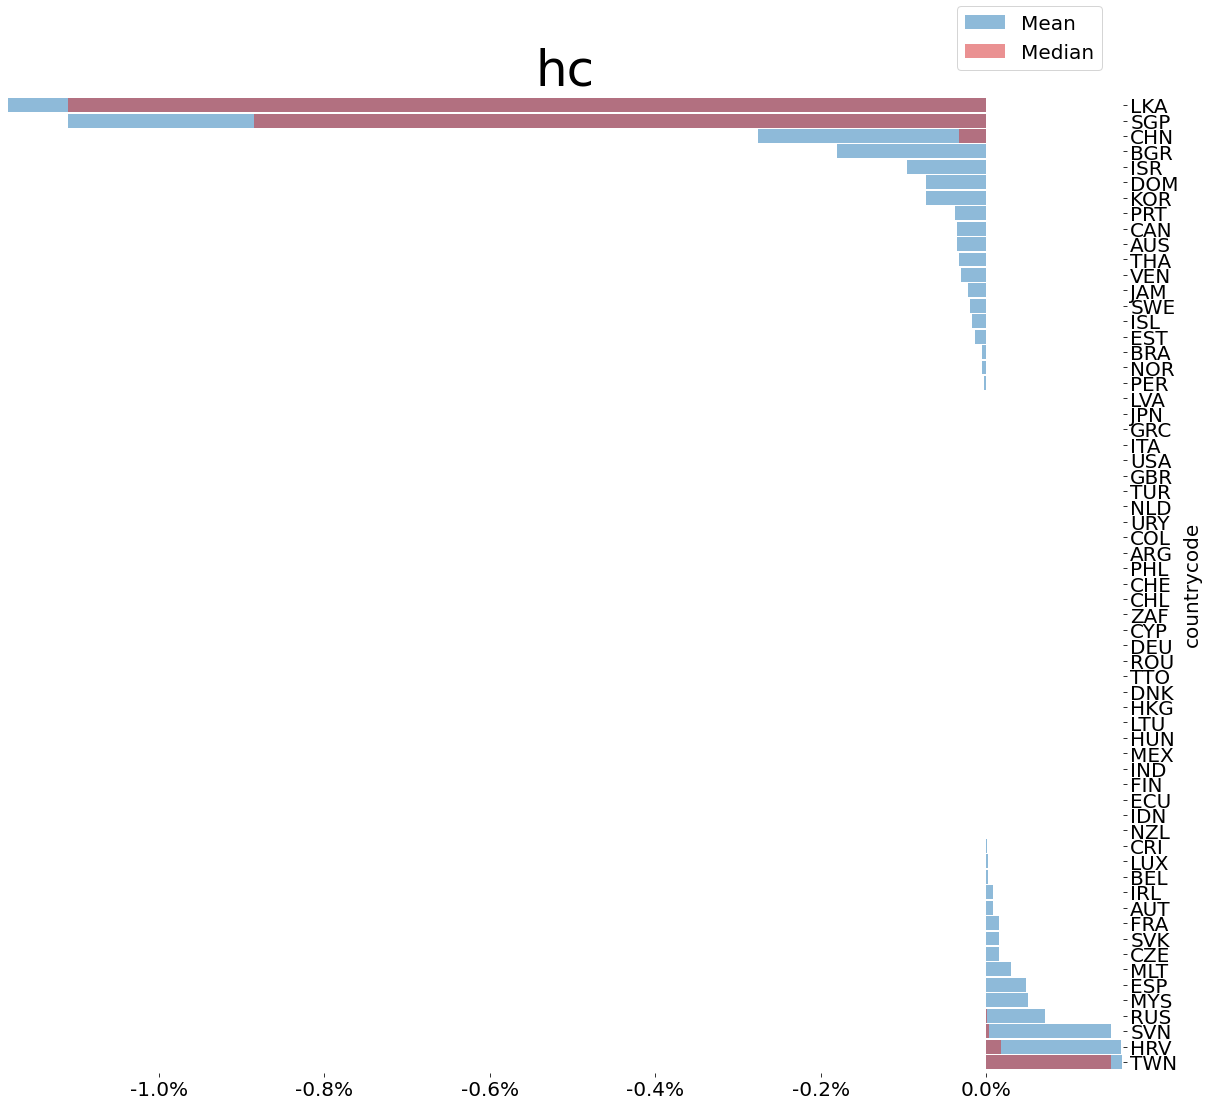

In [15]:
recession_df = data["Rates"].groupby("countrycode").diff()[data["Rates"]["Contraction"]==1].dropna()
for mean_var in ["y", "$\\frac{y}{L}$","P","$P_C$","C", "k", "$\\frac{k}{L}$", "A", "L", "hc"]:
    fig, ax = plt.subplots(figsize = (20,18))
    recession_df.groupby("countrycode").mean().sort_values(mean_var, ascending = False)[[mean_var]].plot.barh(ax = ax, 
                                                                                                    width = .9, 
                                                                                                    alpha = .5,
                                                                                                    label = "Median",
                                                                                                    legend = False)
    recession_df.groupby("countrycode").median().sort_values(mean_var, ascending = False)[[mean_var]].plot.barh(ax = ax, 
                                                                                                    width = .9,
                                                                                                    color = "C3",
                                                                                                    alpha = .5,
                                                                                                    label = "Mean",
                                                                                                    legend = False)
    ax.legend(['Mean', 'Median'], bbox_to_anchor = (.99,1.1))
    ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks() ])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    remove_spines(ax)
    ax.set_title(mean_var, fontsize = 50)

In [16]:
### Macroeconomic Variables in the United States

In [17]:
divisia = divisia.resample("AS").mean()

# Average Indicators During U.S. Recessions (with $M_4$)

In [18]:
US_data = data["Rates"].loc["USA"]
US_data["M4"] = np.log(divisia["M4"]).diff()
US_data["$r_{M4}$"] = divisia["$r_{M4}$"]

US_recession_df =US_data[US_data["Contraction"]==1].dropna()
plot_vars = list(US_data.keys()) 
for x in ["Contraction", "xr", "pop", "rdana", "pl_da"]:
    plot_vars.remove(x)
US_recession_df[plot_vars]

$P_C$         P       emp       avh        hc         y  \
year                                                                     
1974-01-01  0.096338  0.086147  0.018452 -0.015001  0.010816 -0.005420   
1975-01-01  0.086323  0.088458 -0.012762 -0.017241  0.010816 -0.002057   
1980-01-01  0.095322  0.086932  0.002529 -0.008898  0.007254 -0.002571   
1982-01-01  0.056428  0.061048 -0.007779 -0.010863  0.002712 -0.018193   
1991-01-01  0.037304  0.033807 -0.012092 -0.004594  0.004996 -0.001083   
2008-01-01  0.025670  0.019529 -0.001143 -0.011328  0.004046 -0.001367   
2009-01-01  0.002373  0.007686 -0.034846 -0.021269  0.004046 -0.025695   

                   C         k         A         L  $\frac{y}{pop}$  \
year                                                                  
1974-01-01 -0.001768  0.029347 -0.027431  0.003451        -0.014378   
1975-01-01  0.022957  0.021746  0.001141 -0.030003        -0.011073   
1980-01-01  0.000030  0.028314 -0.017753 -0.006369        -0.011927   
1982-01-01  0.014881  0.020959 -0.019190 -0.018642        -0.027585   
1991-01-01  0.004231  0.019771 -0.003275 -0.016686        -0.010632   
2008-01-01  0.002378  0.017941 -0.006440 -0.012472        -0.010894   
2009-01-01 -0.002370  0.008780  0.000492 -0.056114        -0.034949   

            $\frac{y}{L}$  $\frac{k}{L}$        M4  $r_{M4}$  
year                                                          
1974-01-01      -0.008871       0.025897  0.059072  0.058927  
1975-01-01       0.027946       0.051749  0.077505  0.045520  
1980-01-01       0.003798       0.034683  0.020969  0.088510  
1982-01-01       0.000449       0.039601  0.052008  0.094080  
1991-01-01       0.015603       0.036458  0.042820  0.049653  
2008-01-01       0.011105       0.030413  0.078297  0.016337  
2009-01-01       0.030419       0.064894  0.019453  0.003479

Text(0.5, 1.0, 'Average Rate of Changed During Recession')

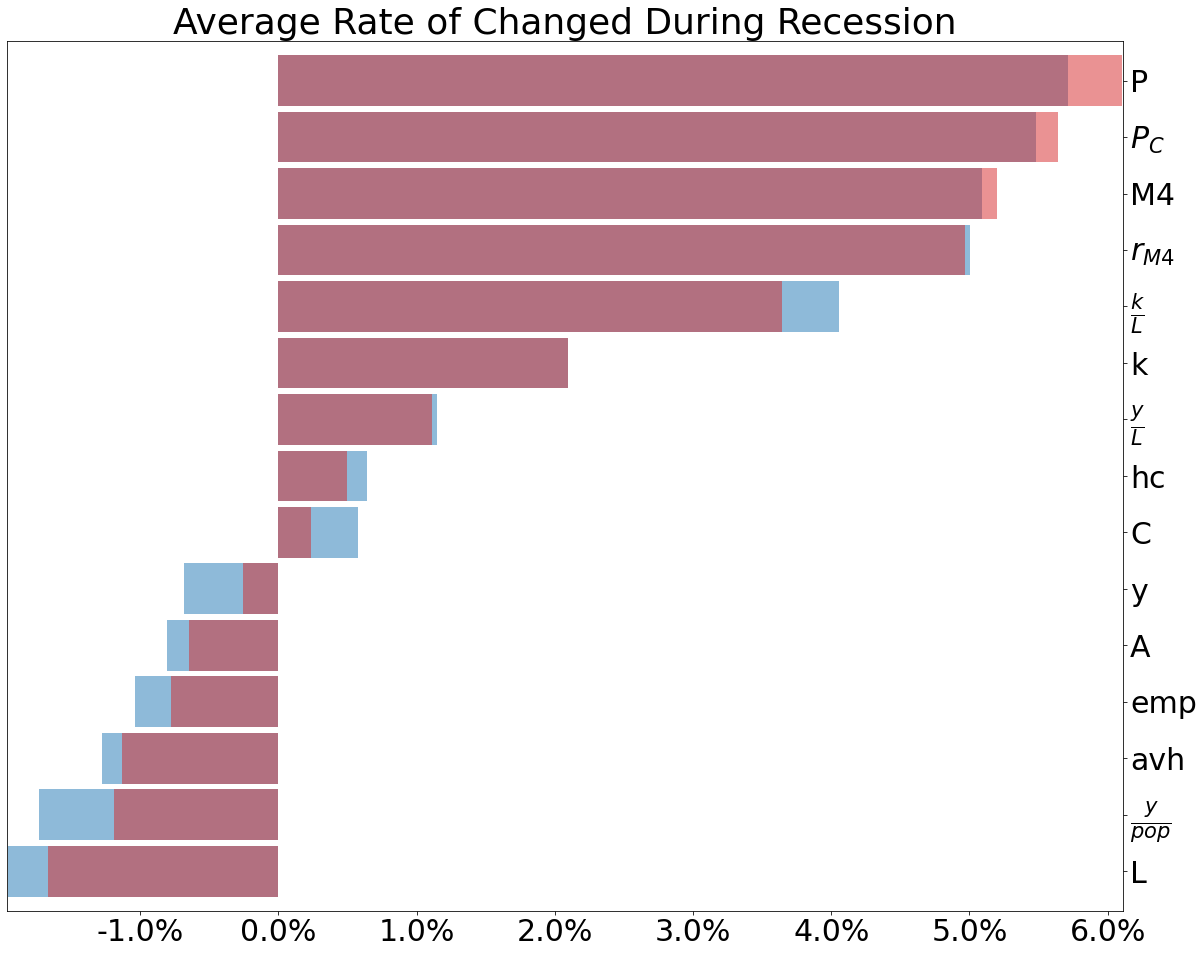

In [19]:
plt.rcParams.update({'font.size': 30})    
fig, ax = plt.subplots(figsize = (20,16))
US_recession_df.mean()[plot_vars].sort_values().plot.barh(ax = ax, width = .9, legend = False, alpha = .5,)
US_recession_df.median()[plot_vars].sort_values().plot.barh(ax = ax, color = "C3", alpha = .5, width = .9, legend = False)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks() ])
ax.set_title("Average Rate of Changed During Recession")

In [20]:
US_recession_df =US_data.diff()[US_data["Contraction"]==1].dropna()
US_recession_df

xr     $P_C$     pl_da         P       emp       avh       pop  \
year                                                                          
1974-01-01  0.0  0.036981  0.034364  0.033080 -0.013103 -0.014169  0.000046   
1975-01-01  0.0 -0.010015 -0.002246  0.002312 -0.031214 -0.002240  0.000058   
1980-01-01  0.0  0.011920  0.010682  0.007156 -0.023247 -0.009998  0.000005   
1982-01-01  0.0 -0.029465 -0.029490 -0.029881 -0.018829 -0.004400  0.000025   
1991-01-01  0.0  0.007764 -0.003114 -0.003831 -0.022040  0.003573  0.000006   
2008-01-01  0.0  0.001411 -0.005262 -0.006993 -0.010074 -0.010507  0.000003   
2009-01-01  0.0 -0.023297 -0.017235 -0.011842 -0.033702 -0.009940 -0.000273   

                      hc         y         C     rdana         k         A  \
year                                                                         
1974-01-01 -3.038009e-08 -0.060341 -0.037730 -0.060227 -0.006250 -0.041088   
1975-01-01 -1.831092e-08  0.003363  0.024725  0.002176 -0.007601  0.028572   
1980-01-01 -1.130630e-08 -0.033741 -0.020117 -0.043768 -0.006760 -0.010234   
1982-01-01  3.710033e-08 -0.043254  0.001329 -0.039146 -0.005836 -0.025457   
1991-01-01  2.433438e-03 -0.019767 -0.016012 -0.021383 -0.005138 -0.007681   
2008-01-01  1.254537e-07 -0.019955 -0.018465 -0.024174 -0.005066 -0.004604   
2009-01-01 -7.122188e-08 -0.024328 -0.004748 -0.024391 -0.009161  0.006932   

            Contraction         L  $\frac{y}{pop}$  $\frac{y}{L}$  \
year                                                                
1974-01-01          1.0 -0.027271        -0.060387      -0.033070   
1975-01-01          0.0 -0.033454         0.003305       0.036817   
1980-01-01          1.0 -0.033245        -0.033746      -0.000496   
1982-01-01          1.0 -0.023230        -0.043278      -0.020024   
1991-01-01          1.0 -0.018467        -0.019773      -0.001300   
2008-01-01          1.0 -0.020581        -0.019957       0.000627   
2009-01-01          0.0 -0.043642        -0.024056       0.019314   

            $\frac{k}{L}$        M4  $r_{M4}$  
year                                           
1974-01-01       0.021022 -0.026625  0.008490  
1975-01-01       0.025852  0.018433 -0.013407  
1980-01-01       0.026486 -0.010761  0.012893  
1982-01-01       0.017394  0.023054 -0.018883  
1991-01-01       0.013329 -0.002158 -0.016165  
2008-01-01       0.015515  0.014827 -0.017333  
2009-01-01       0.034482 -0.058844 -0.012857

Text(0.5, 1.0, 'Average Change in\nRate of Change During Recession')

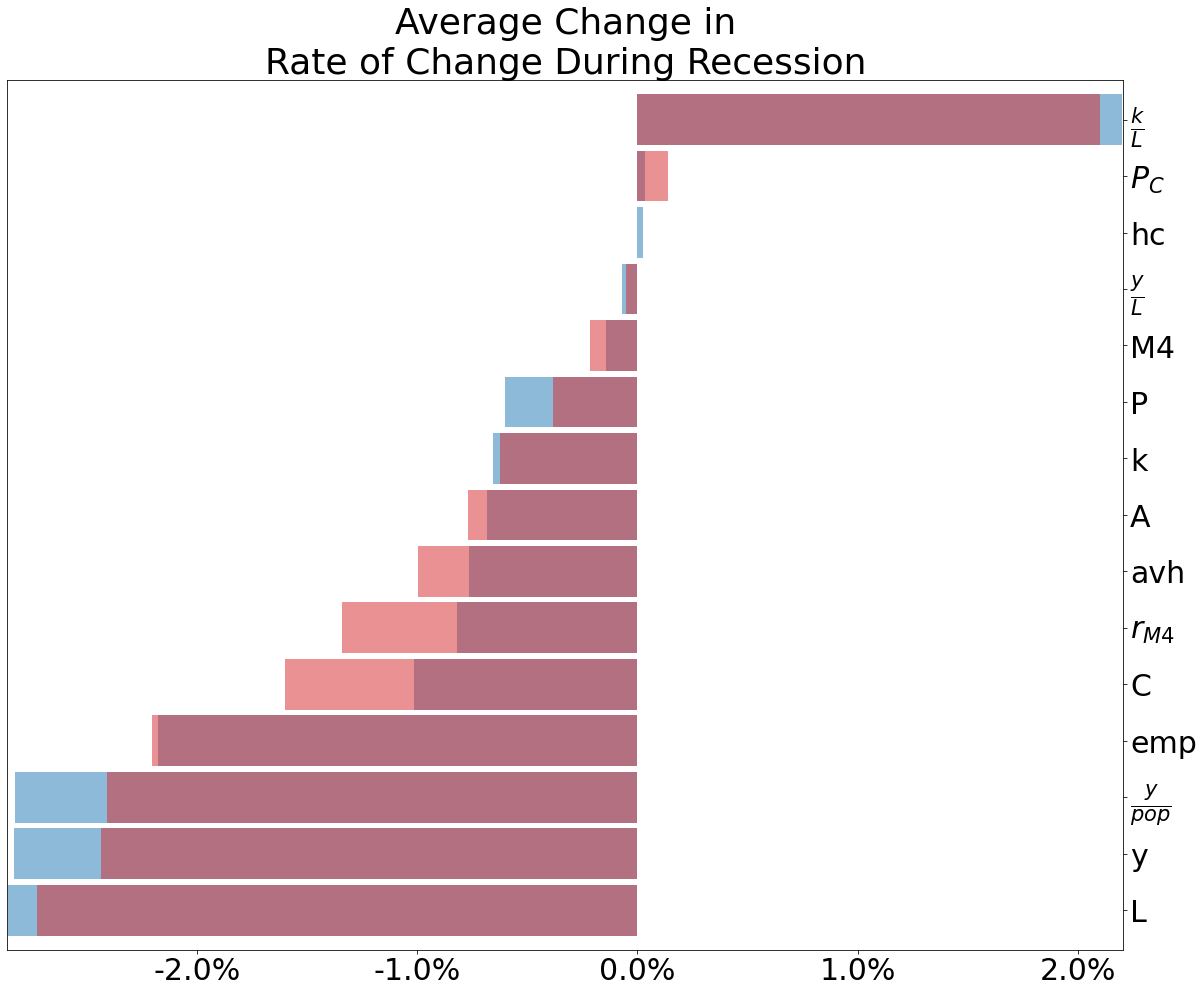

In [21]:
fig, ax = plt.subplots(figsize = (20,16))
US_recession_df.mean()[plot_vars].sort_values().plot.barh(ax = ax, width = .9, legend = False, alpha = .5,)
US_recession_df.median()[plot_vars].sort_values().plot.barh(ax = ax, color = "C3", alpha = .5, width = .9, legend = False)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks() ])
ax.set_title("Average Change in\nRate of Change During Recession")

## Real GDP subject to Random Walk with Drift?

By estimating the cyclical component of GDP, we can recognize that period to period changes in the cyclical component appear to follow a random walk. This random walk is primarily of a function of the random walk in total factor productivity. $G$ is also asserted to follow a random walk, but theoretically this is not a fundamental assertion.

## Baseline RBC Model

$$Y_t = K_t^{\alpha}(A_tL_t)^{1-\alpha}, 0<\alpha<1$$

#### Evolution of Capital Stock
$$K_{t+1} = K_t(1-\delta) + I_t$$

$$K_{t+1} = K_t(1-\delta) + Y_t - C_t - G_t$$

#### Real Wage

$$w_t = (1-\alpha)(\frac{K_t}{A_tL_t})^{\alpha}A_t$$

#### Real Interest Rate

$$r_t = \alpha(\frac{A_tL_t}{K_t})^{1-\alpha}- \delta$$

#### Total Factor Productivity

Long-run real income growth is a function total factor productivity. Thus, the trend of $A$ reflects the growth rate of real income, $g$.

$$ln(A_t) = \bar{A_t} + gt + \tilde{A_t}$$

The growth of $A$ is subject to random disturbances included in $\tilde{A_t}$, short-run deviations from trend:

$$\tilde{A_t} = \rho_A \tilde{A}_{t-1} + \epsilon_{A,t}$$
$$-1<\rho_A<1$$

Similarly, government spending is defined:

$$ln(G_t) = \bar{G_t} + gt + \tilde{G_t}$$
$$\tilde{G_t} = \rho_G \tilde{G}_{t-1} + \epsilon_{G,t}$$
$$-1<\rho_G<1$$




[Text(0, -0.08, '-8.0%'),
 Text(0, -0.06, '-6.0%'),
 Text(0, -0.04, '-4.0%'),
 Text(0, -0.020000000000000004, '-2.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 0.020000000000000004, '2.0%'),
 Text(0, 0.039999999999999994, '4.0%'),
 Text(0, 0.06000000000000001, '6.0%'),
 Text(0, 0.08, '8.0%')]

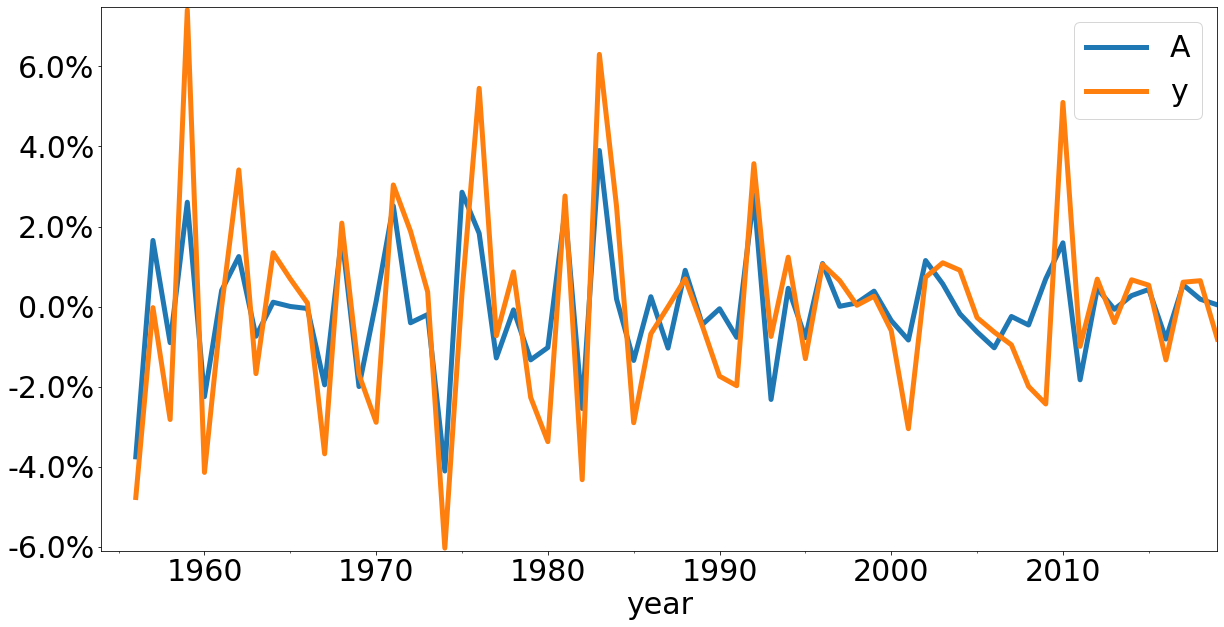

In [22]:
fig, ax = plt.subplots(figsize = (20,10))
US_data[["A", "y"]].diff().plot.line(ax = ax, linewidth = 5)
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks() ])


M4         A         y
M4  1.000000  0.128534  0.082850
A   0.128534  1.000000  0.825817
y   0.082850  0.825817  1.000000

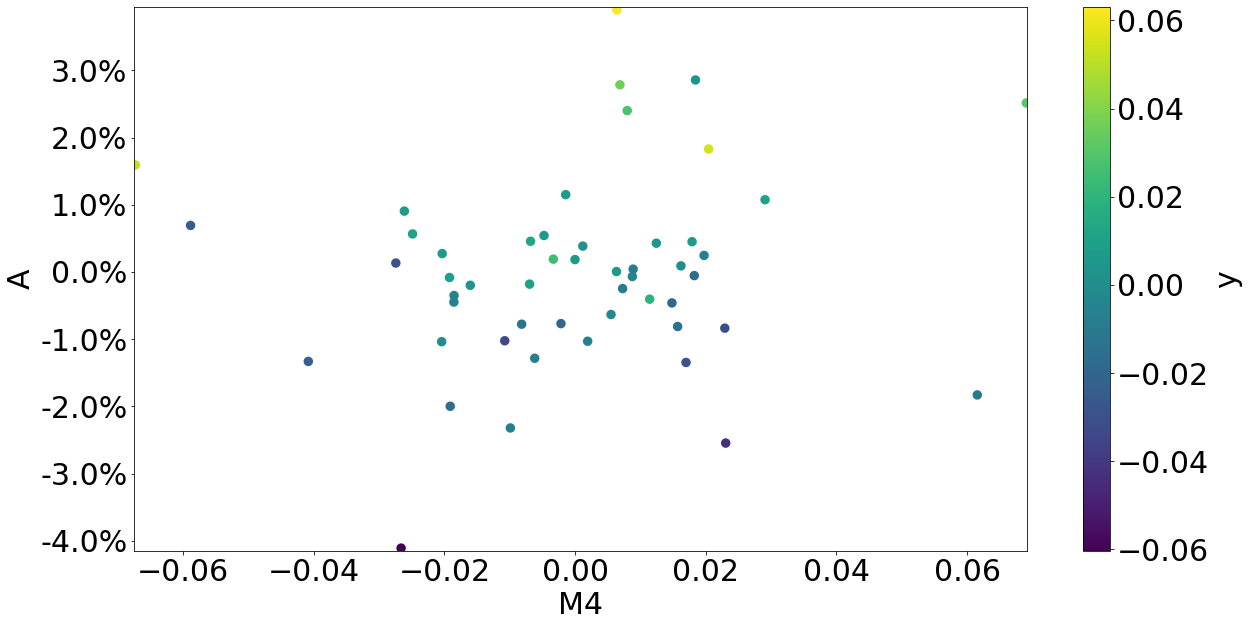

In [23]:
fig, ax = plt.subplots(figsize = (20,10))
US_data.diff().plot.scatter(x = "M4", y = "A", c = "y", cmap = "viridis", ax = ax, linewidth = 5)
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks() ])
US_data[["M4","A", "y"]].diff().corr()


## Fluctuations in stock of money driven by output? Money not important?

The real business cycle view of recssion asserts that changes in the money stock are endogenous (ironically a claim championed by Post-Keynesians and Austrians. Thus, if a recession appears to be driven by a contraction of aggregate demand, this contraction is simply a consequence of changing expectations in real income growth which are driven by changes in total factor productivity.

### Schumpeterian view

At first glance, this may seem similar to Schumpeter's view of business cycles. Schumpeter asserted that 1) new technological developments disrupt old equilibria. The new technology attracts new investment. That is, the upswing in the business cycle is fundamentally generated by new technological developments. Credit markets, Schumpeter surmised, tend to overshoot, so the new technology attracts excessive investment that eventually capitulates a downturn.

This view, however, is not the view of the real business cycle theorists. While new technological developments might drive improvements in productivity, any credit contract that follows is the result of expectation of lower growth. During the upswing, credit creation may drive an increase in investment and the broader measures of money, resulting in the illusion that changes in the money multiplier are driving changes in expenditure. This correlation, however, is for the real business cycle theorists driven by changes in total factor productivity which, itself, drives returns to investment. Changes in $A$ drive the business cycle.
  

## Random Shocks and changing endowments

The easiest way to conceptualize real business cycle theory is to conceive of it as claiming that business cycles are really either stochastic in nature or due to information shocks. In real business cycle models, agents are continuously optimizing in light of available information. Further, changes in aggregate demand factors are simply a function in real changes. Both economic booms and downturns are efficient outcomes driven by rational agents. Where as before Lucas had suggested that misperceptions drove the business cycle,  real business cycle theory proponents believe that all movements in Real GDP are efficient. This has led critics to quip that real business cycle theorists refer to the *Great Depression* as the *Great Vacation*.

Of course, the problem with this view is that changes in $A$ don't necessarily represent changes in productive technologies. $A$ changes as a result of changes in the level of perceived uncertainty and institutional changes. Further, the changes in $A$ reflect the assertion that $A$ is the fundamental driver of economic fluctuations. Correct as this assertion may be, this reqiures clear elaboration of the information content of $A$. Further, chagnes in $A$ might be driven by changes in monetary factors, not simply the other way around. That is, real business cycle theory offers an assertion that expected changes in $A$ drive changes in $AD$, but this assertion omits the possibility that the variables may be endogenously formed.

xr     $P_C$     pl_da         P       emp  \
countrycode year                                                            
ARG         1954-01-01 -27.159077 -1.433631 -1.369005 -1.404486  1.951113   
            1955-01-01 -27.069970 -1.428805 -1.368415 -1.386649  1.966789   
            1956-01-01 -26.853872 -1.389674 -1.327187 -1.346500  1.980189   
            1957-01-01 -26.707948 -1.376244 -1.300047 -1.323681  1.993589   
            1958-01-01 -26.444488 -1.364000 -1.287391 -1.310272  2.006989   
...                           ...       ...       ...       ...       ...   
VEN         2002-01-01   0.149239 -0.720947 -0.679700 -0.755372  2.280973   
            2003-01-01   0.474343 -0.821882 -0.774910 -0.835425  2.301965   
            2004-01-01   0.637282 -0.800580 -0.735752 -0.794600  2.327151   
            2005-01-01   0.737044 -0.793923 -0.717037 -0.775671  2.342258   
            2006-01-01   0.764072 -0.724594 -0.646268 -0.702245  2.399412   

                             avh       pop        hc          y          C  \
countrycode year                                                             
ARG         1954-01-01  7.625357  2.918698  0.628205  12.258725  11.930713   
            1955-01-01  7.627256  2.937215  0.636028  12.326242  12.025557   
            1956-01-01  7.629155  2.955210  0.642784  12.352272  12.024048   
            1957-01-01  7.631054  2.972650  0.649541  12.389982  12.078555   
            1958-01-01  7.632954  2.989638  0.656297  12.453937  12.148973   
...                          ...       ...       ...        ...        ...   
VEN         2002-01-01  7.511536  3.222884  0.801147   9.439595   9.491526   
            2003-01-01  7.496214  3.240701  0.818695   9.358870   9.467088   
            2004-01-01  7.547868  3.257966  0.836243   9.526809   9.608678   
            2005-01-01  7.561564  3.274592  0.853791   9.625005   9.745969   
            2006-01-01  7.551634  3.290273  0.874296   9.719153   9.879564   

                        ...  Contraction         L  $\frac{y}{pop}$  \
countrycode year        ...                                           
ARG         1954-01-01  ...            0  9.576469         9.340026   
            1955-01-01  ...            0  9.594045         9.389026   
            1956-01-01  ...            0  9.609344         9.397062   
            1957-01-01  ...            0  9.624643         9.417333   
            1958-01-01  ...            0  9.639943         9.464299   
...                     ...          ...       ...              ...   
VEN         2002-01-01  ...            1  9.792509         6.216710   
            2003-01-01  ...            1  9.798179         6.118169   
            2004-01-01  ...            0  9.875019         6.268843   
            2005-01-01  ...            0  9.903821         6.350413   
            2006-01-01  ...            0  9.951047         6.428879   

                        $\frac{y}{L}$  $\frac{k}{L}$     $AD_t$   $y_{nt}$  \
countrycode year                                                             
ARG         1954-01-01       2.682256       3.495863  10.854239  12.258769   
            1955-01-01       2.732197       3.538923  10.939593  12.304105   
            1956-01-01       2.742928       3.572290  11.005773  12.347821   
            1957-01-01       2.765339       3.609655  11.066302  12.389967   
            1958-01-01       2.813995       3.649642  11.143665  12.430591   
...                               ...            ...        ...        ...   
VEN         2002-01-01      -0.352914       2.342564   8.684223   9.525469   
            2003-01-01      -0.439309       2.327518   8.523445   9.536073   
            2004-01-01      -0.348210       2.254598   8.732209   9.546534   
            2005-01-01      -0.278817       2.243095   8.849334   9.556904   
            2006-01-01      -0.231894       2.224692   9.016907   9.567233   

                        $y_{ct}$  $A_{nt}$  $A_{ct}$  
countrycode year    

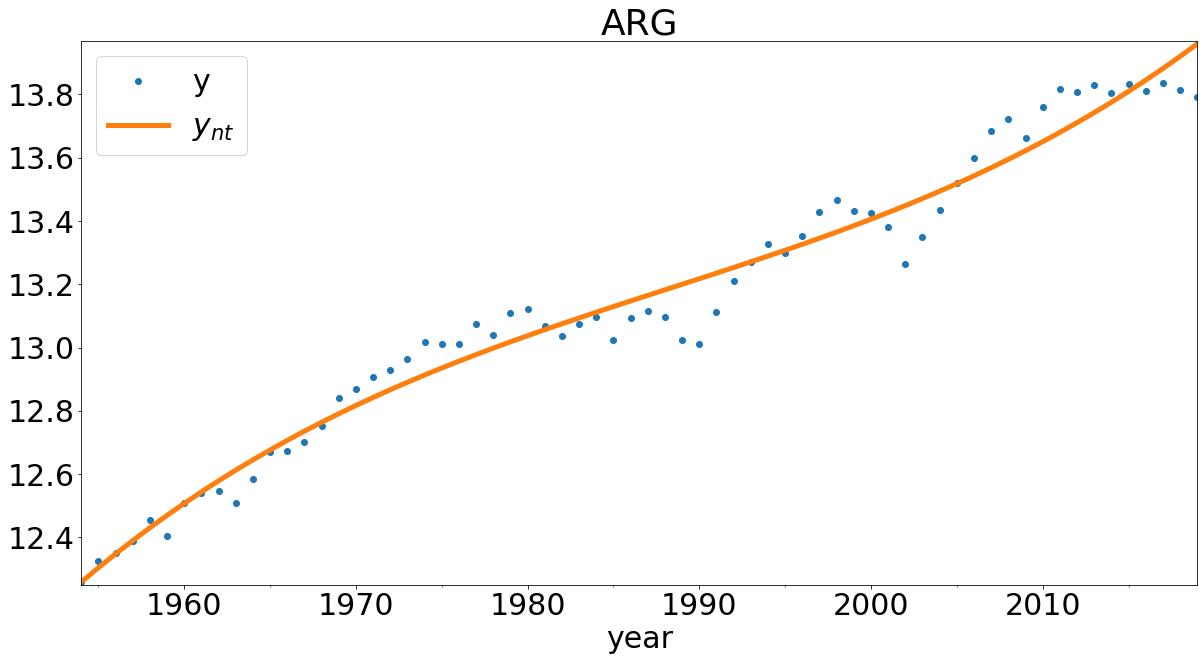

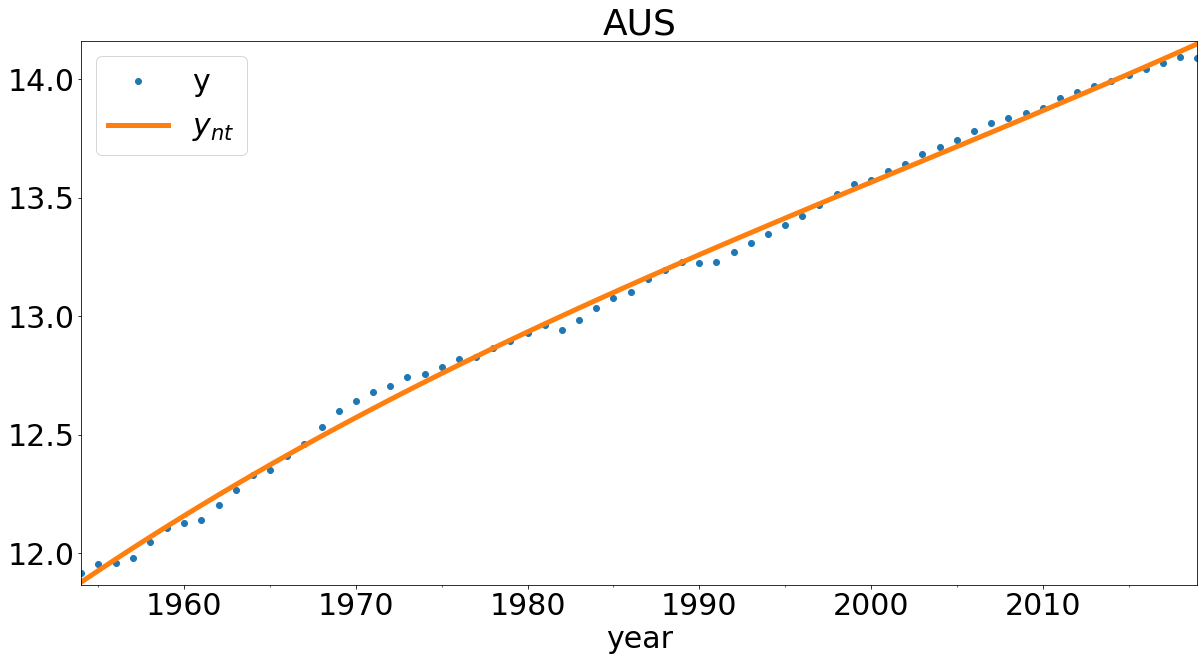

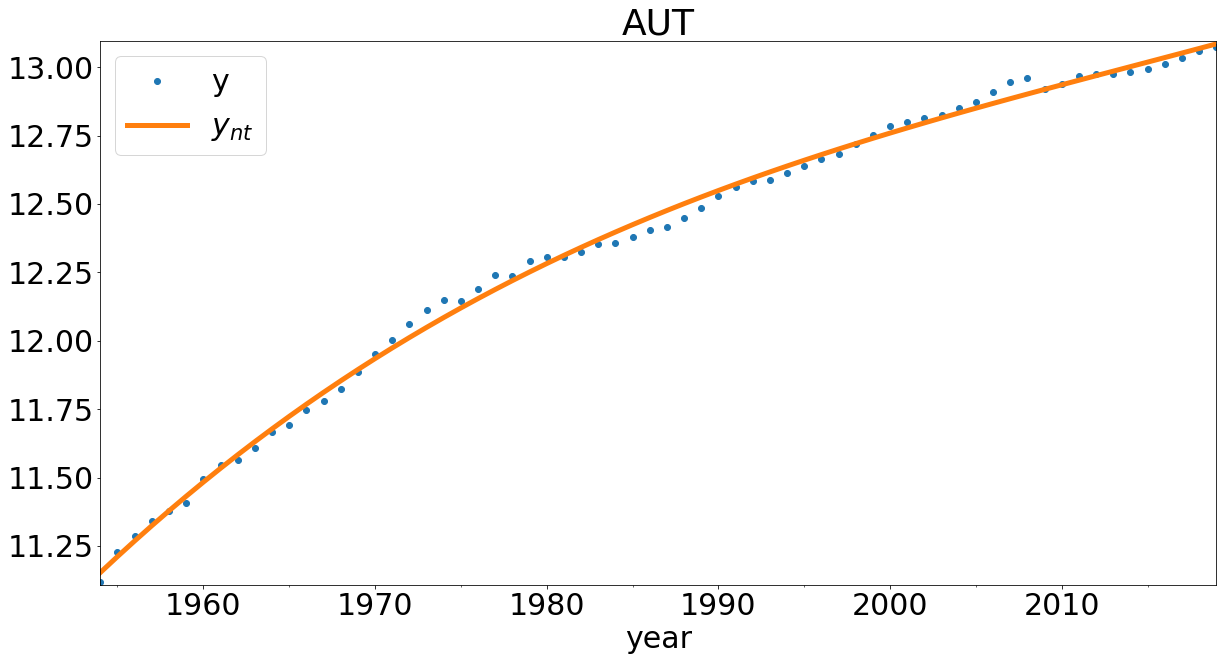

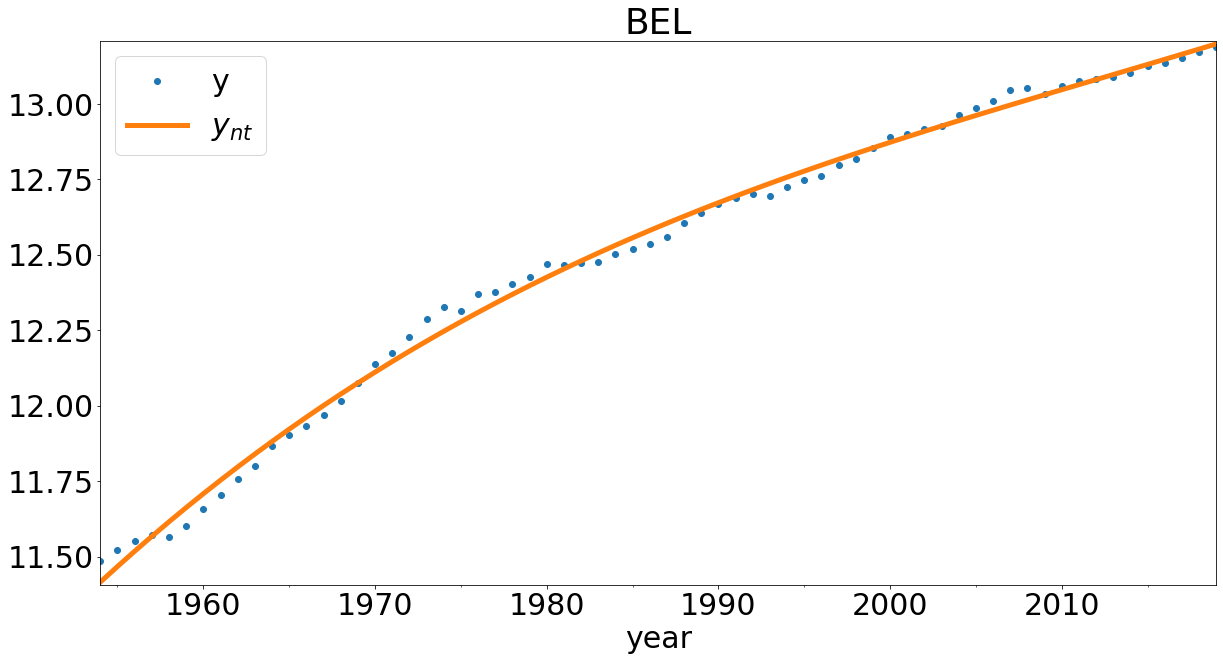

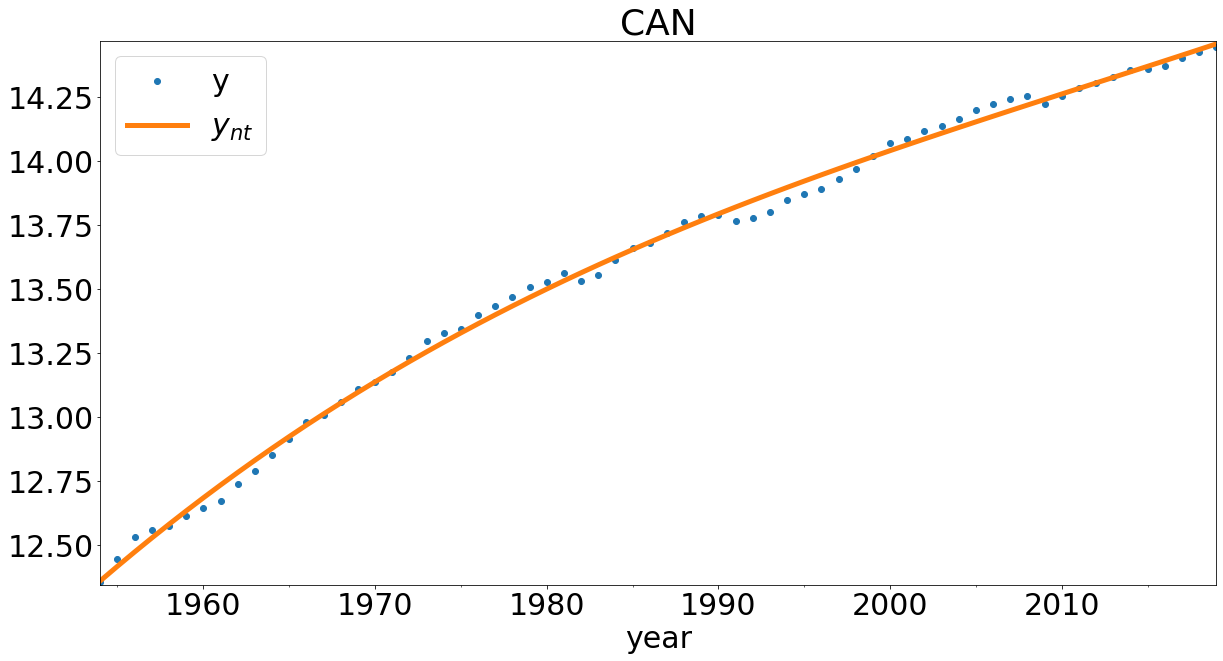

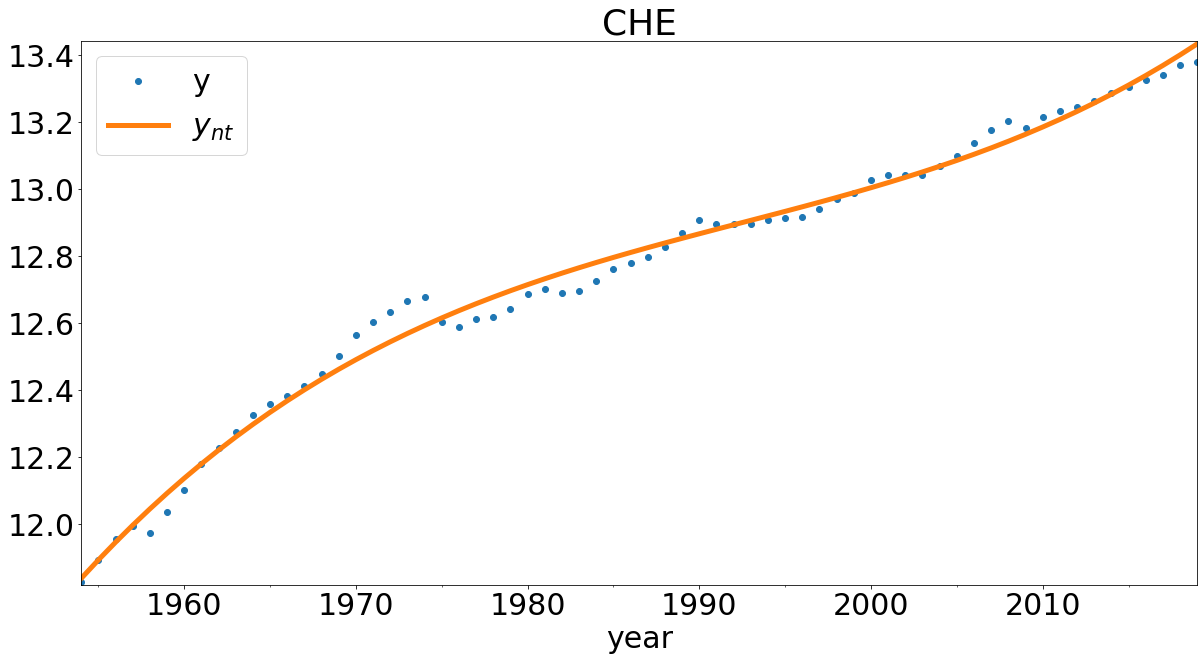

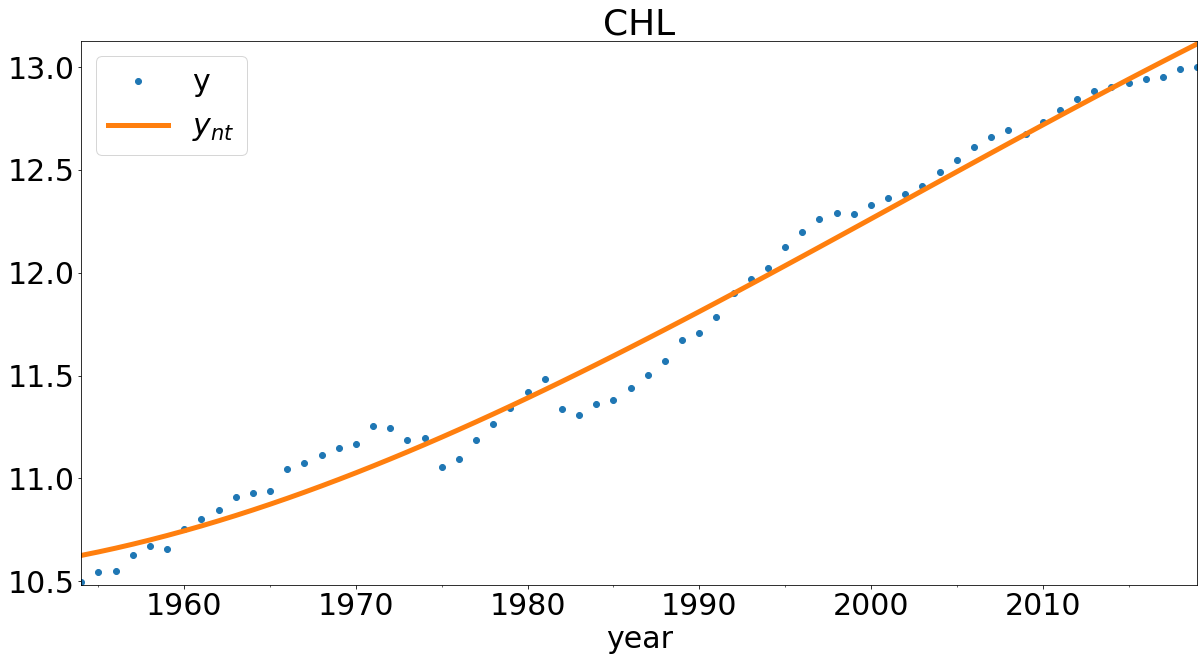

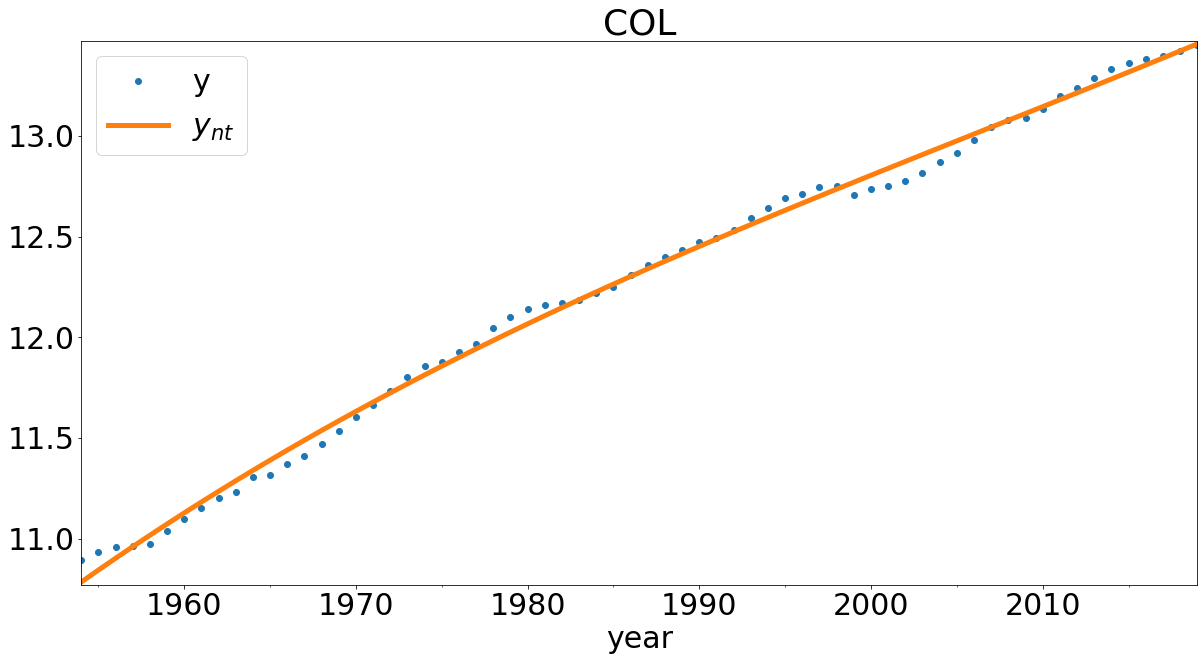

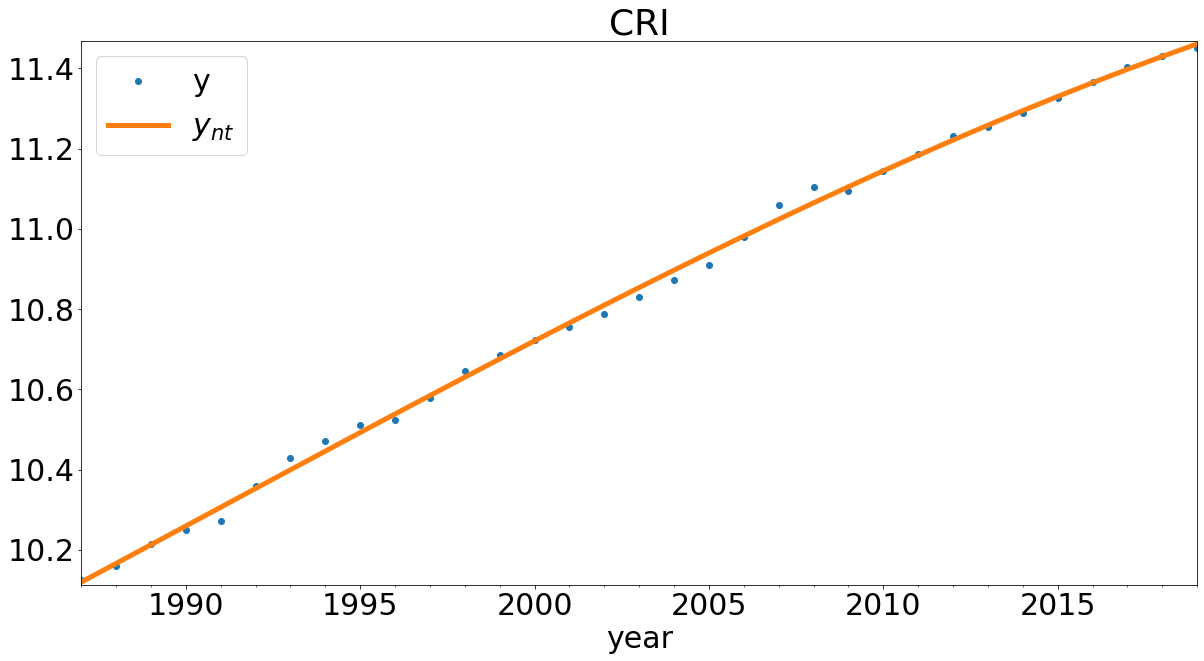

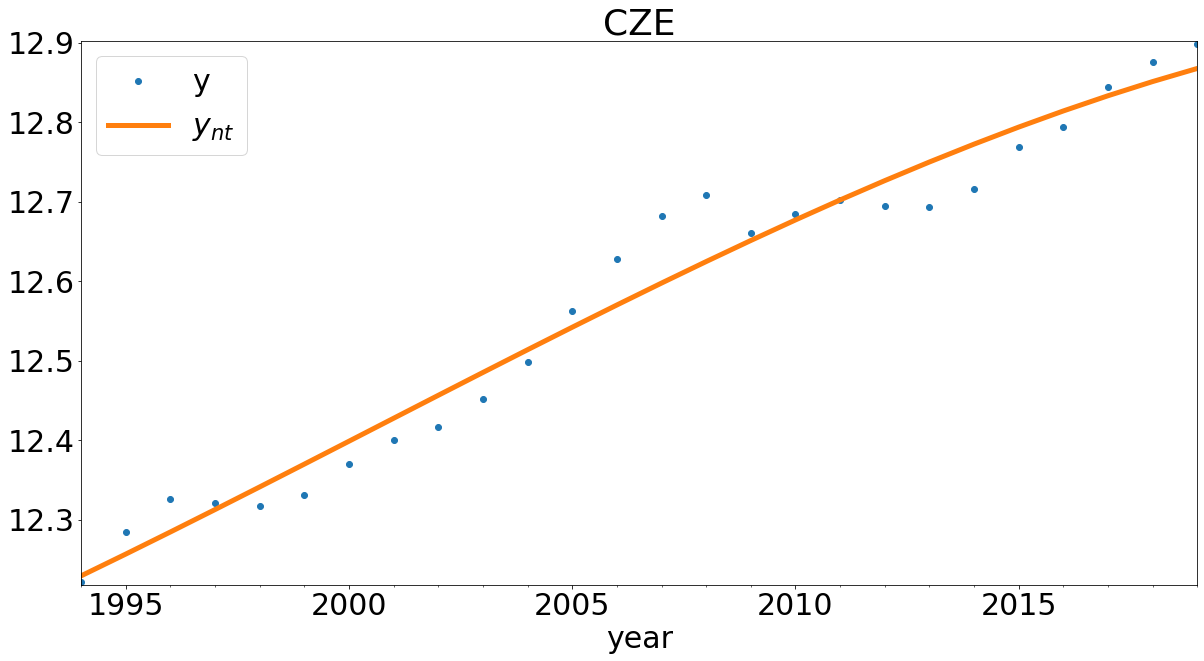

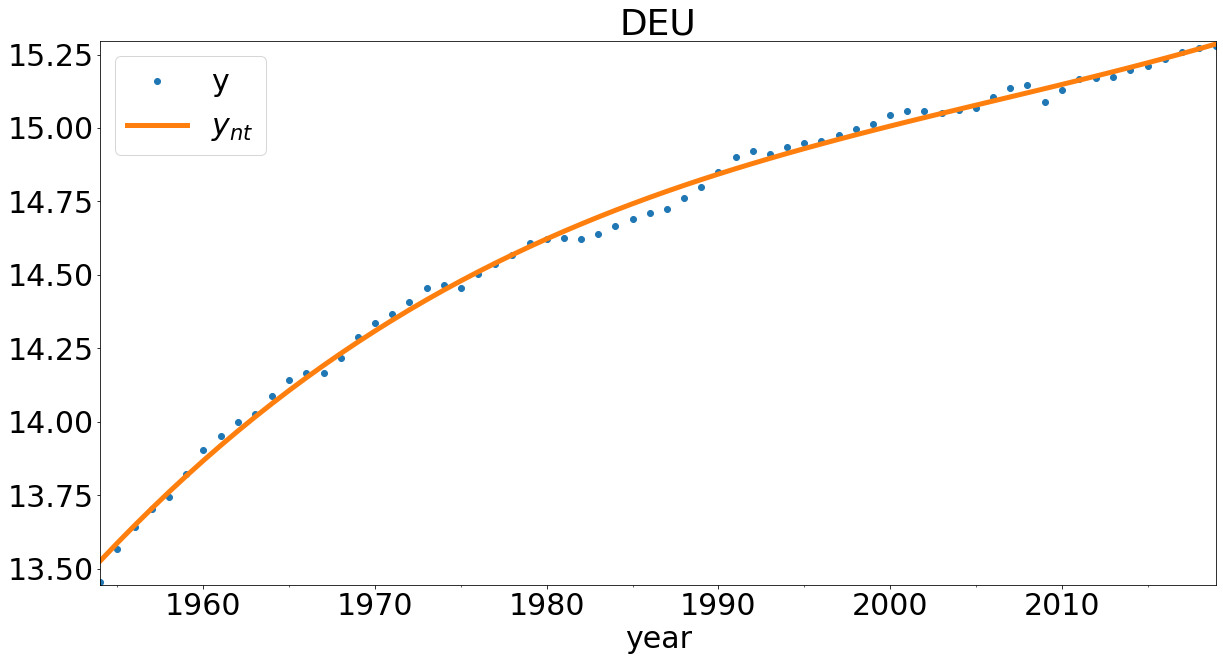

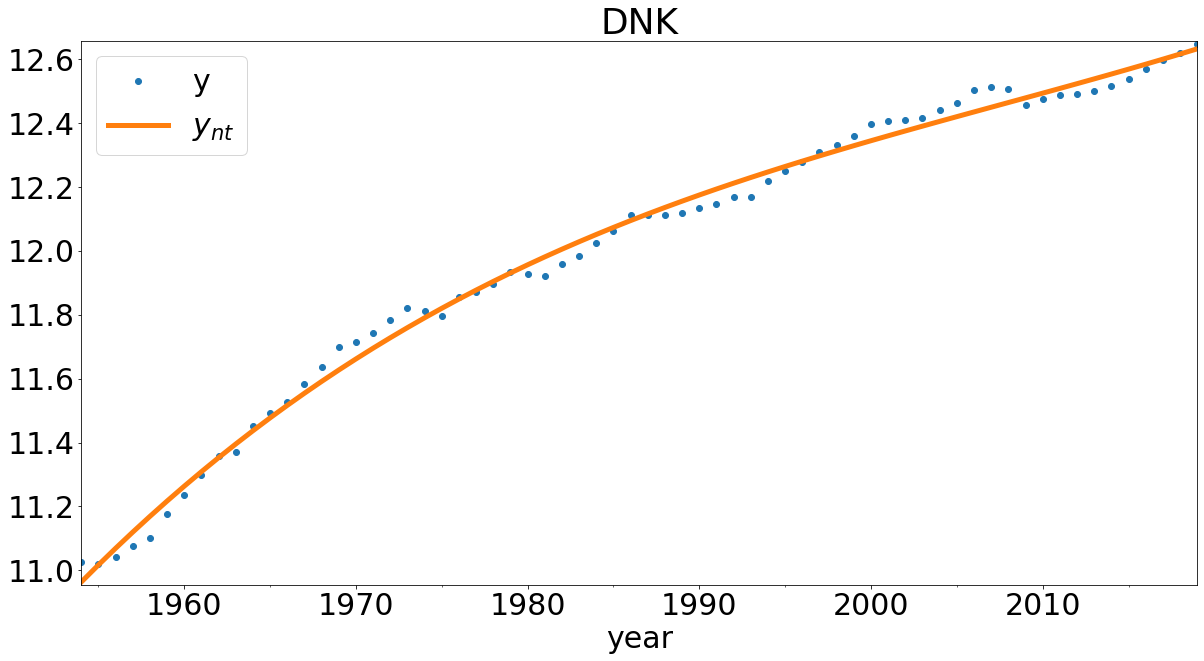

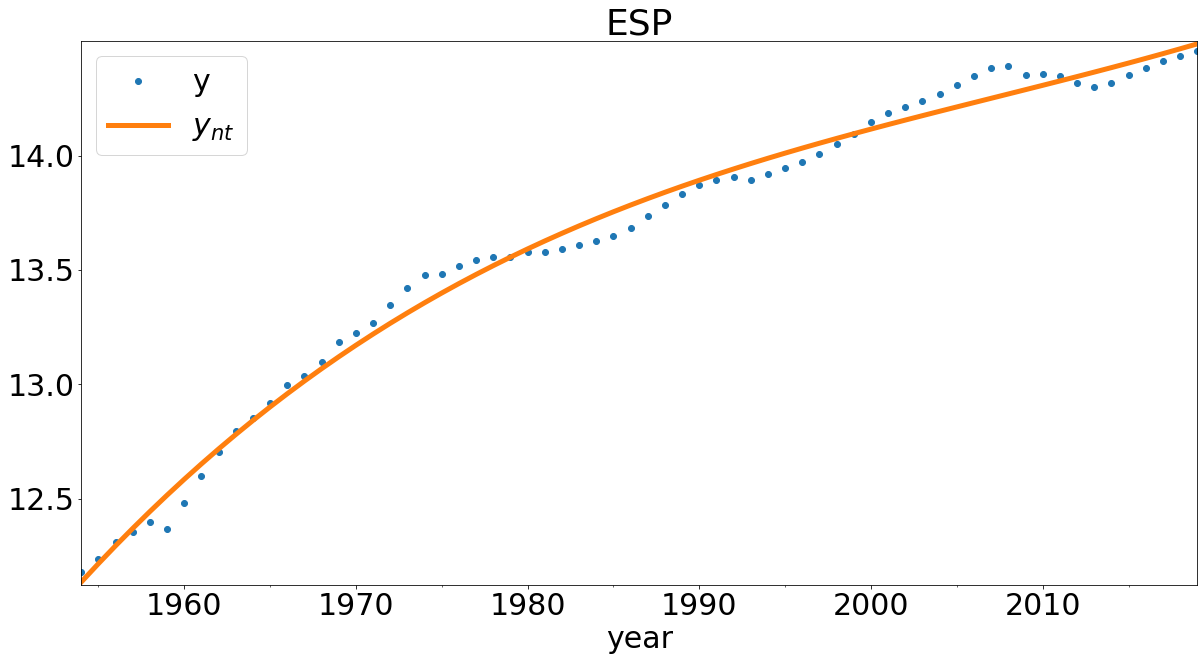

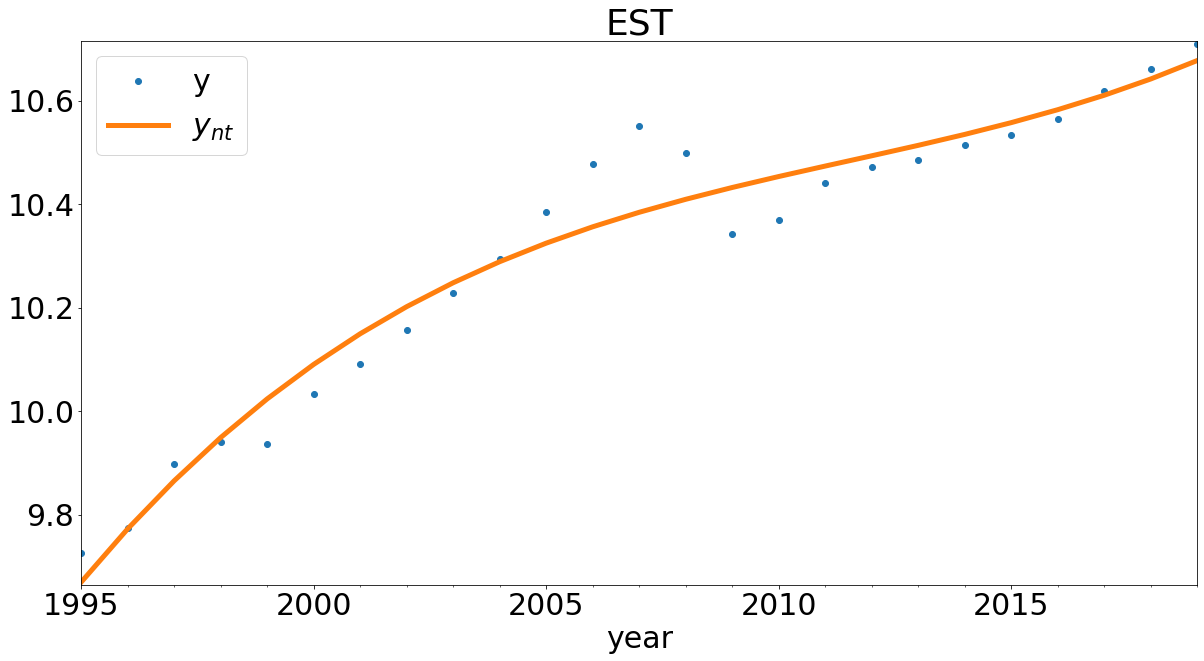

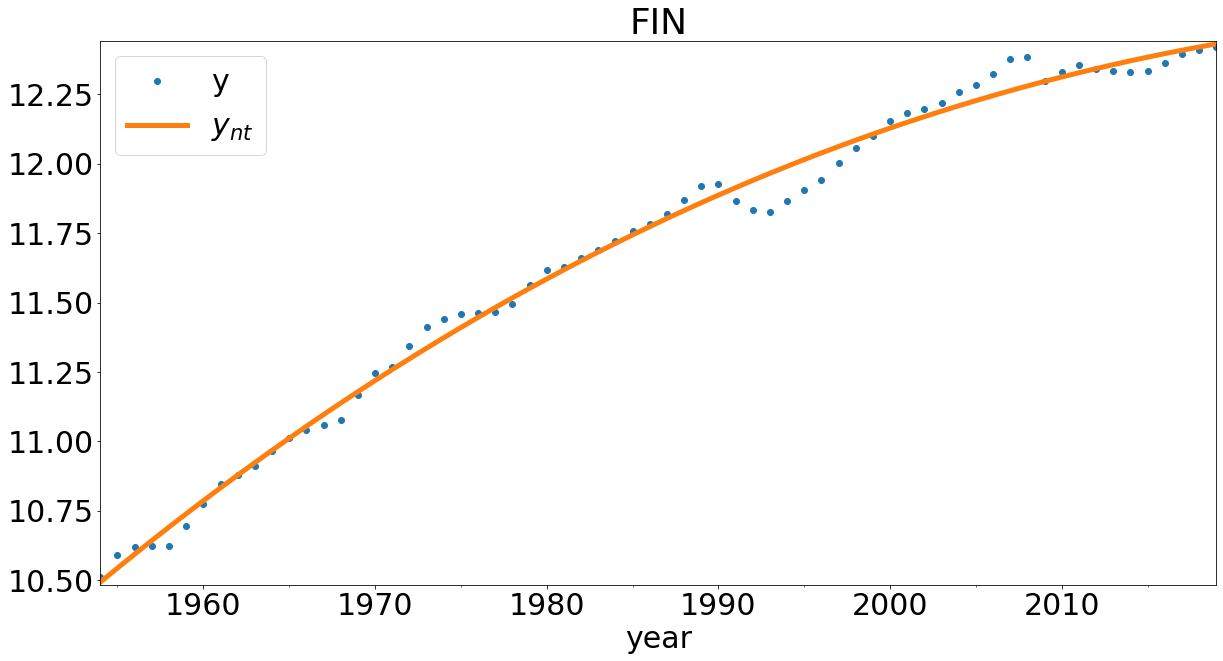

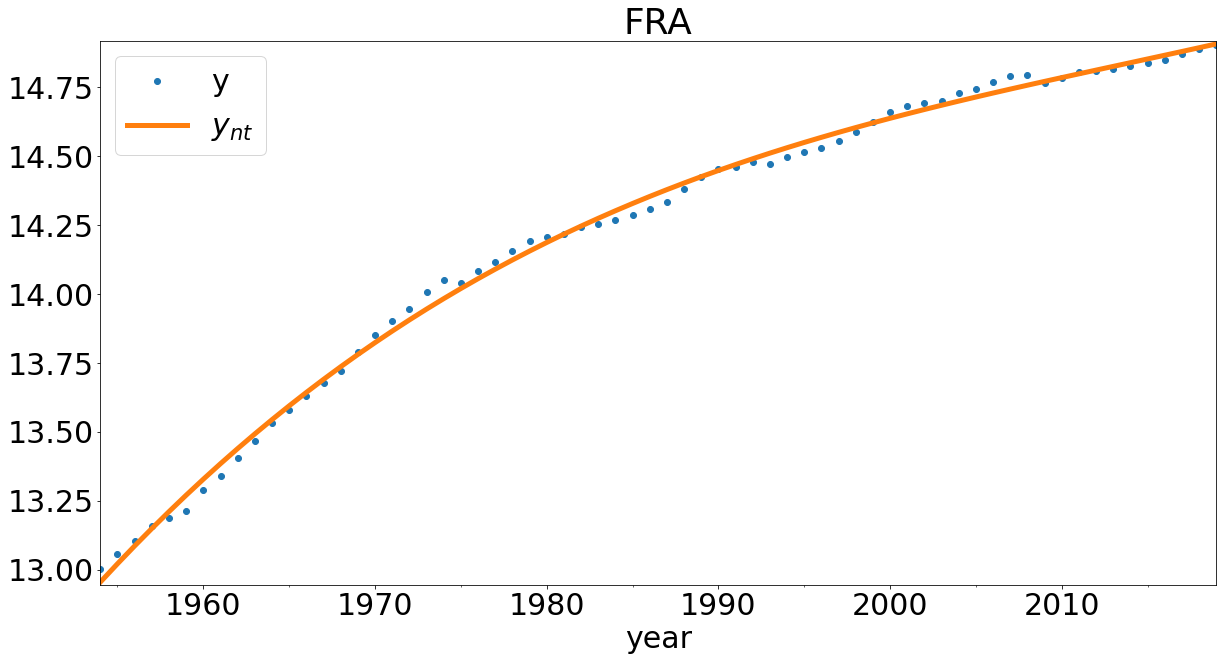

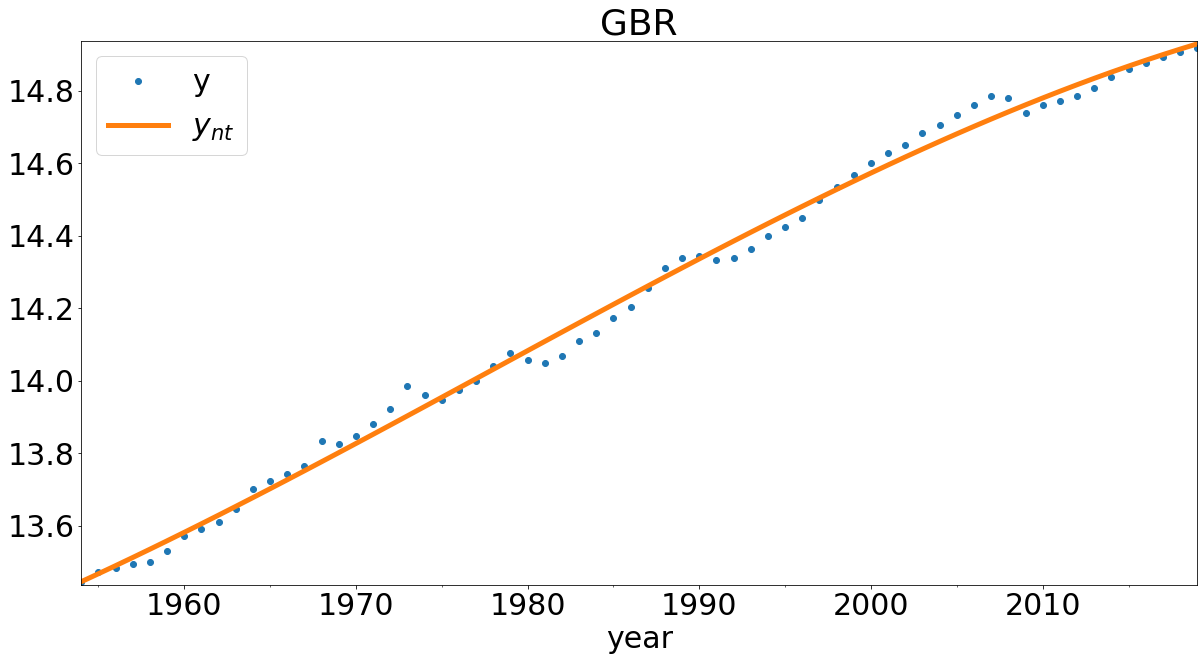

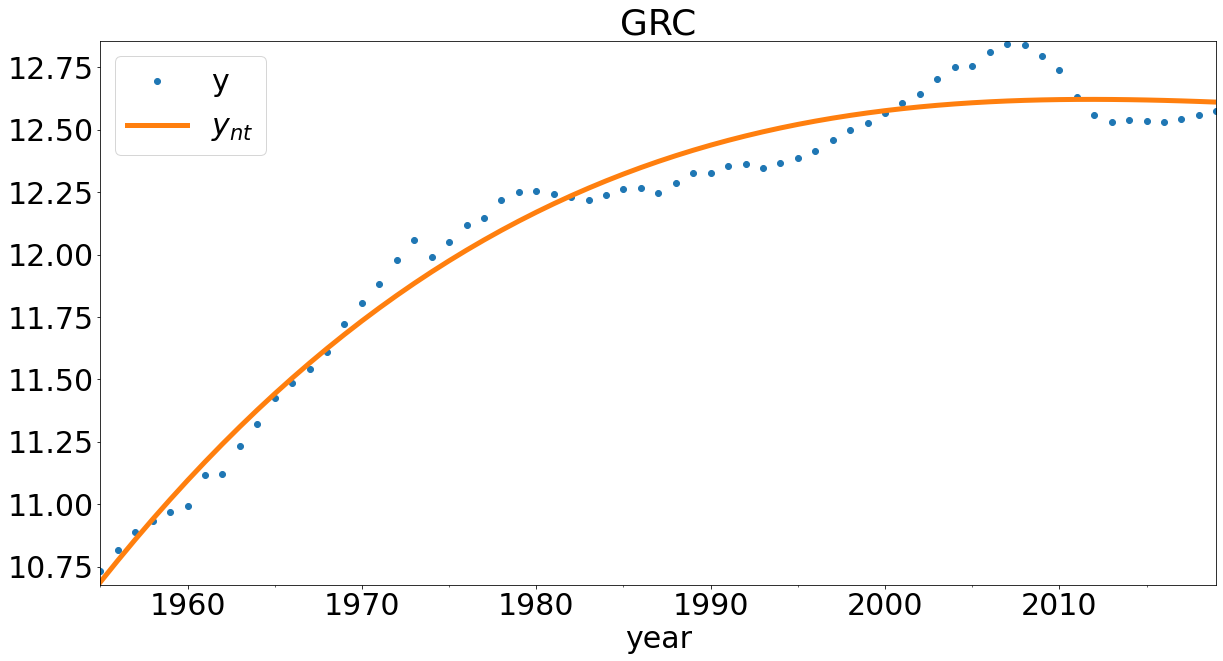

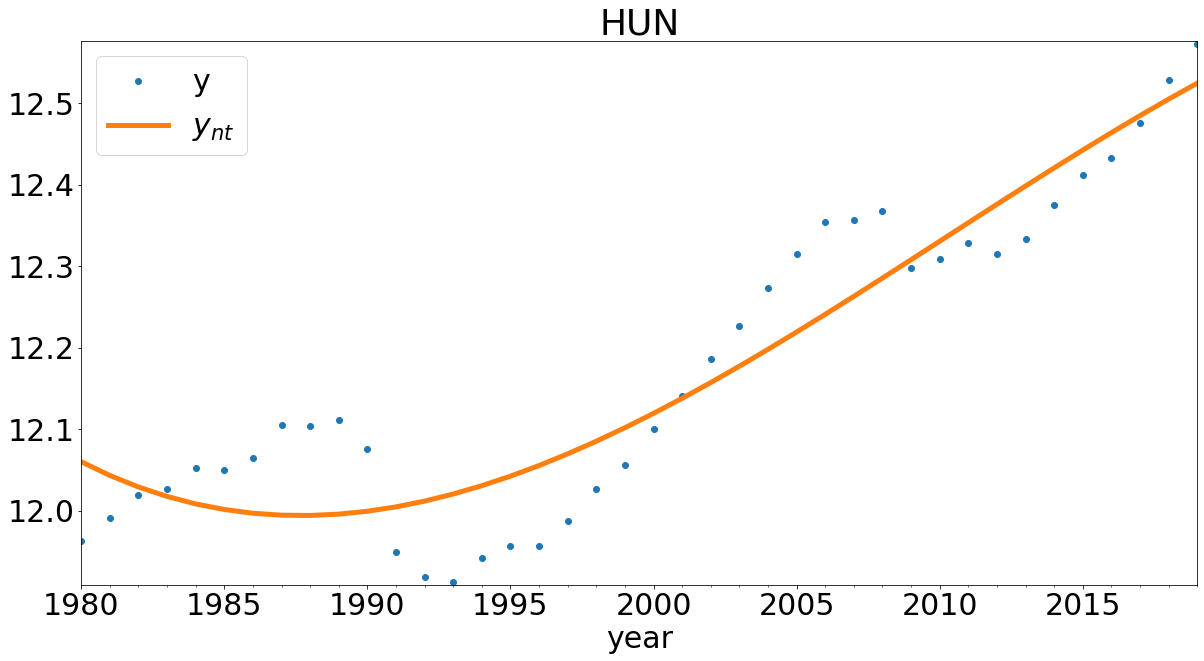

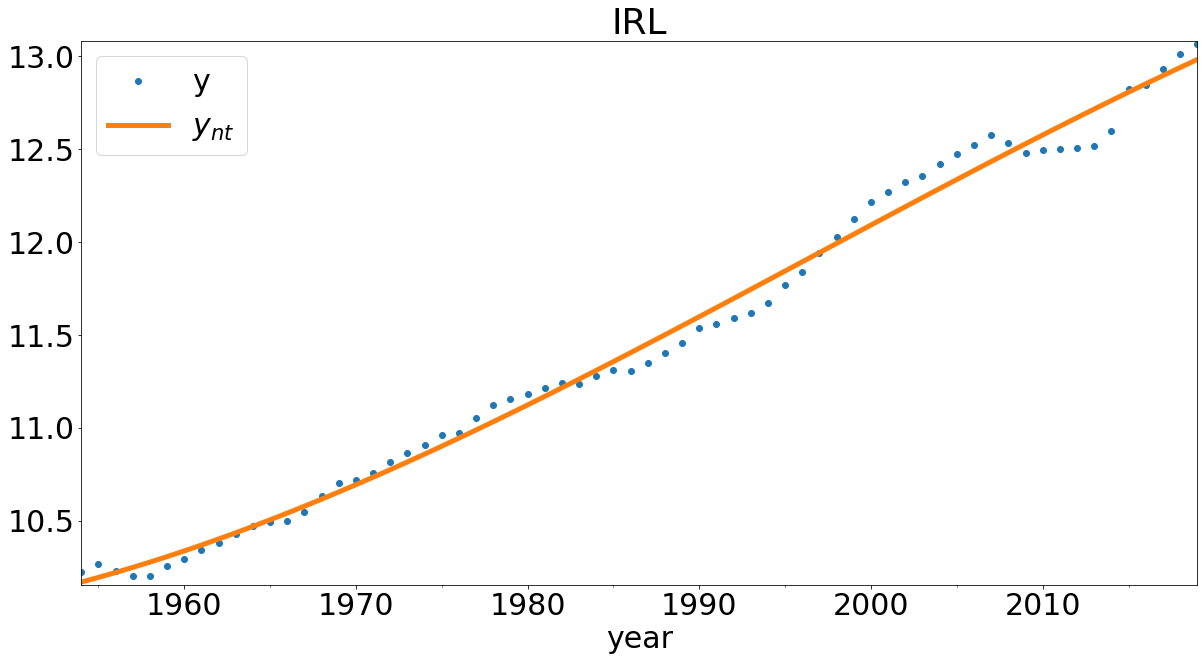

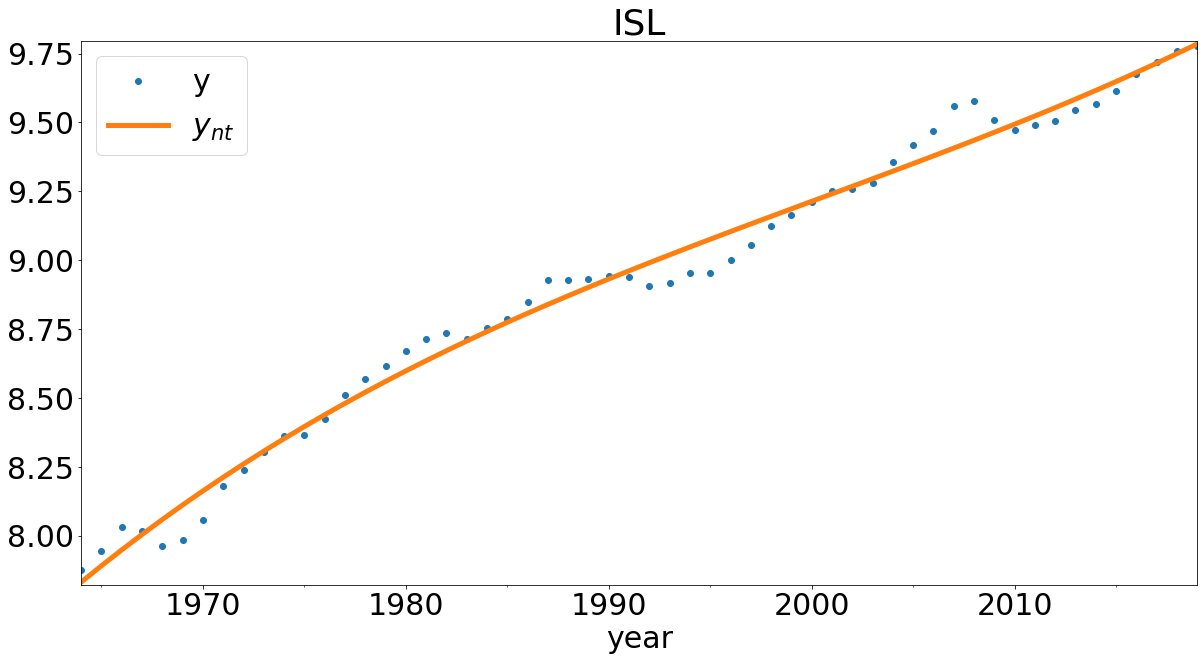

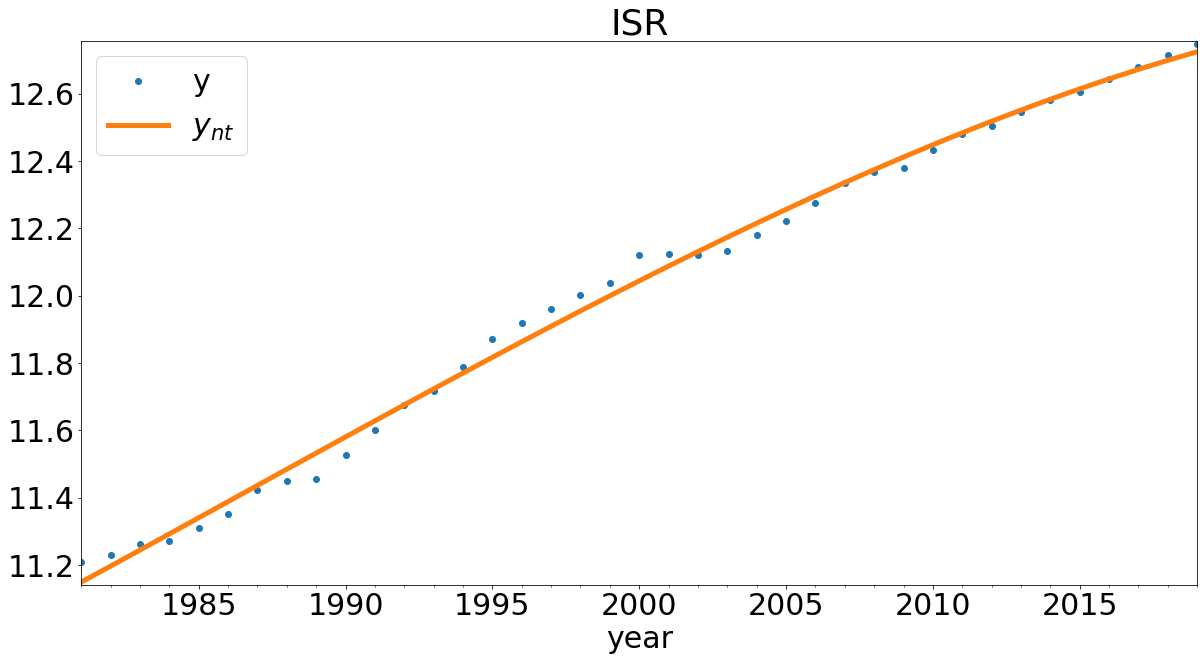

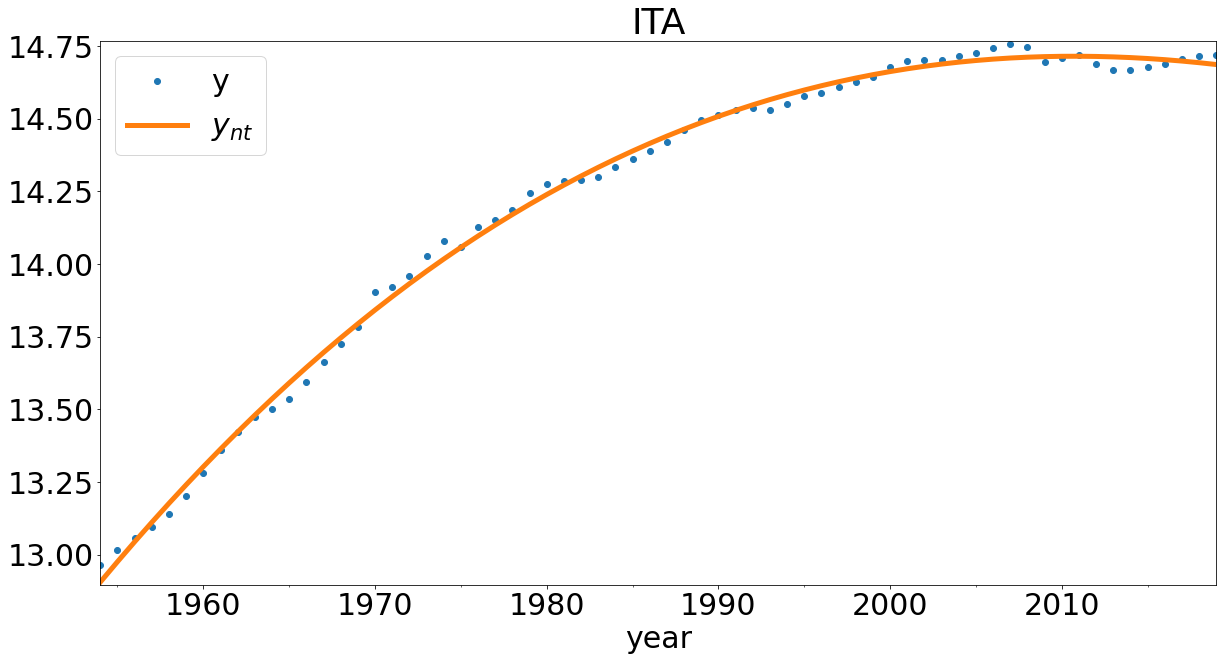

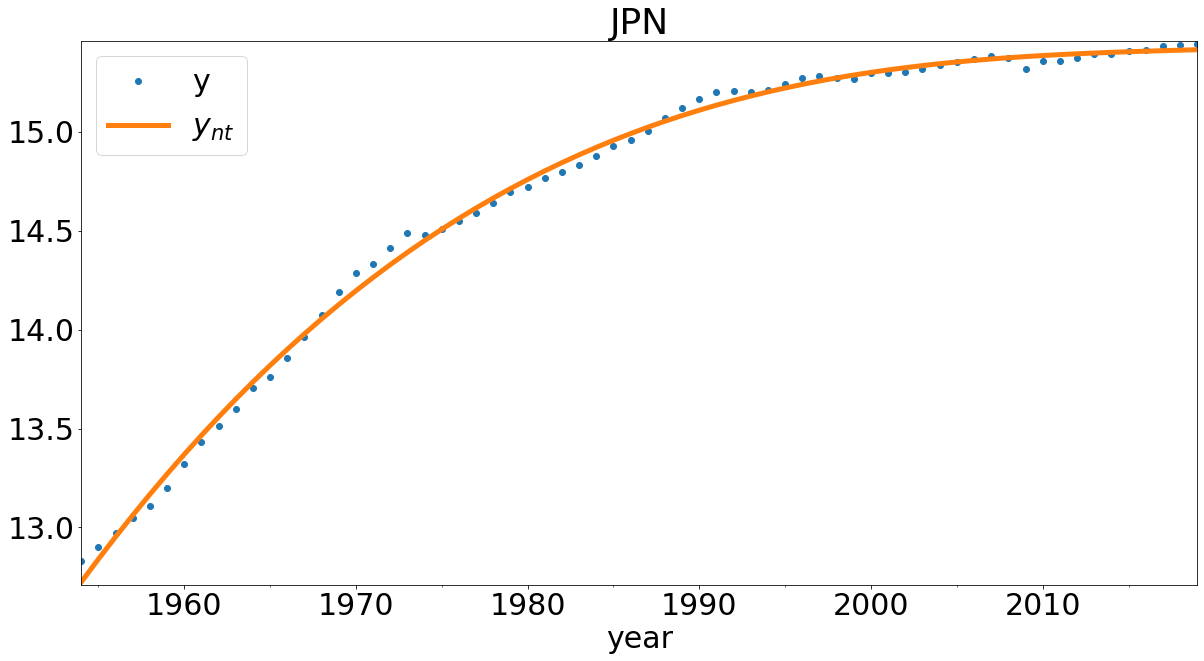

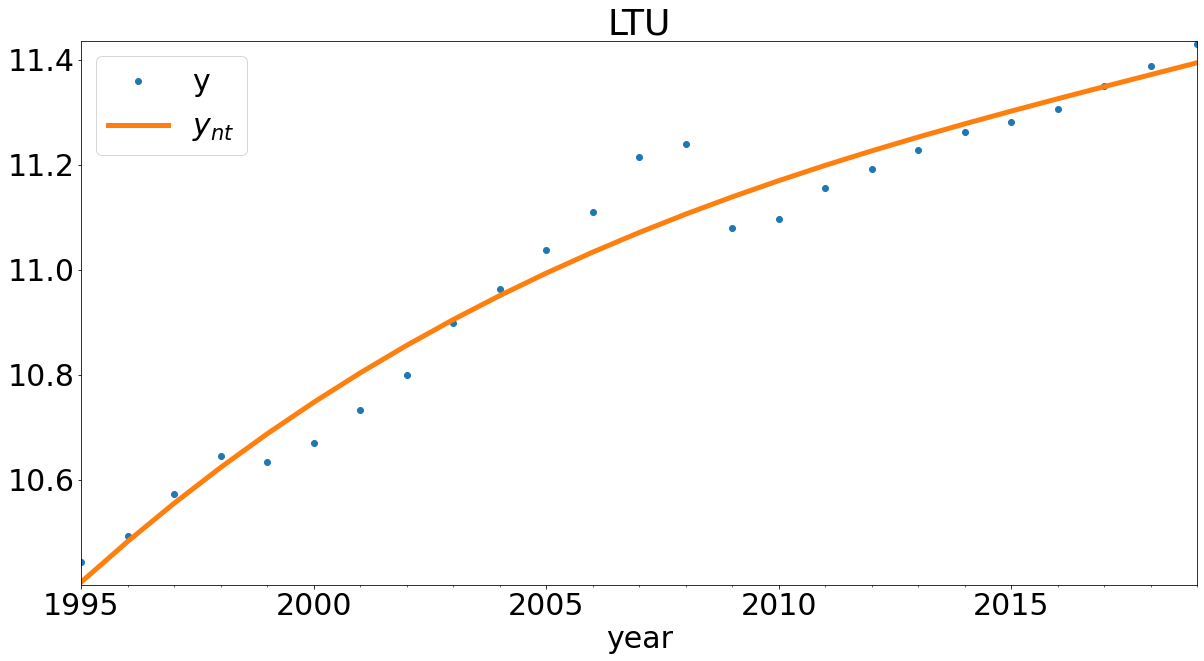

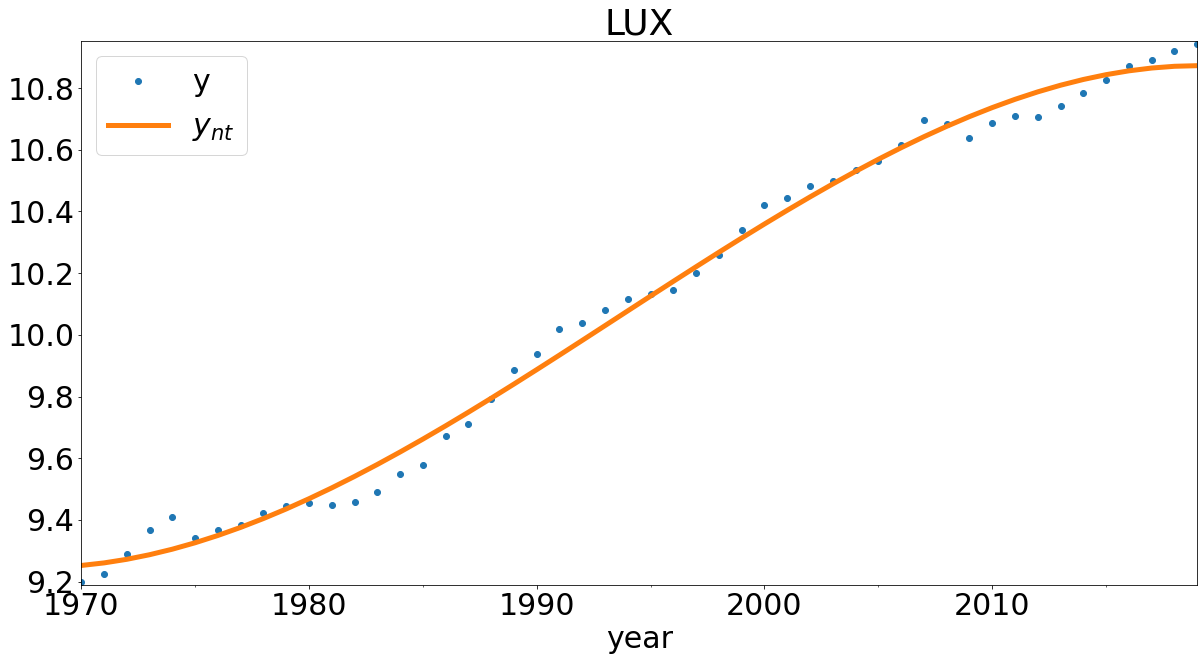

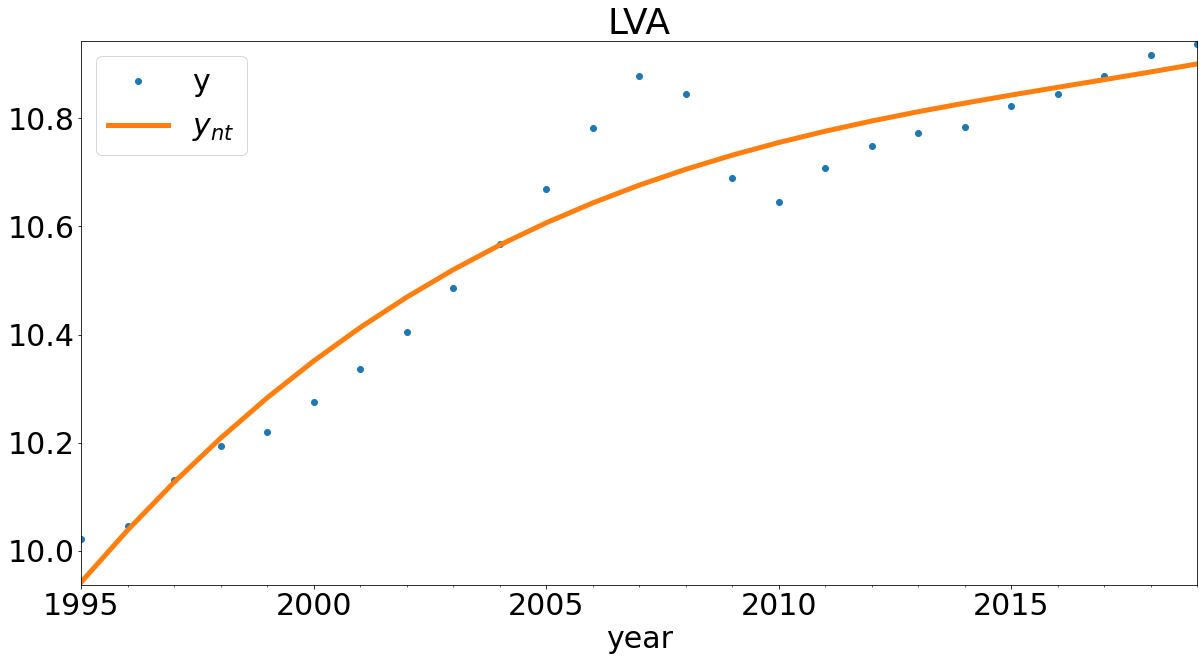

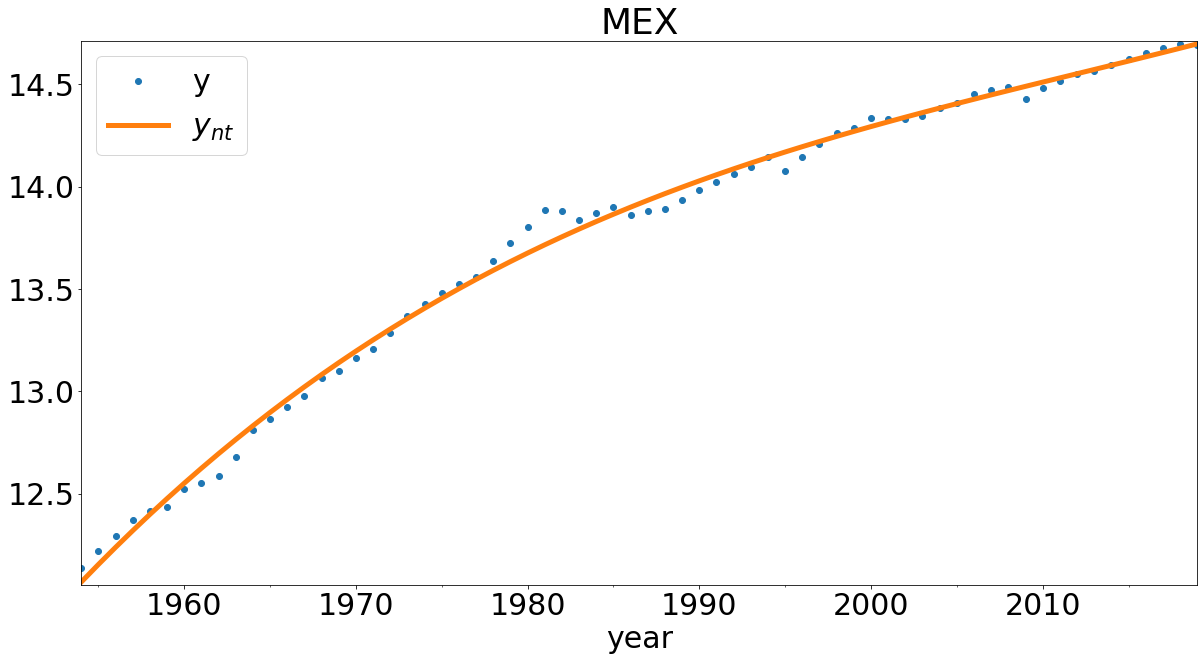

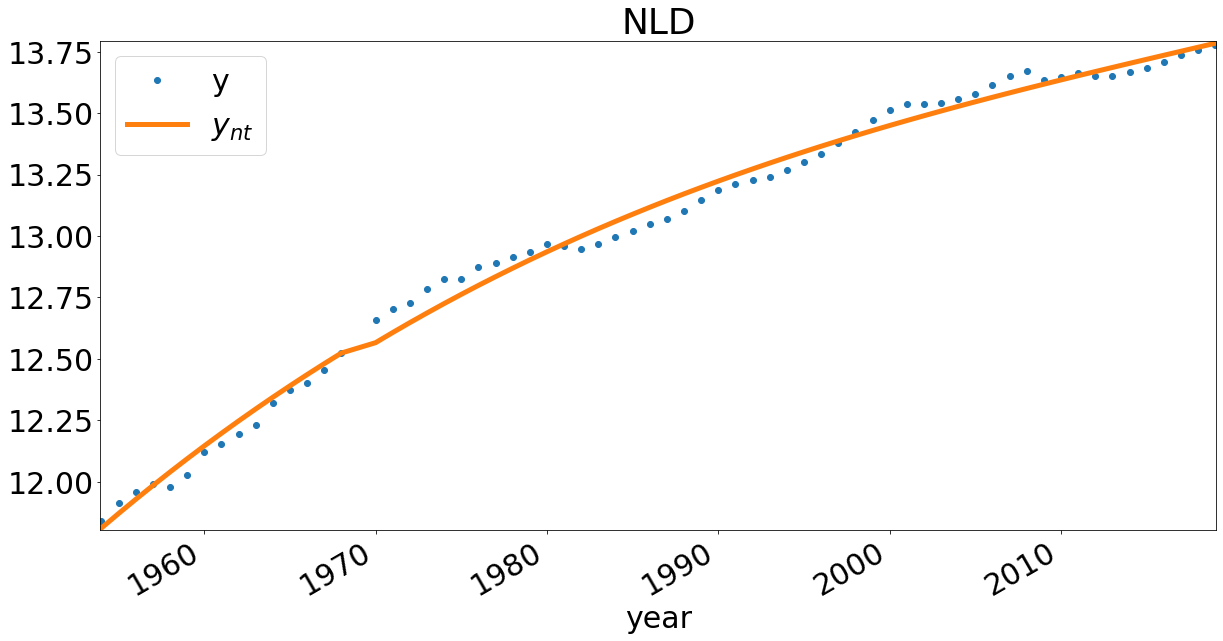

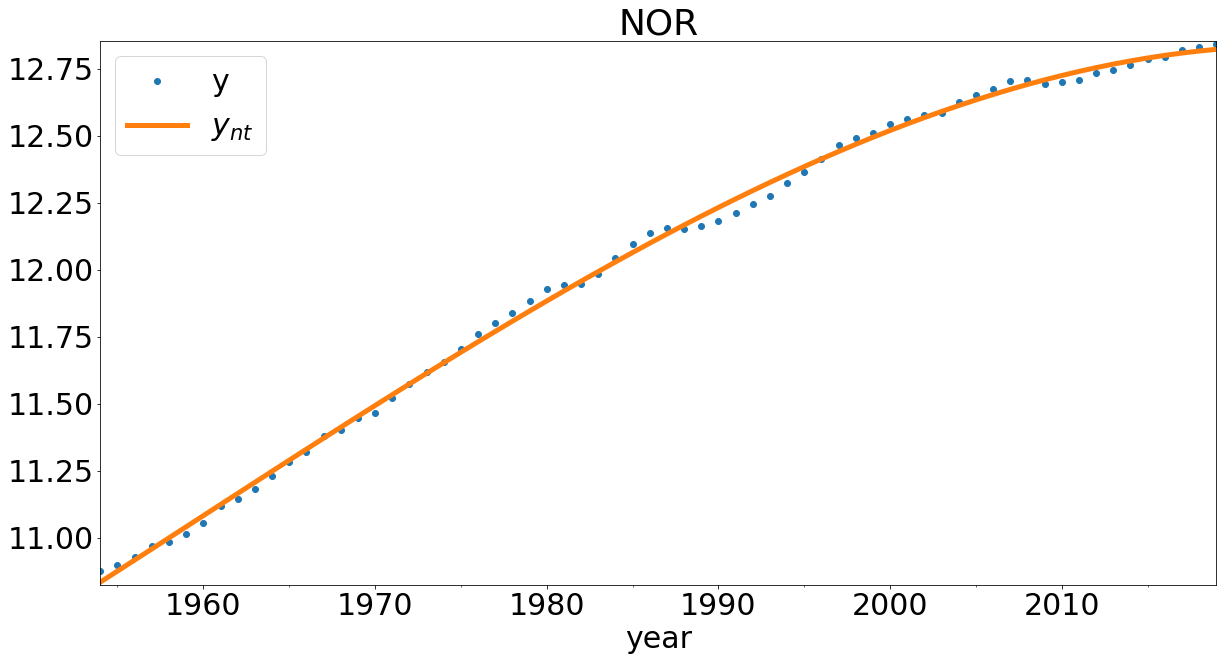

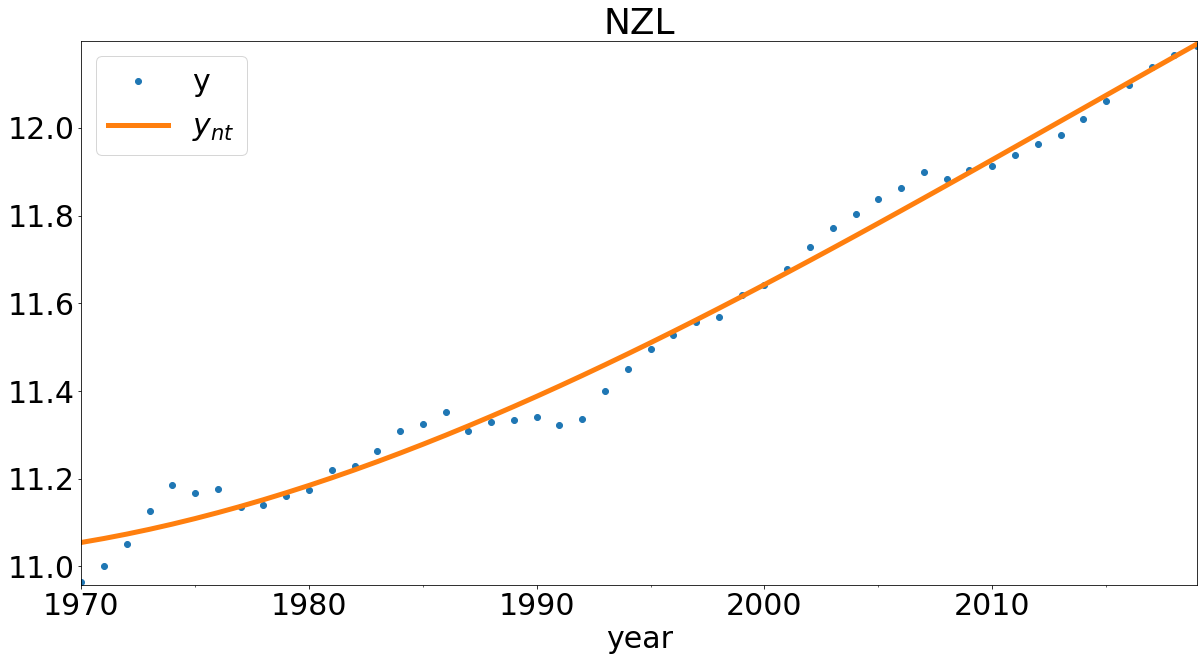

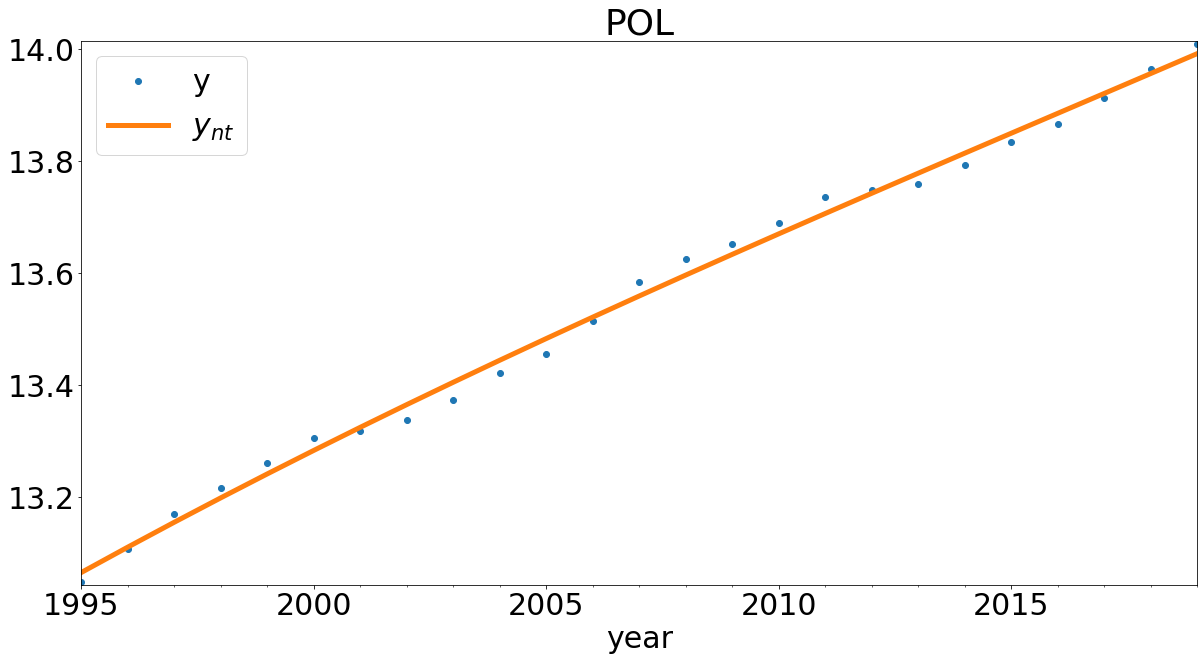

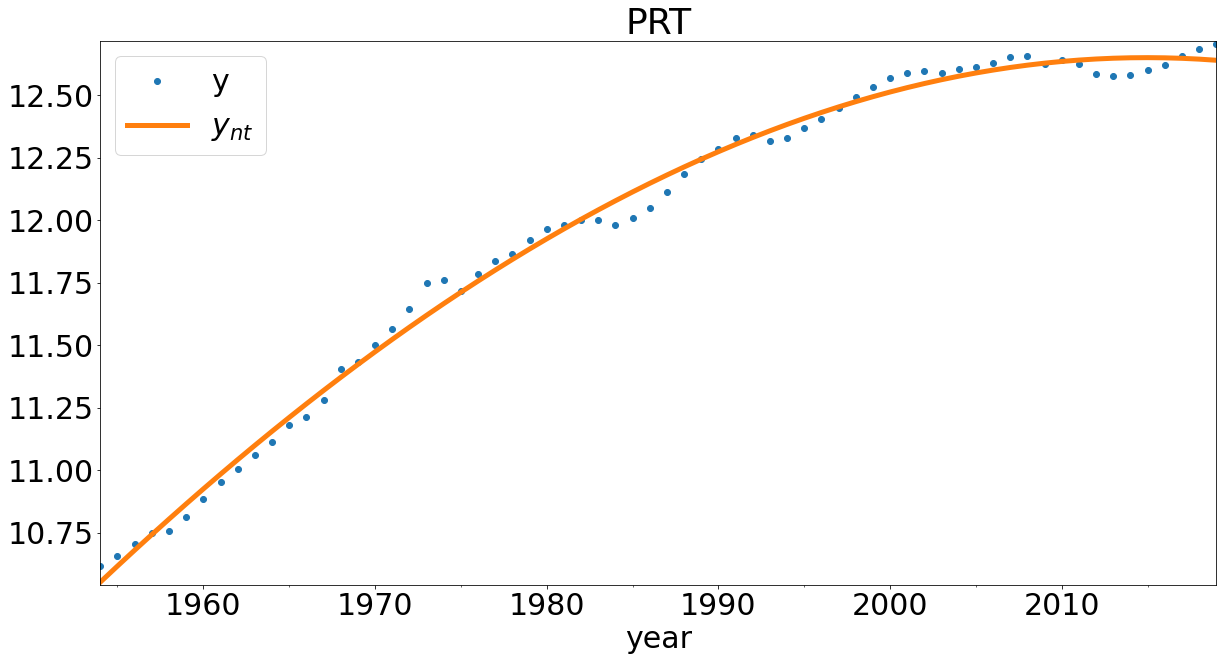

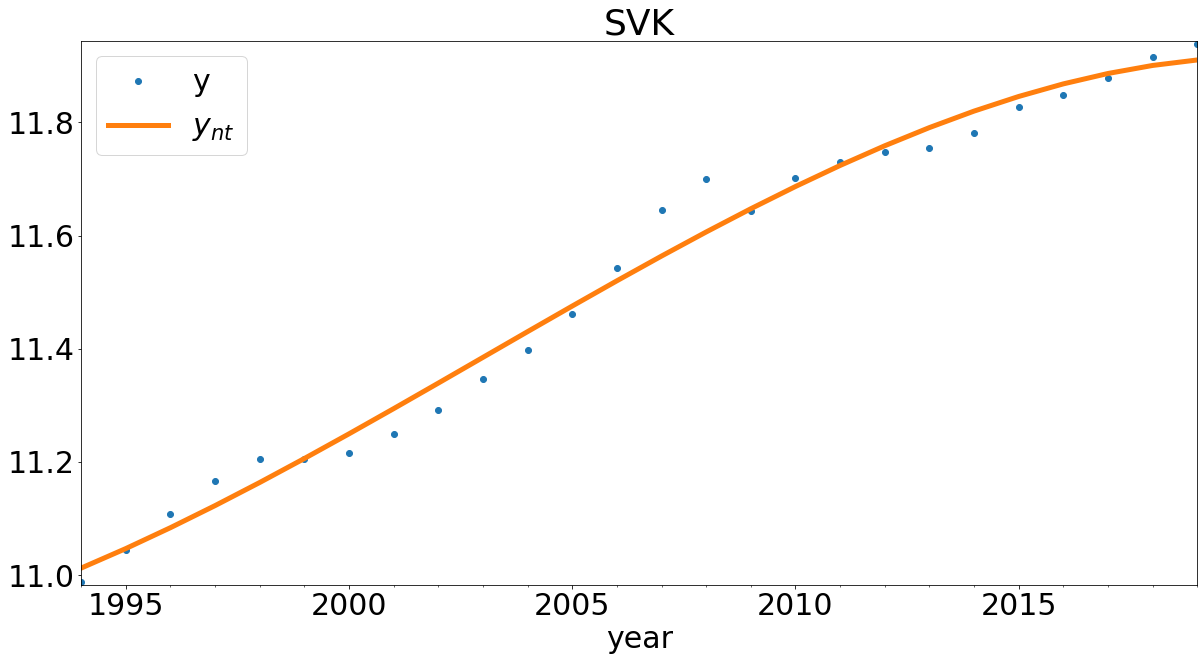

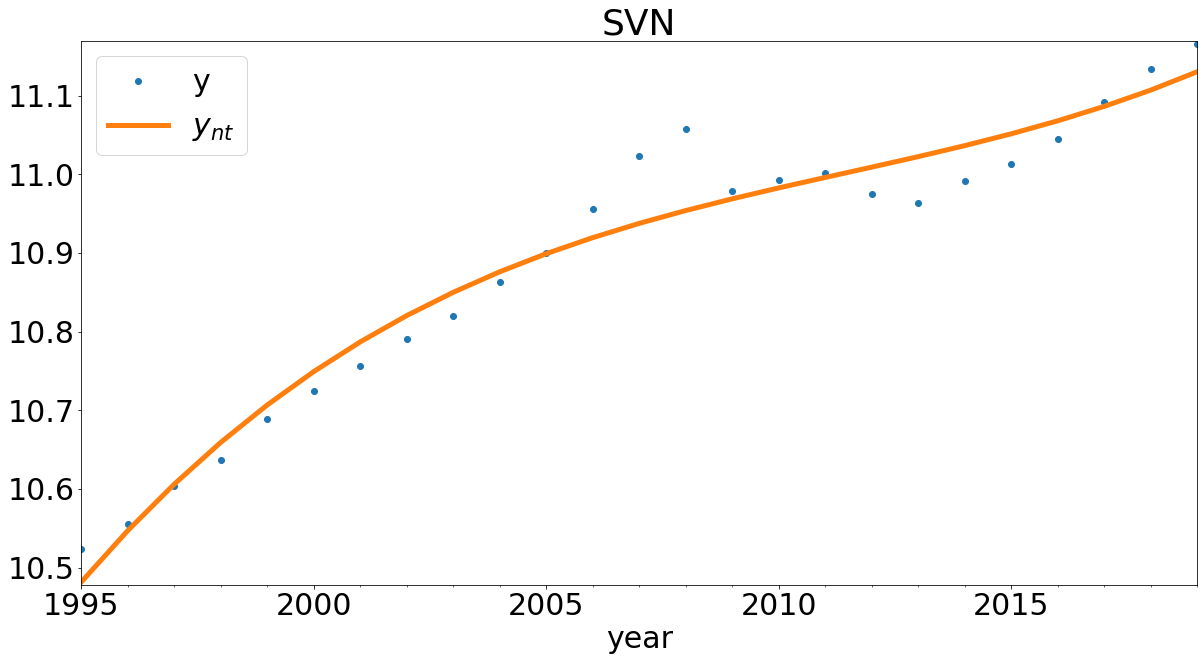

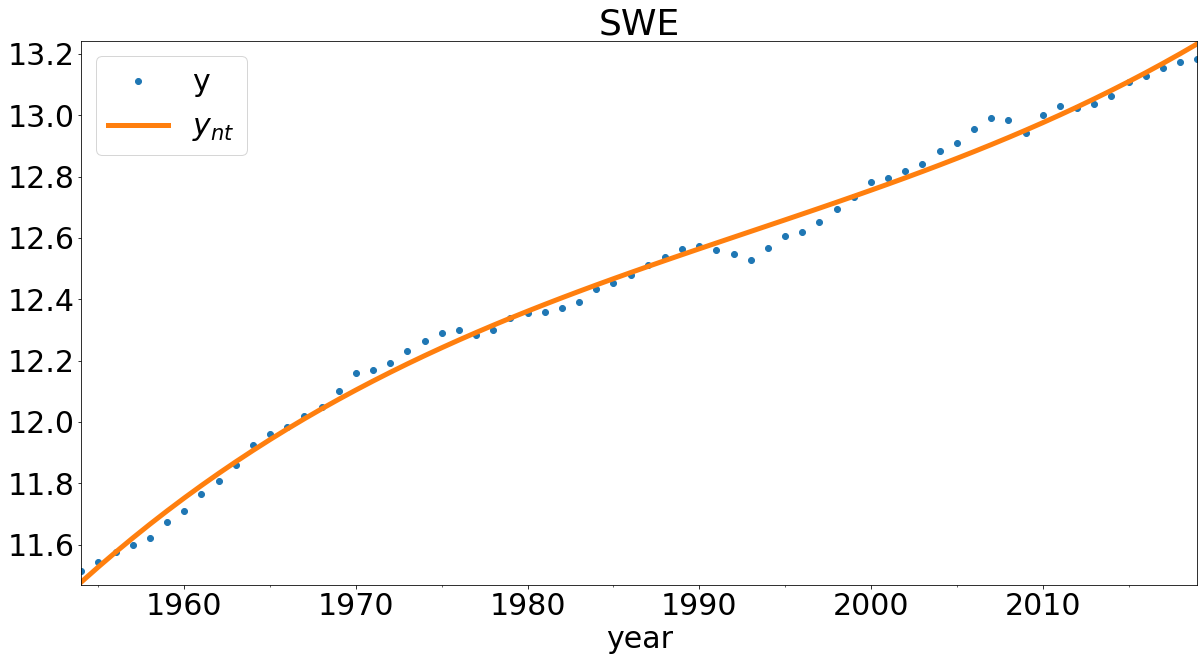

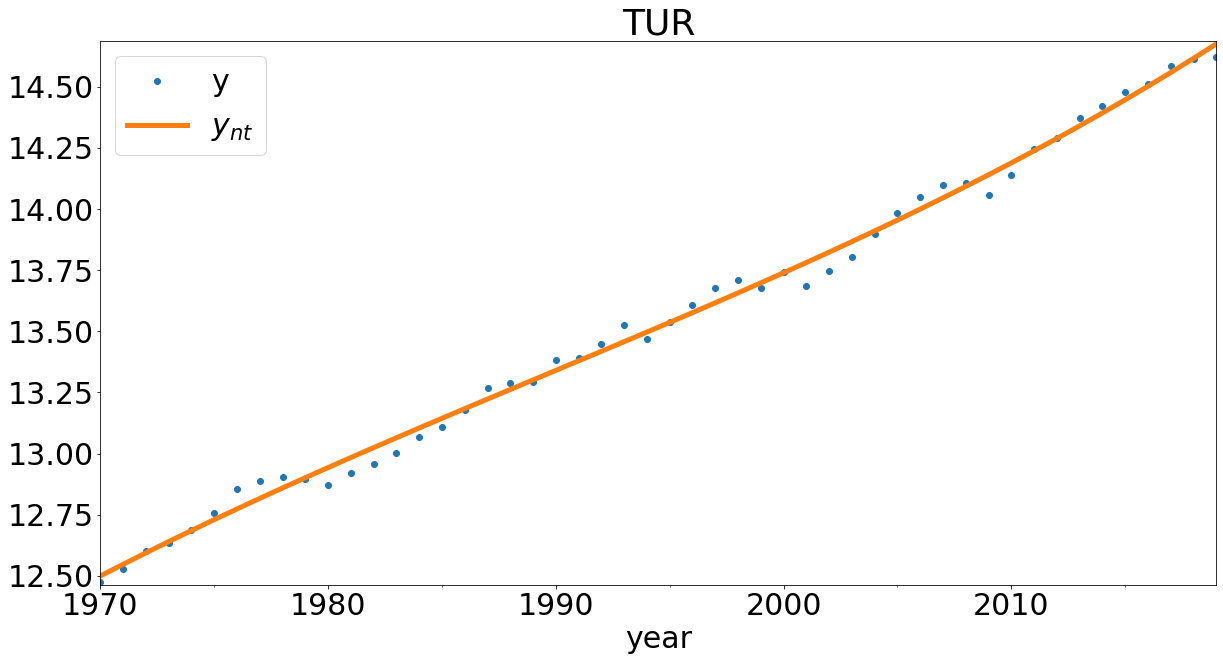

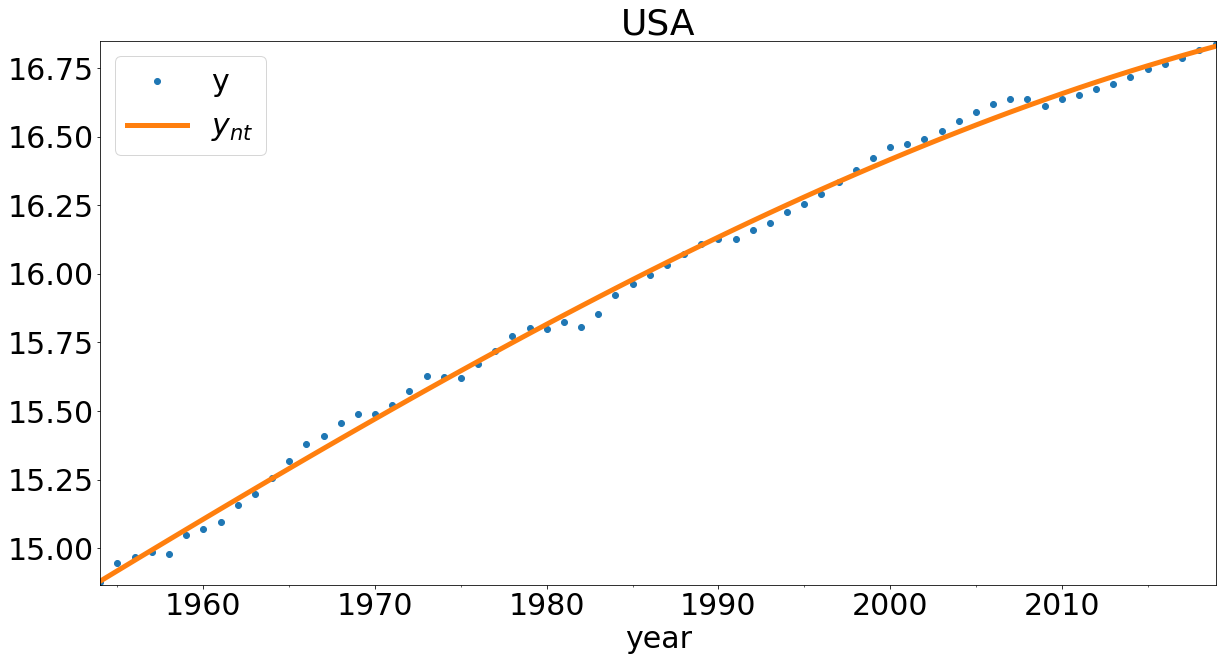

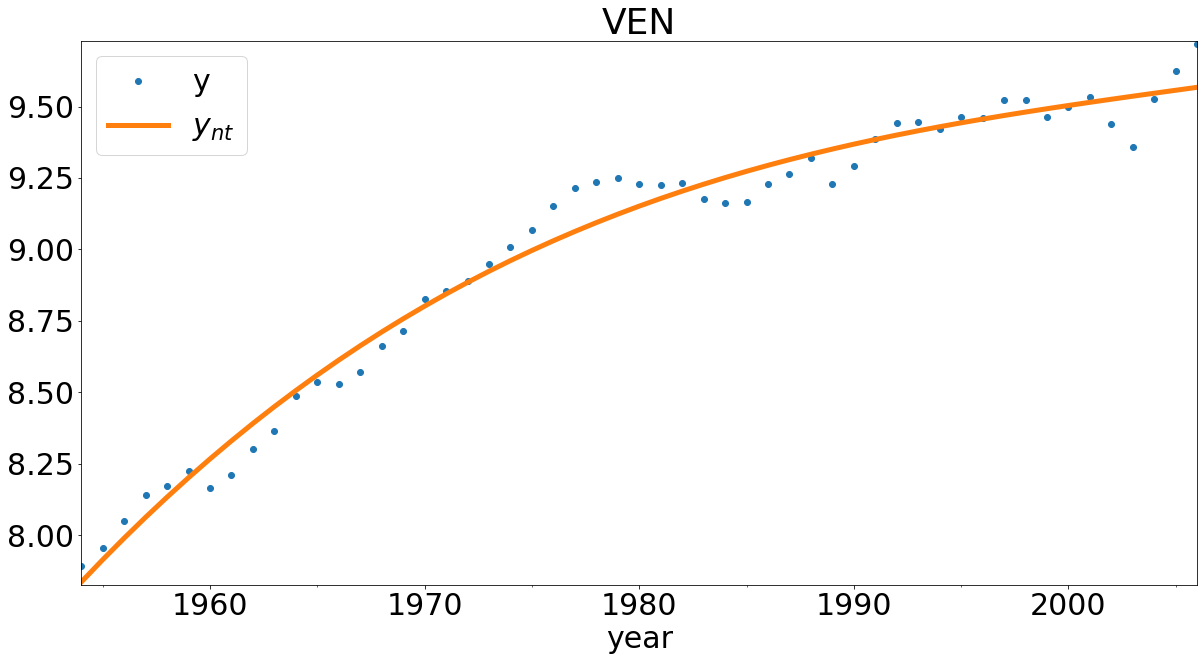

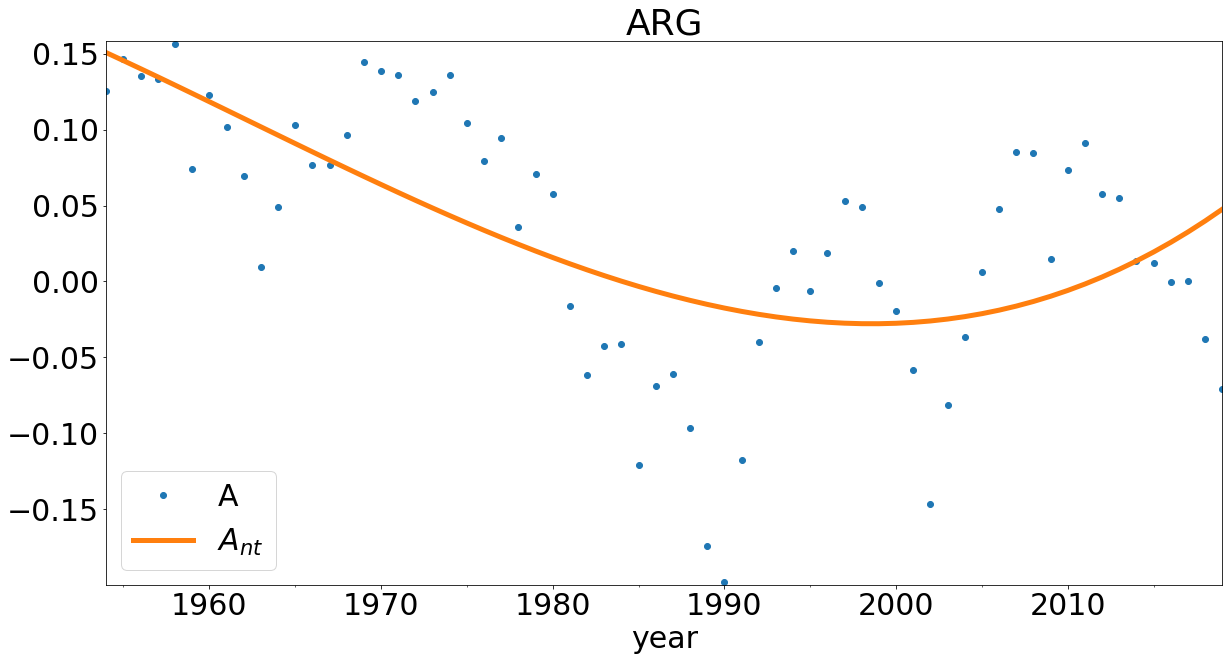

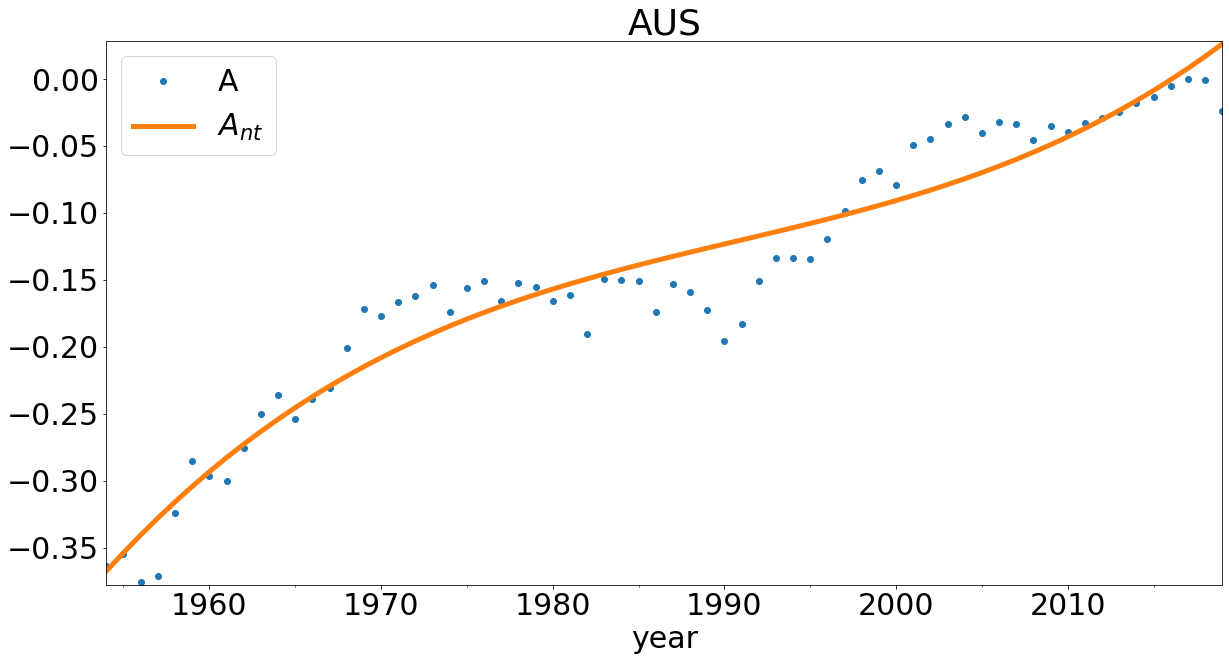

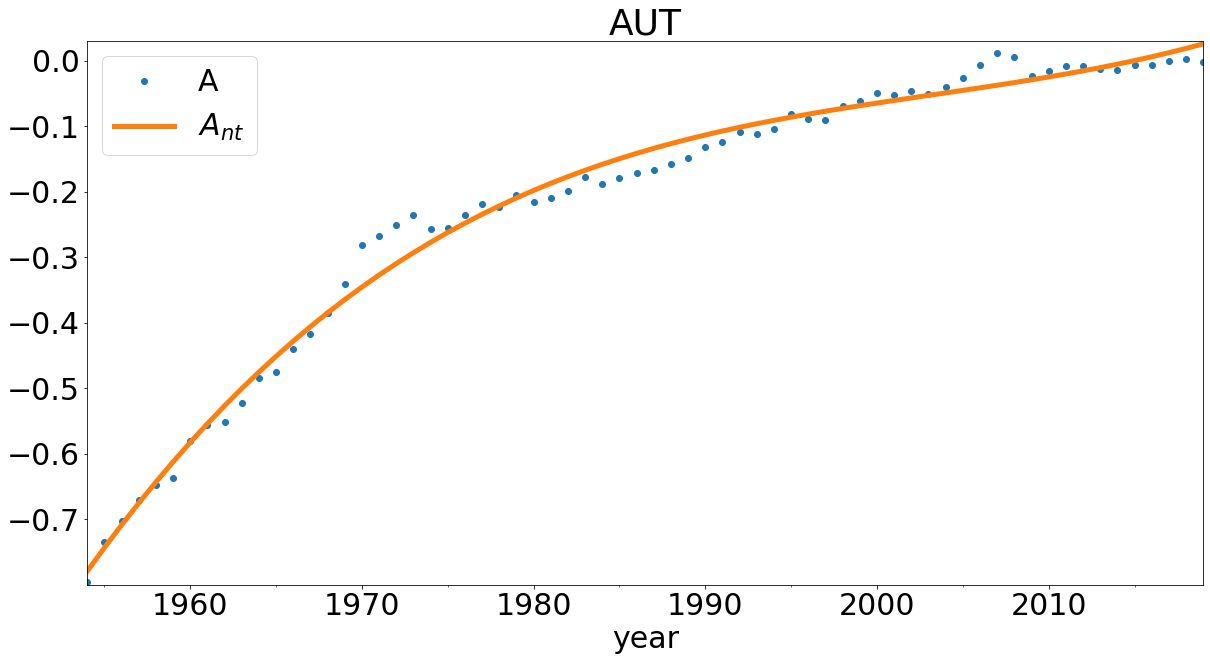

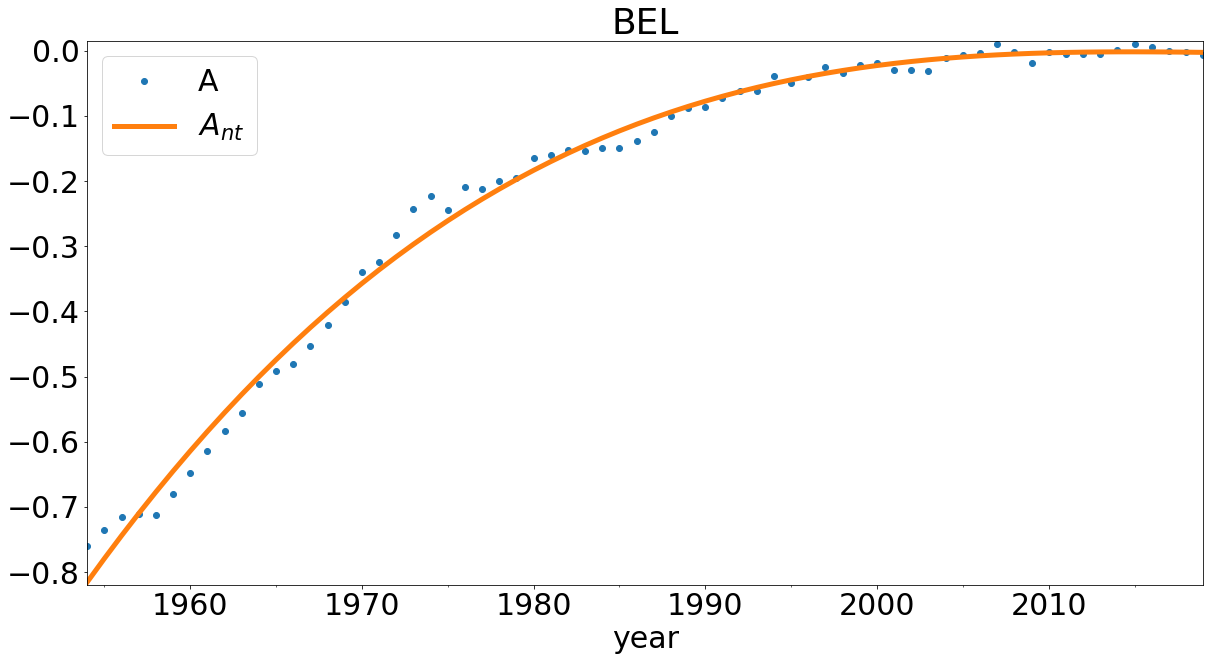

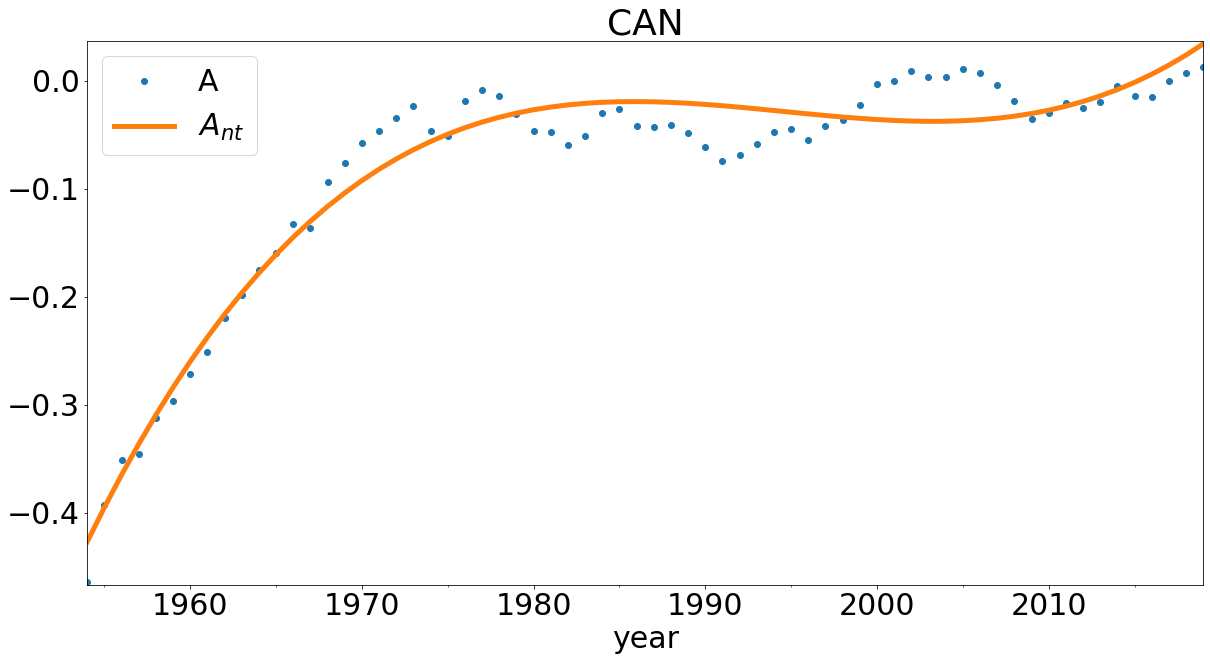

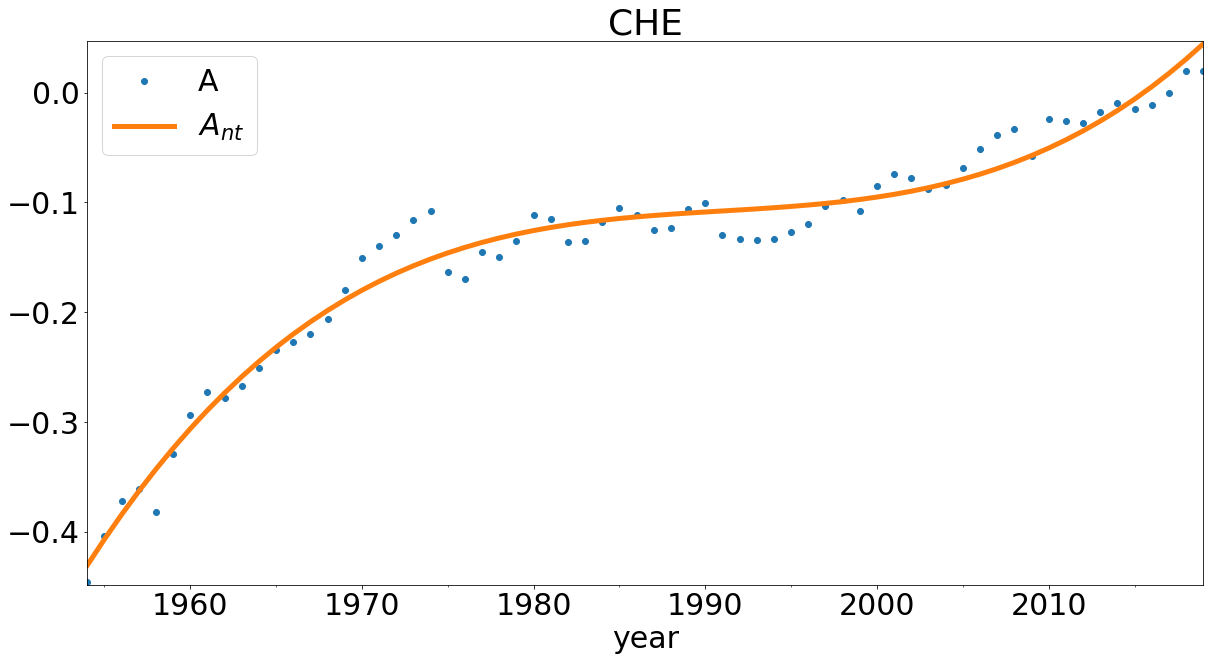

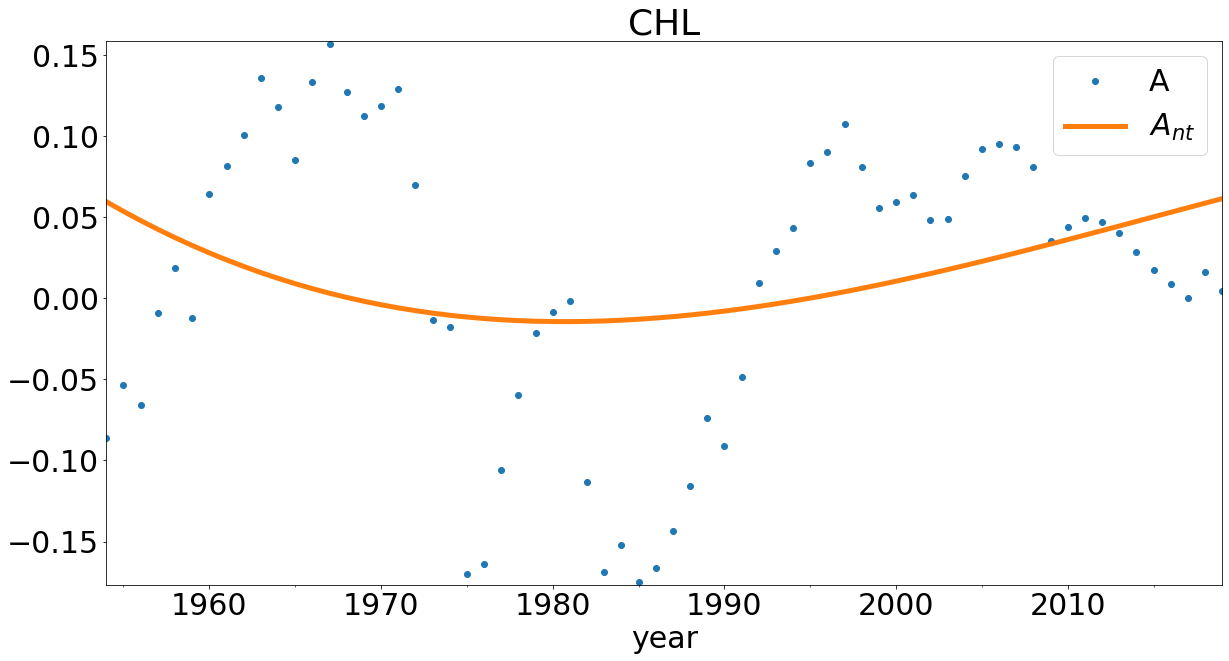

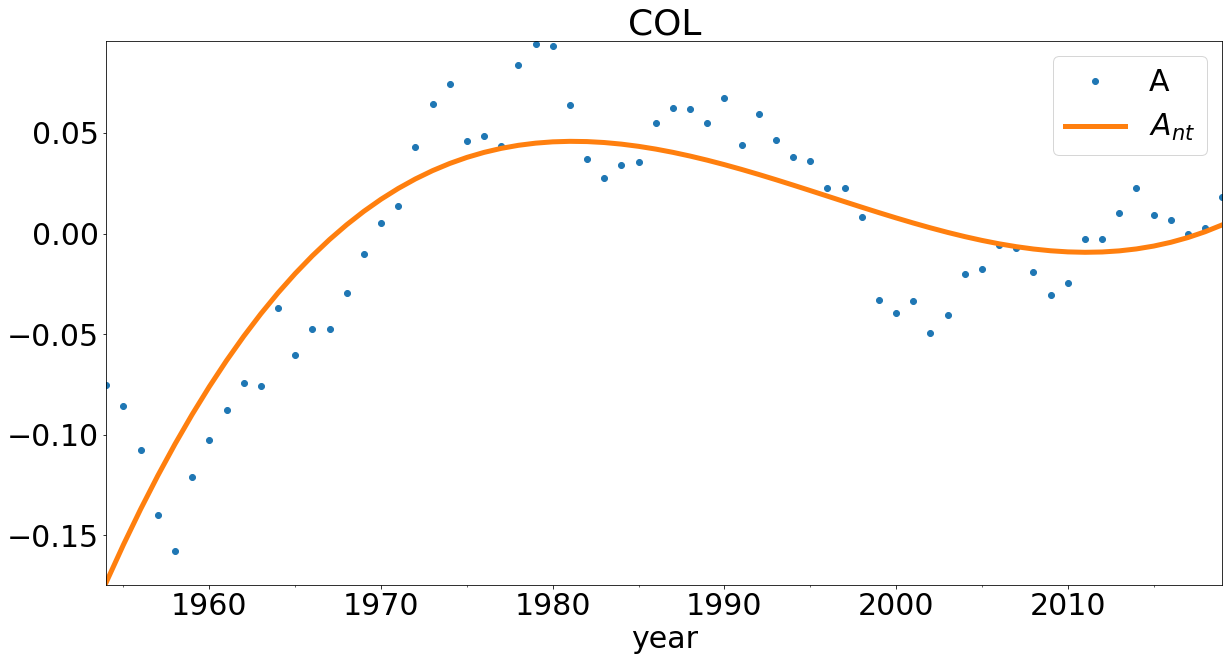

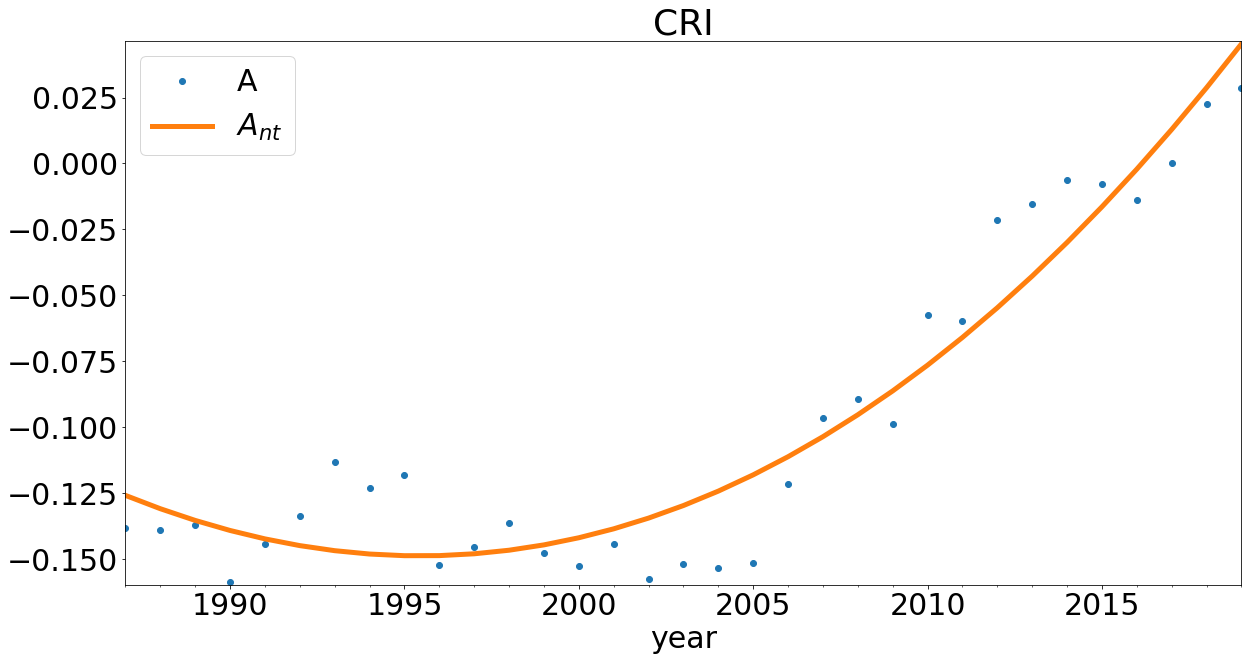

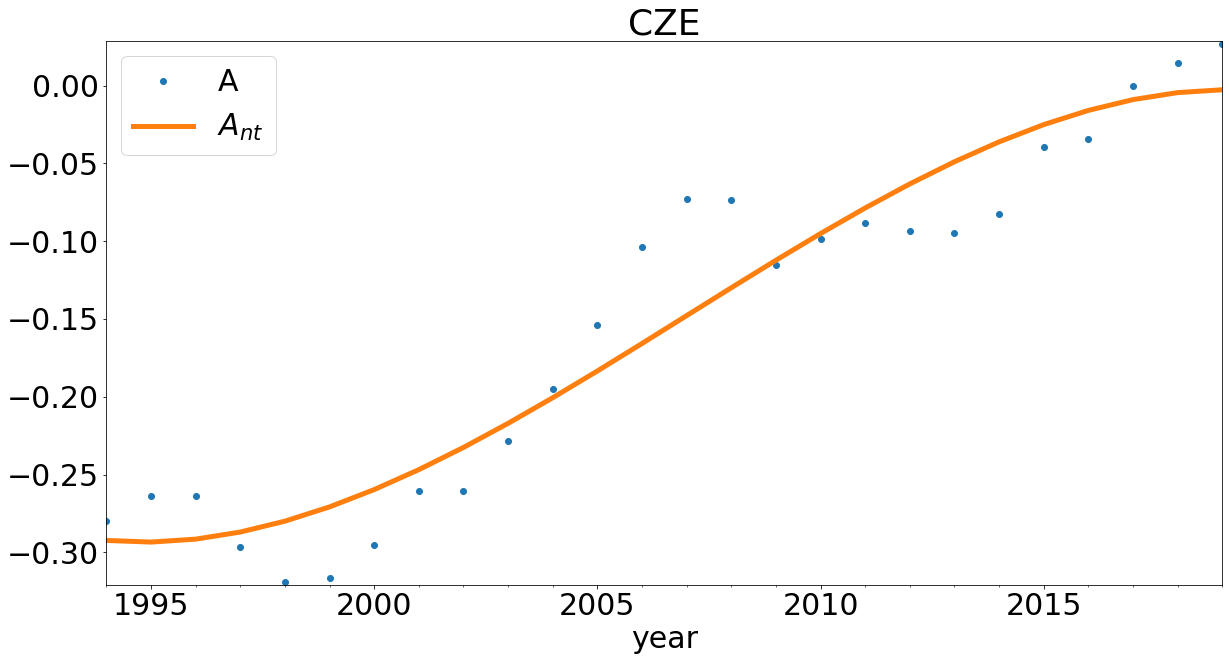

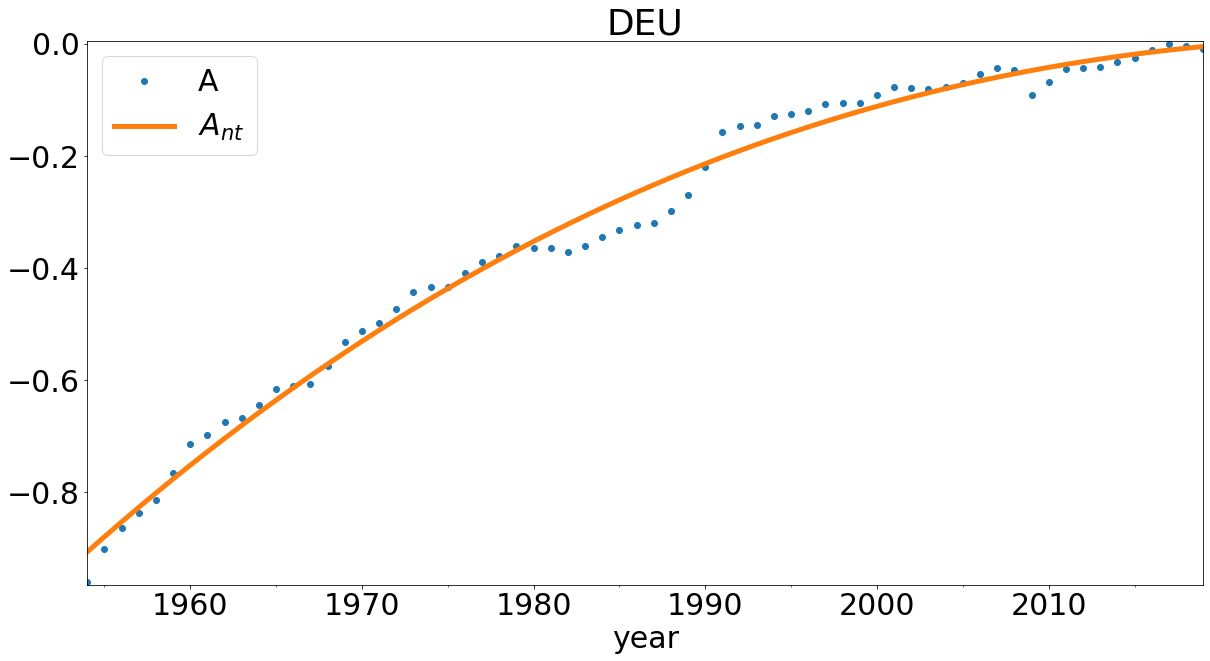

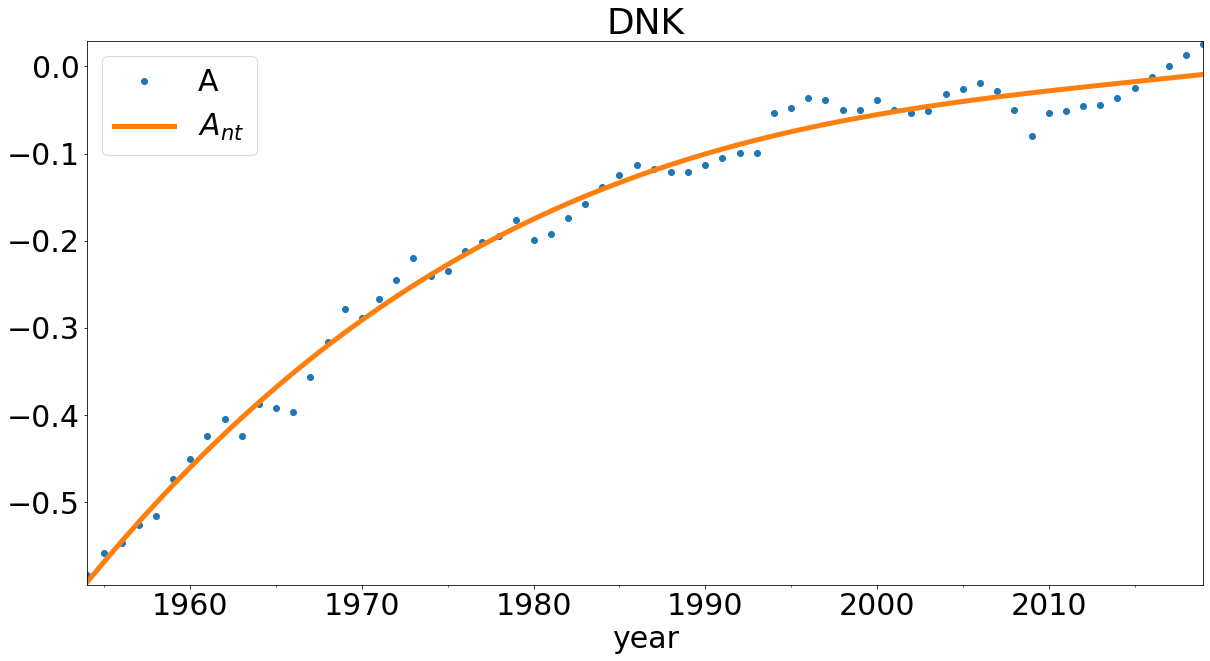

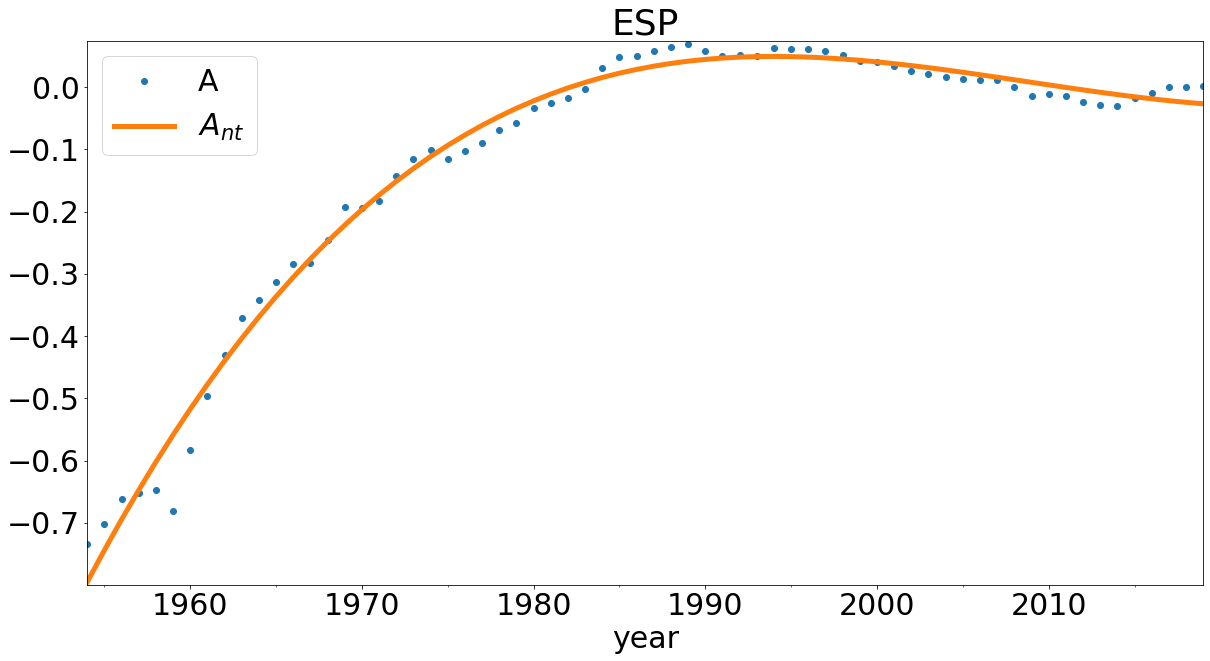

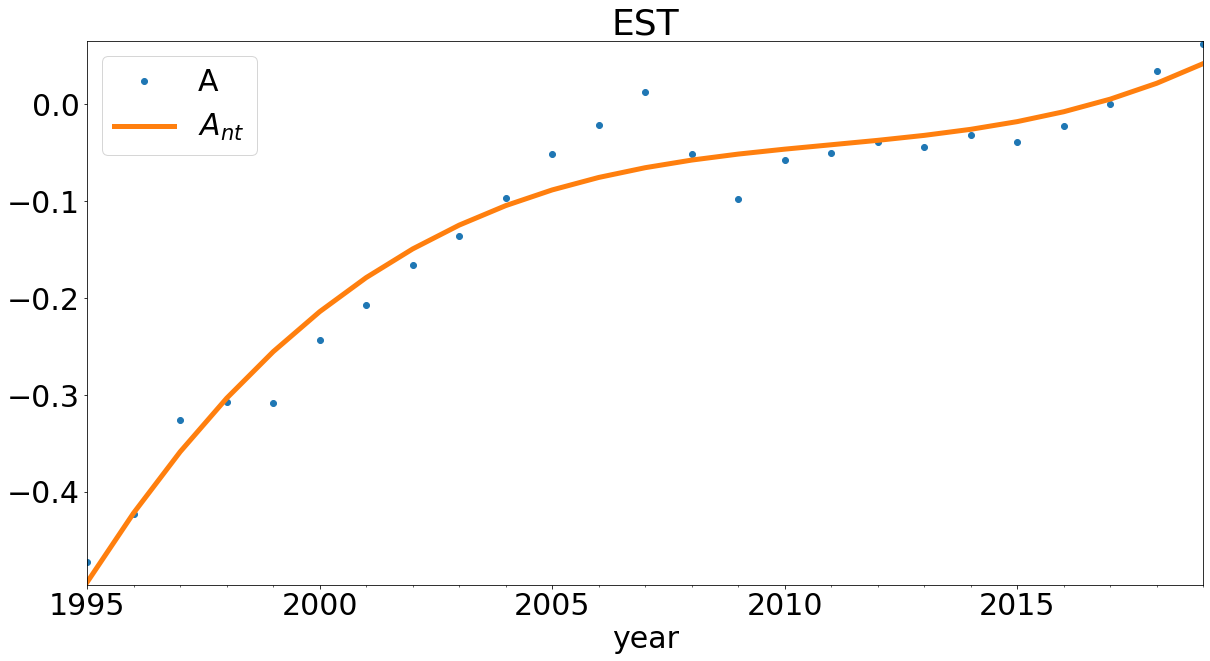

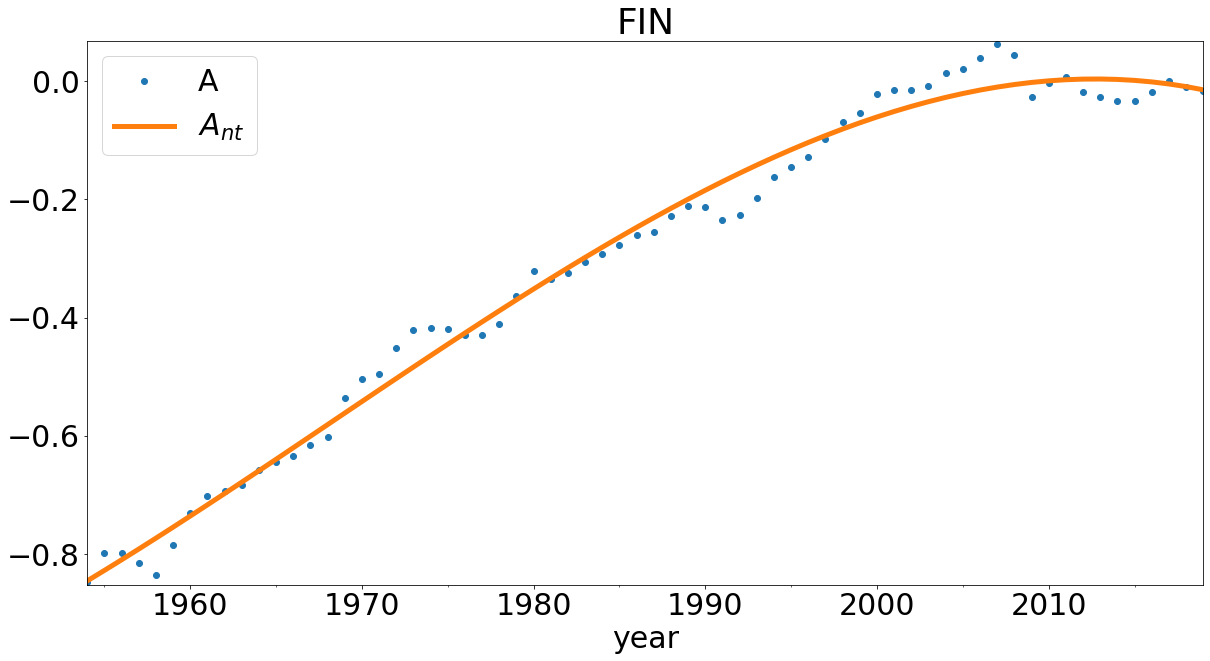

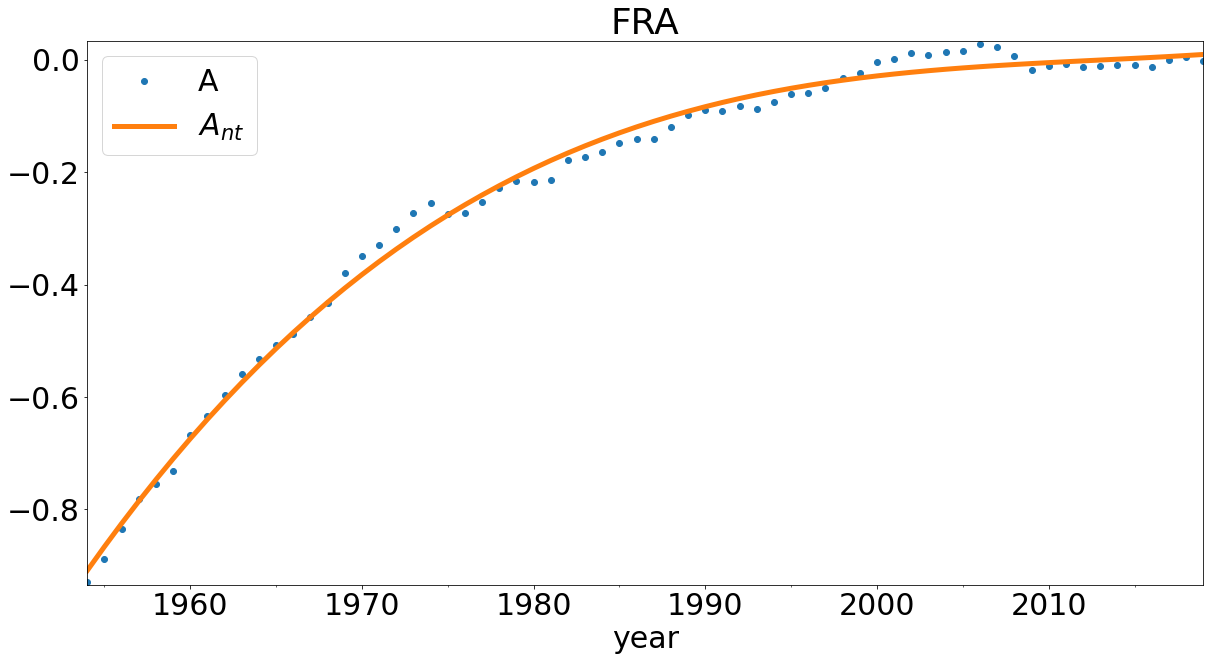

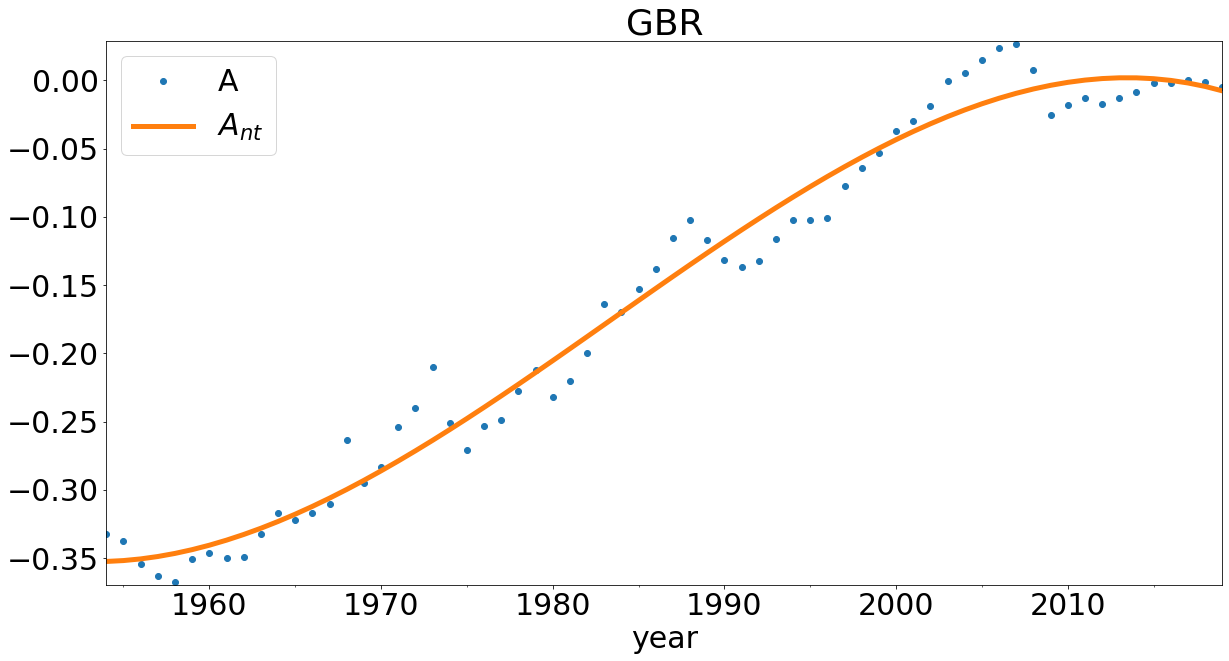

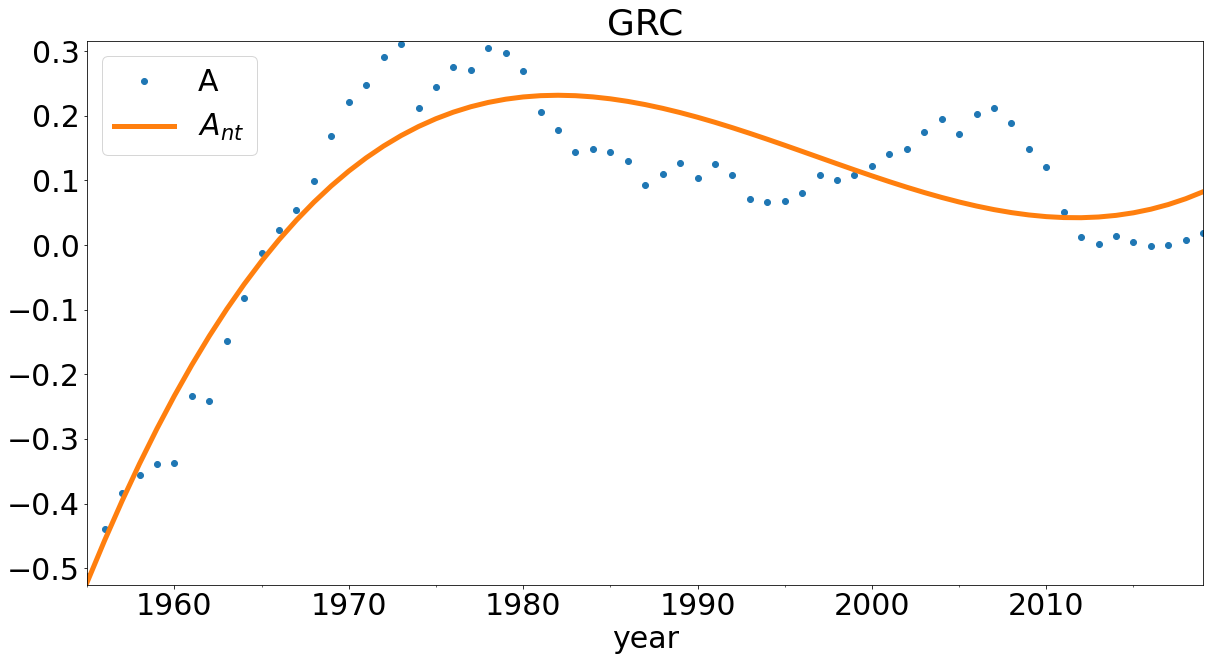

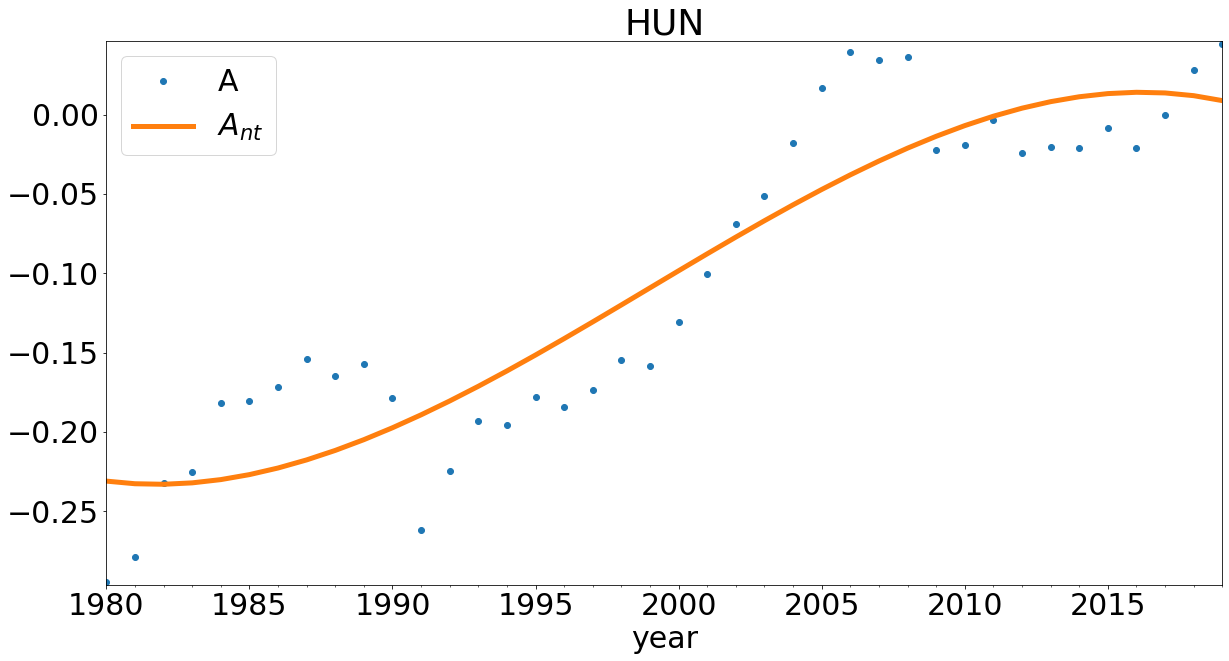

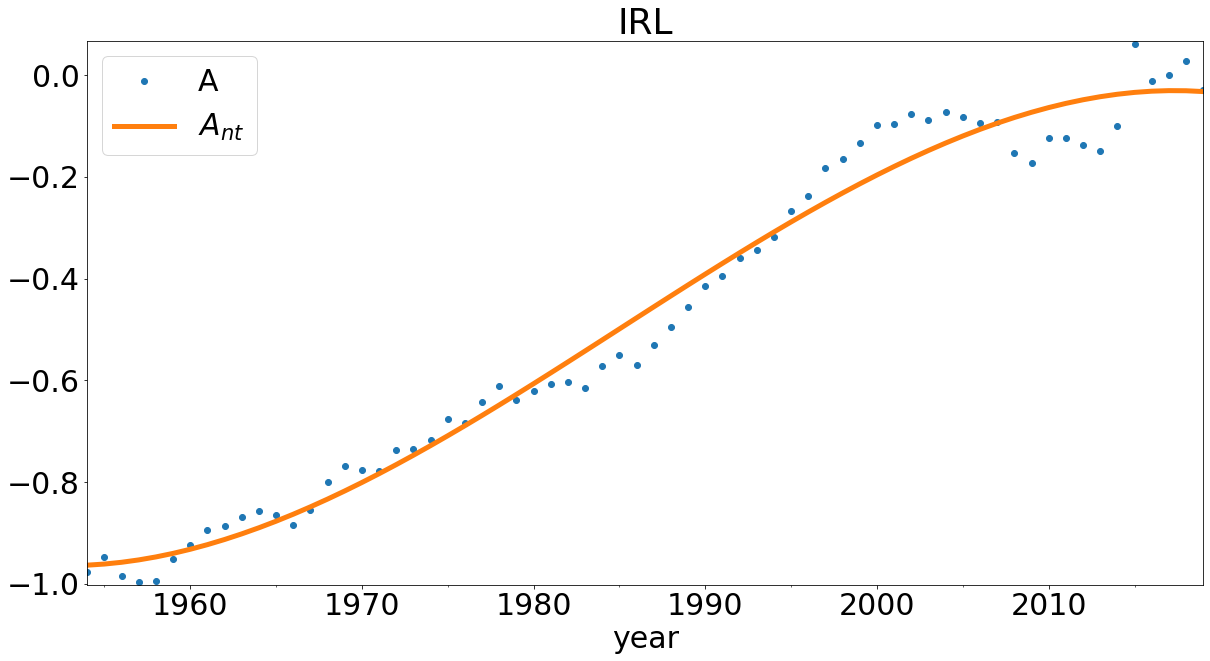

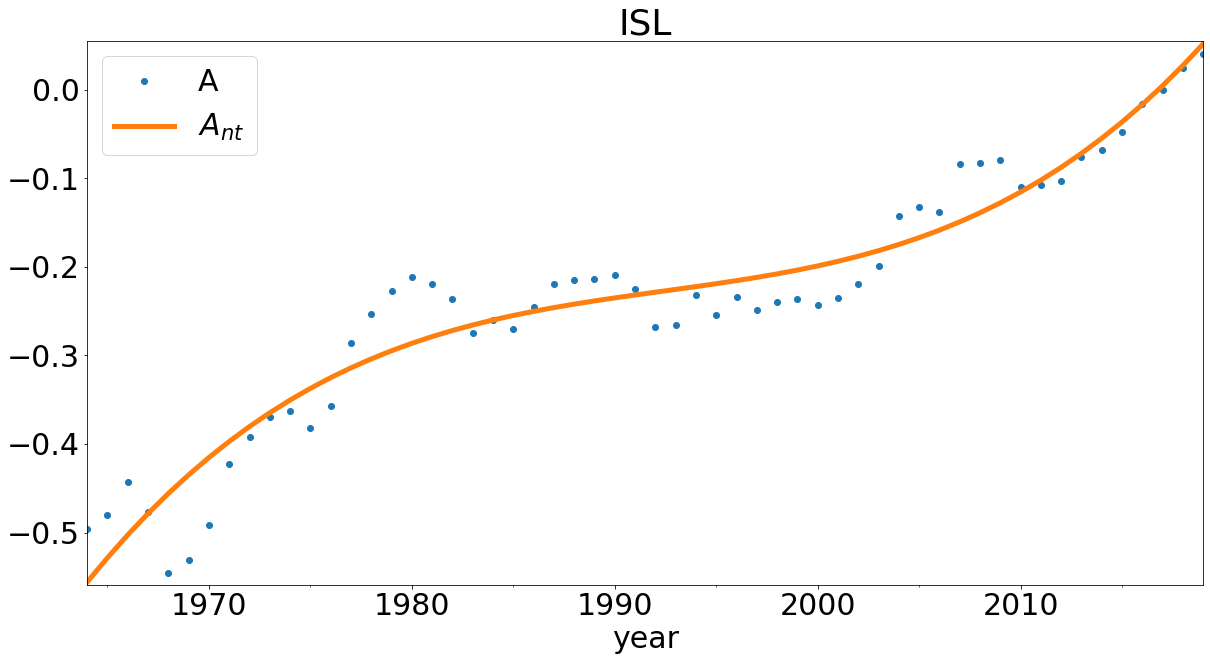

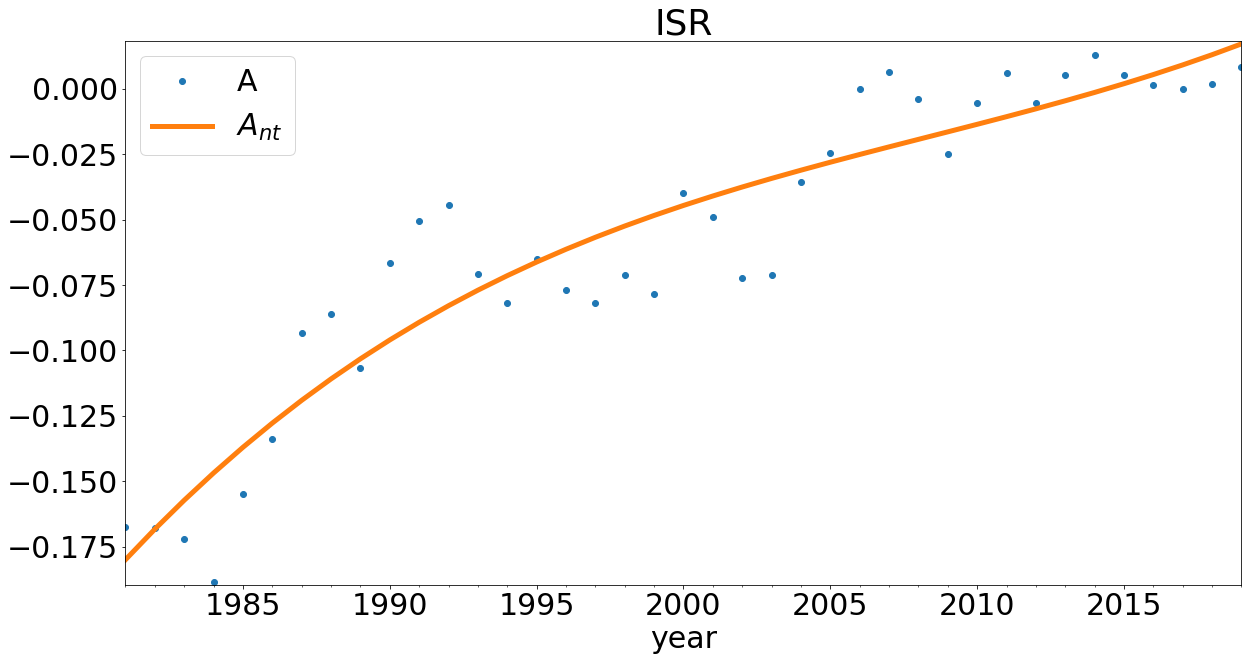

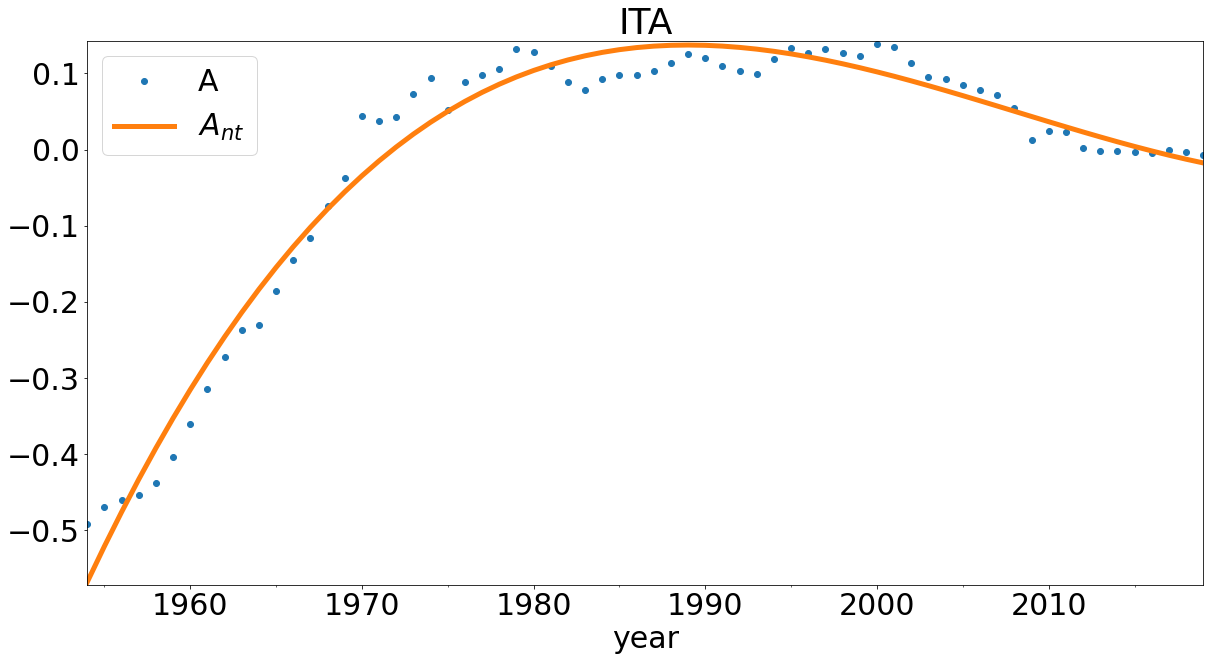

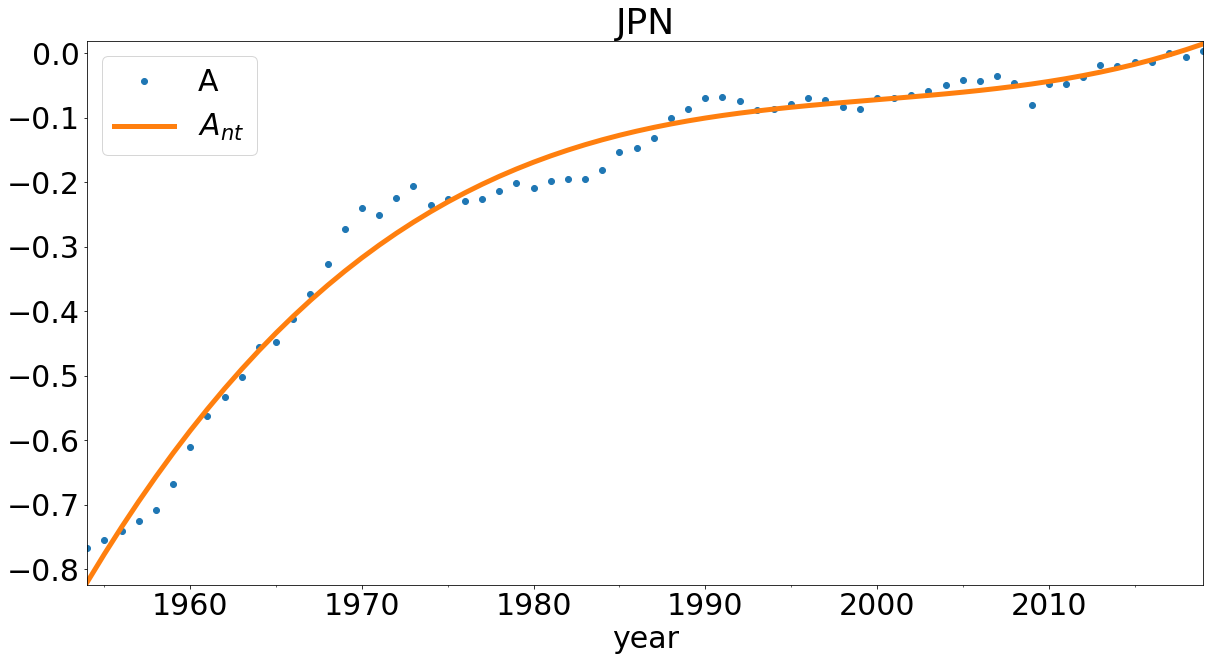

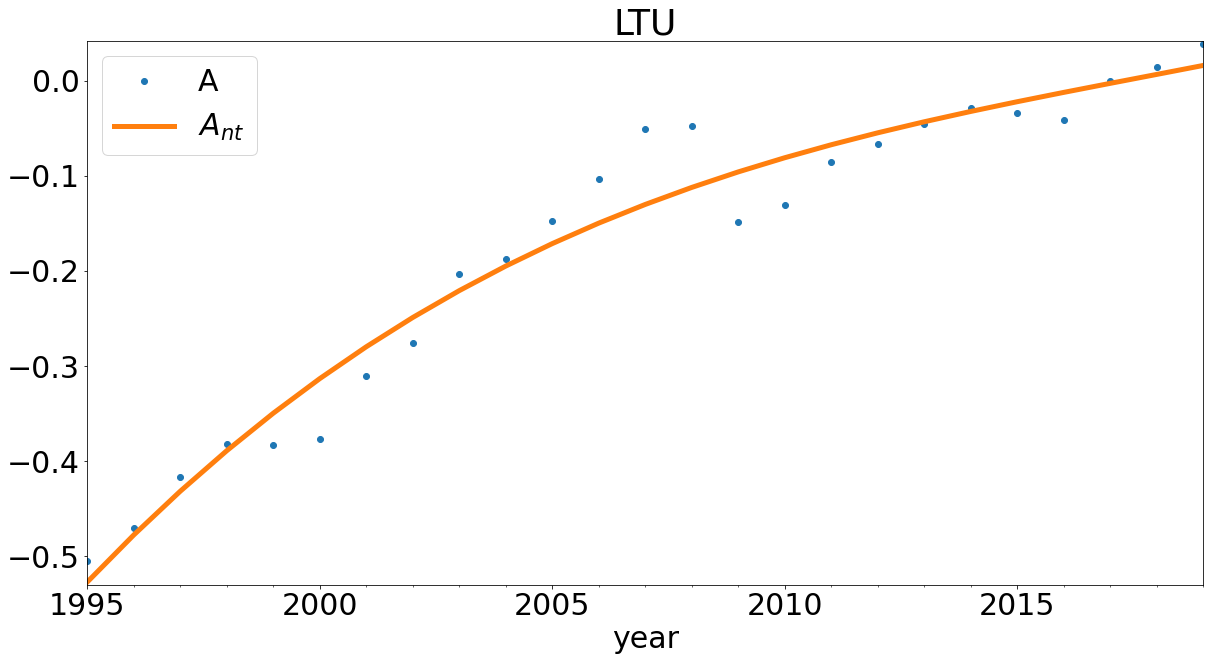

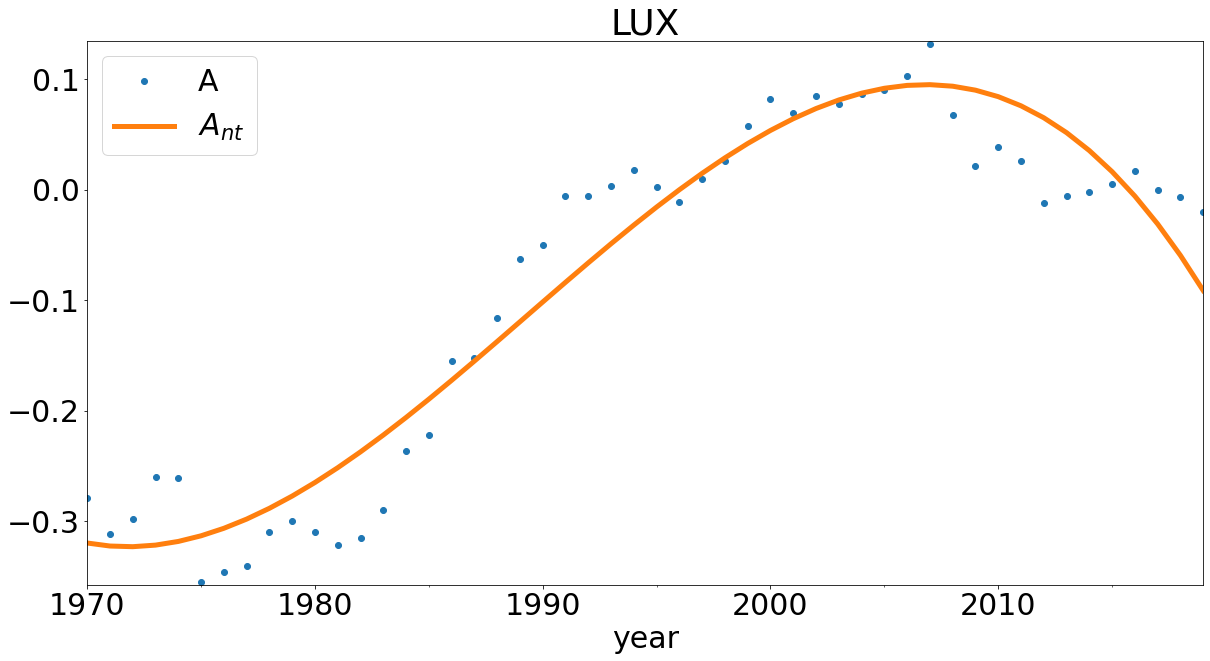

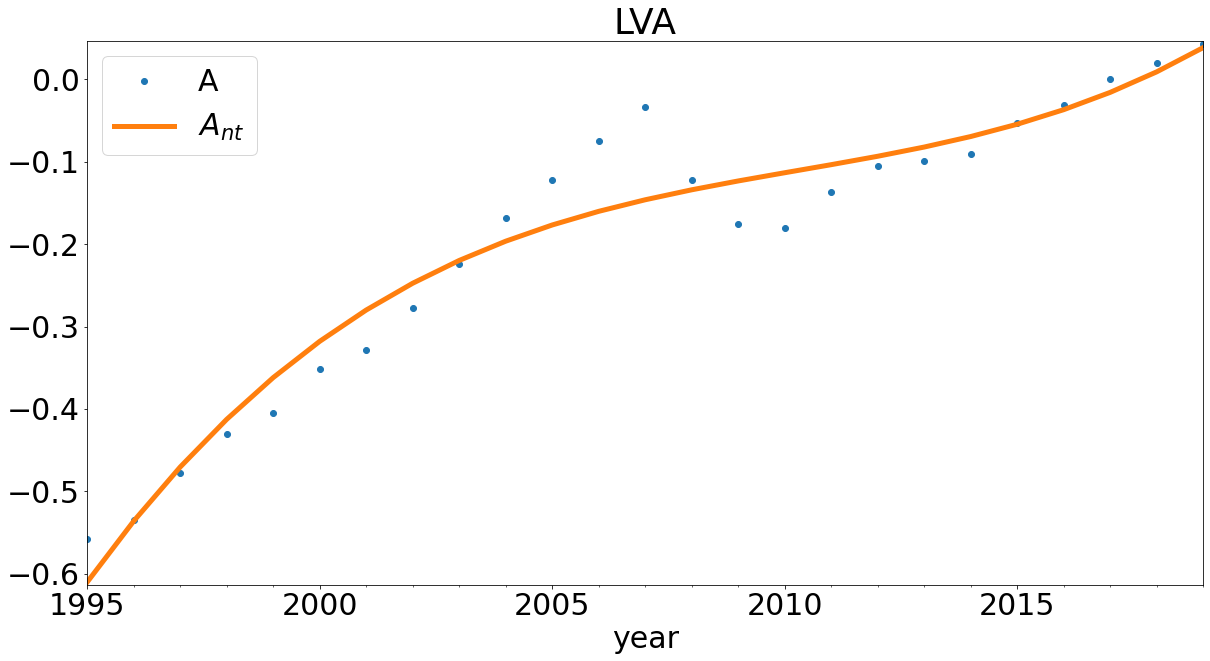

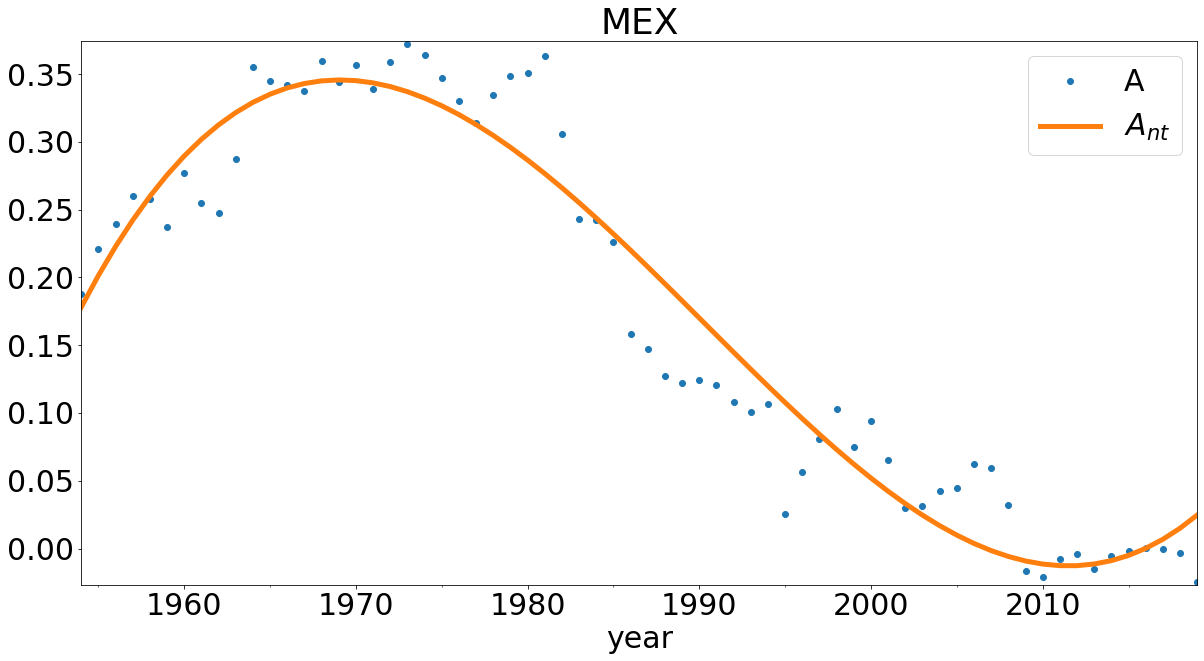

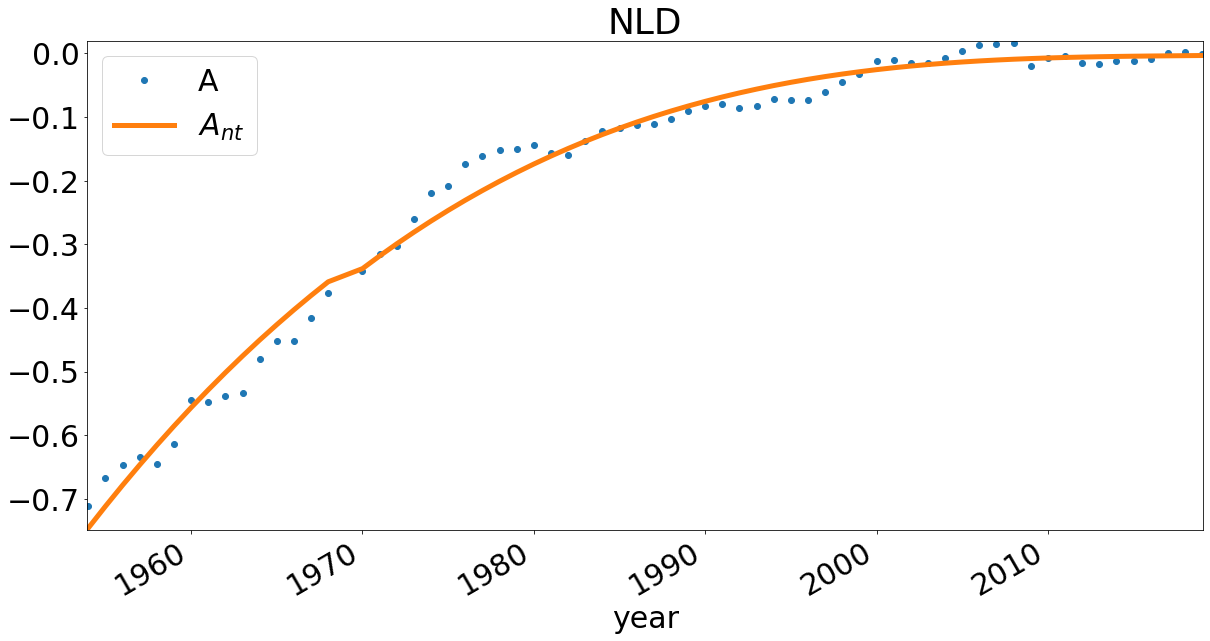

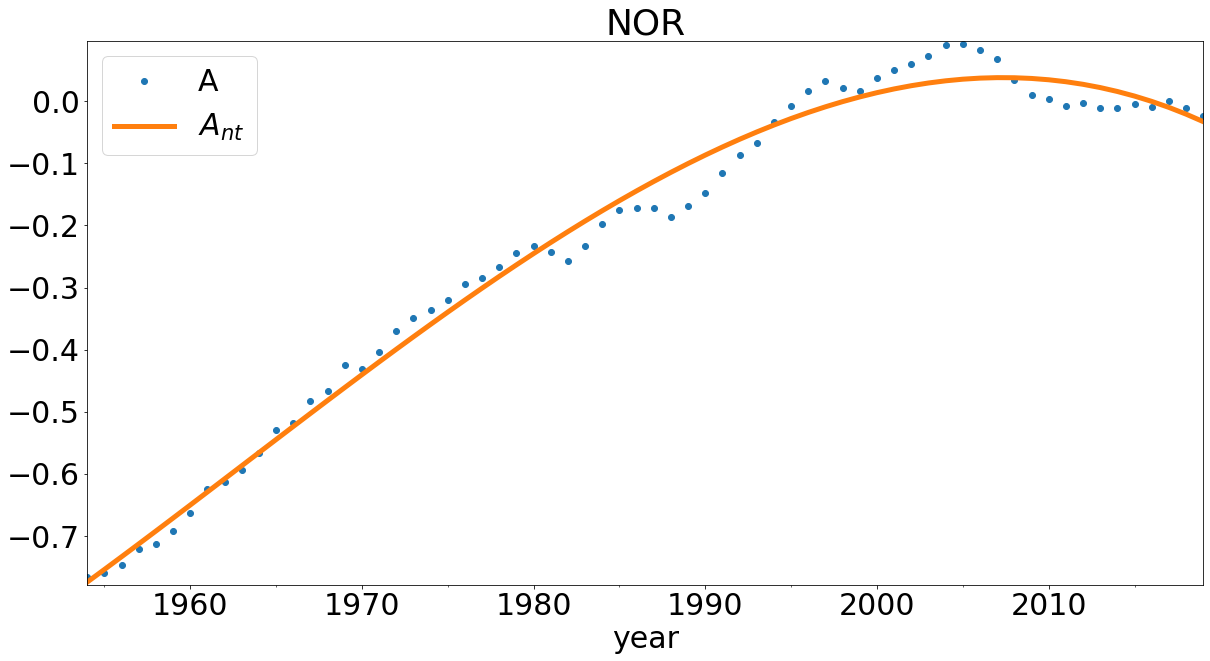

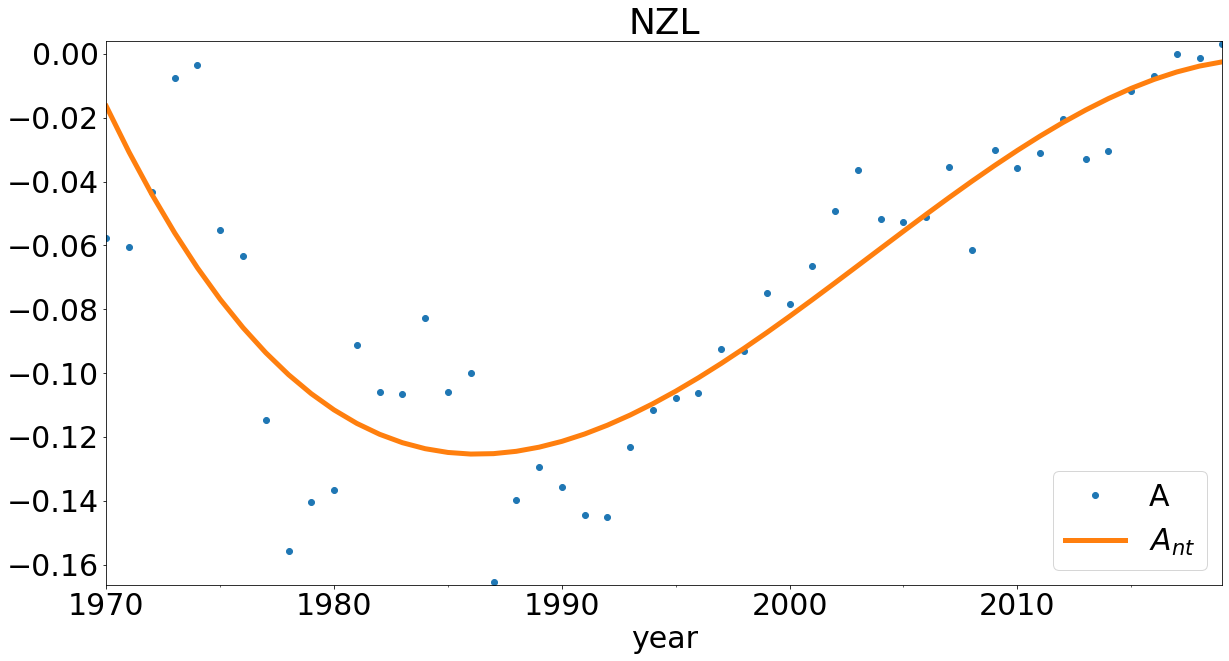

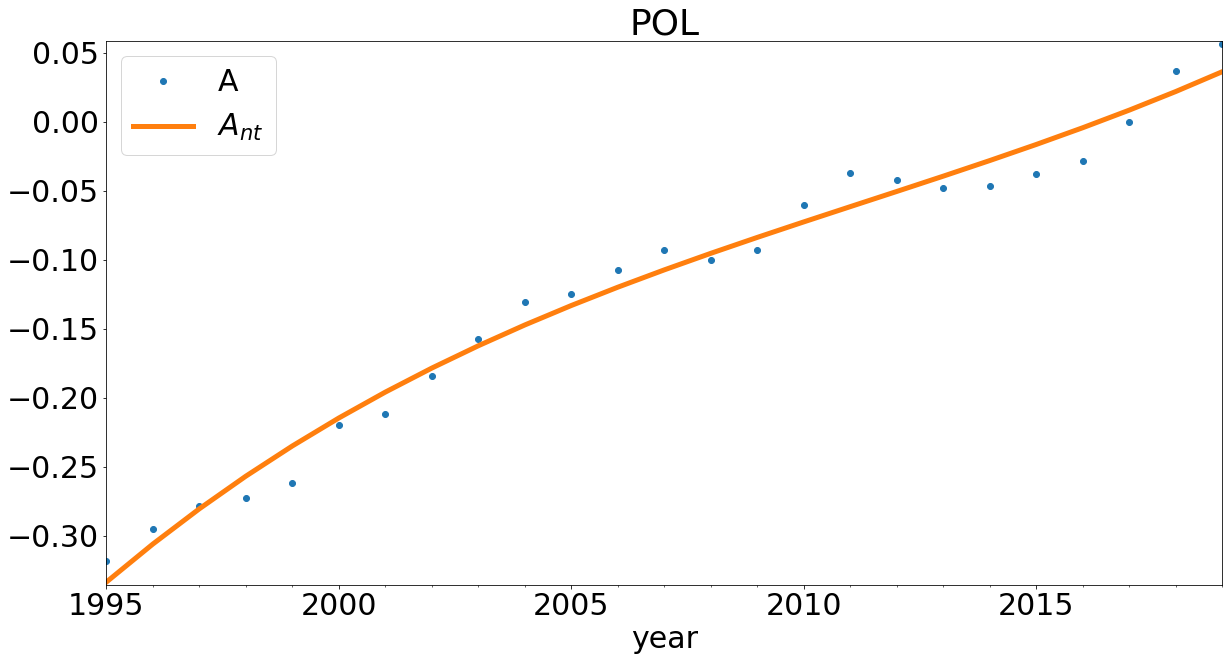

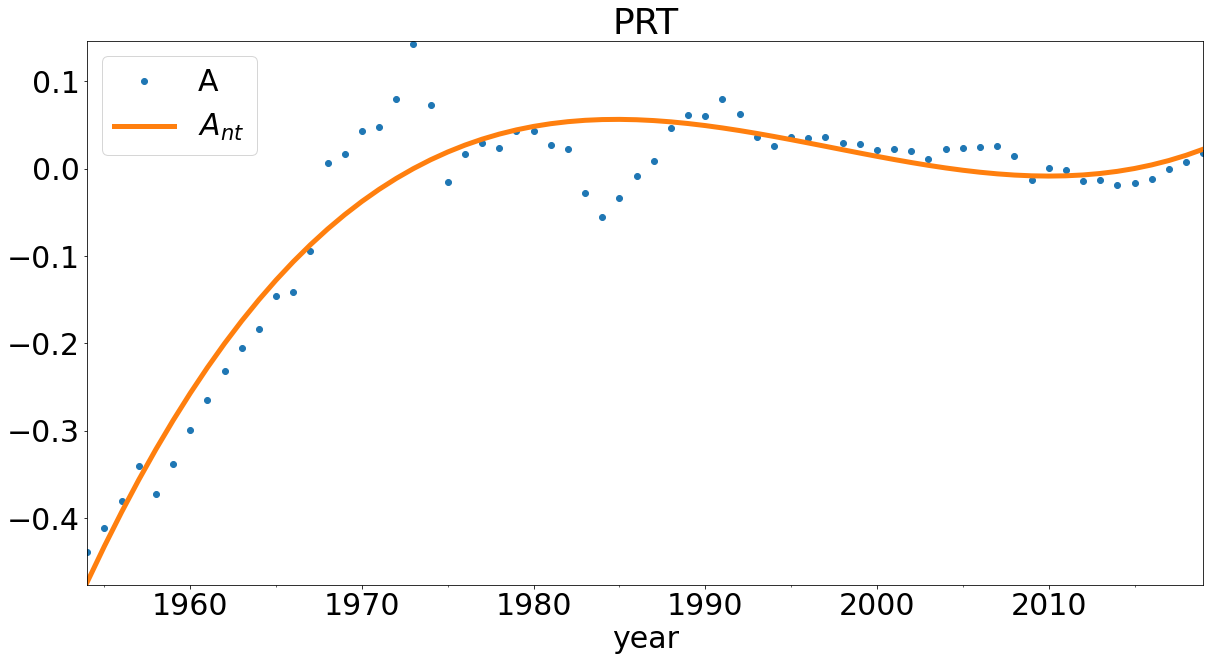

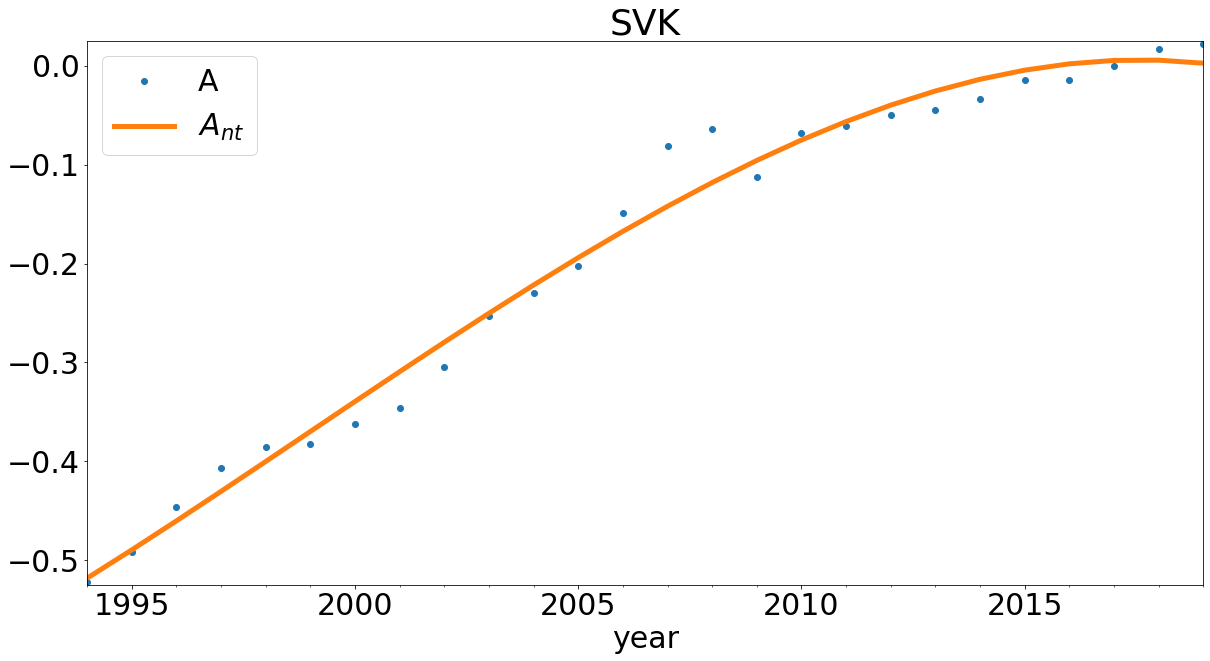

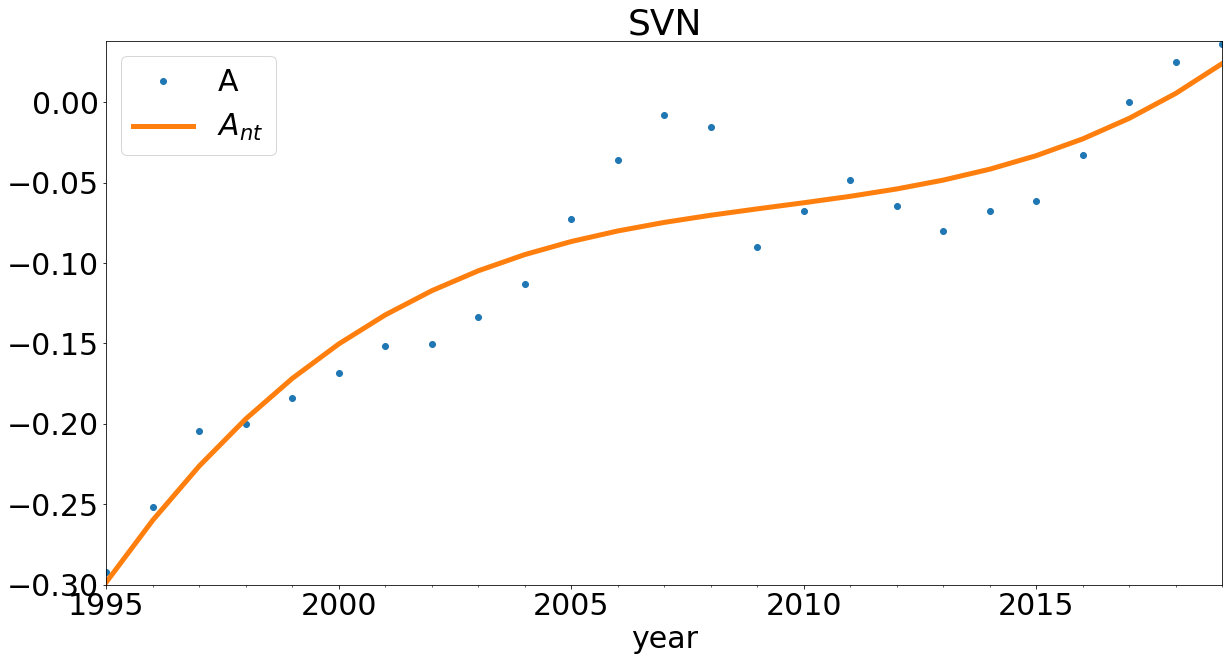

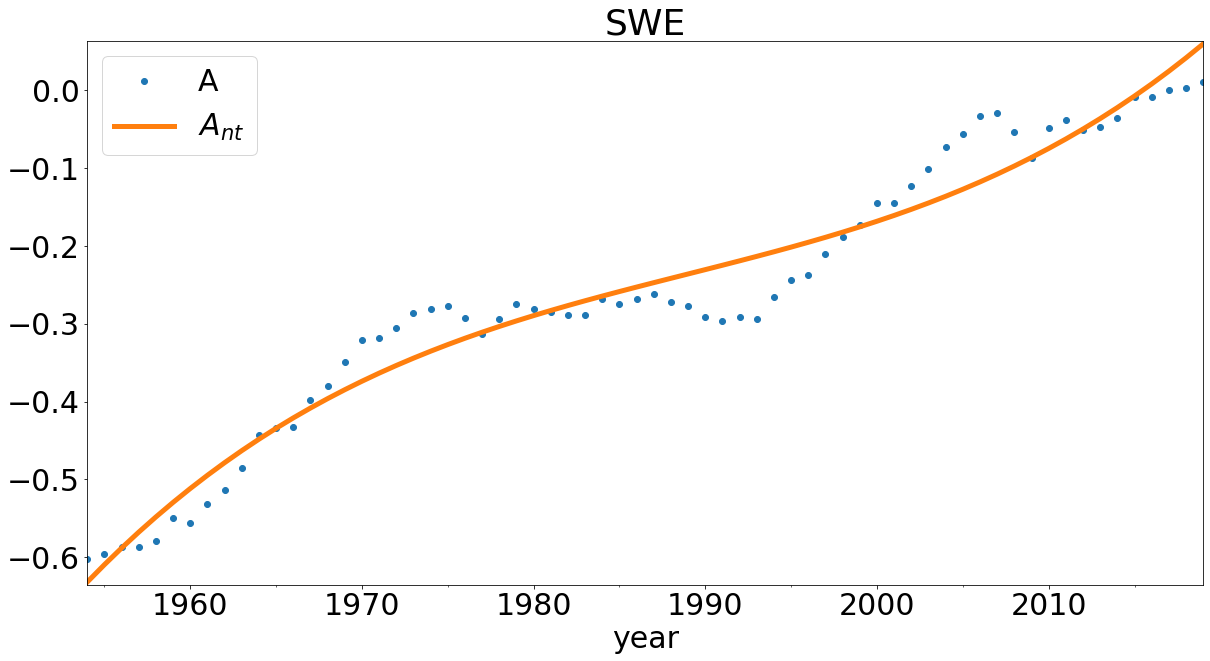

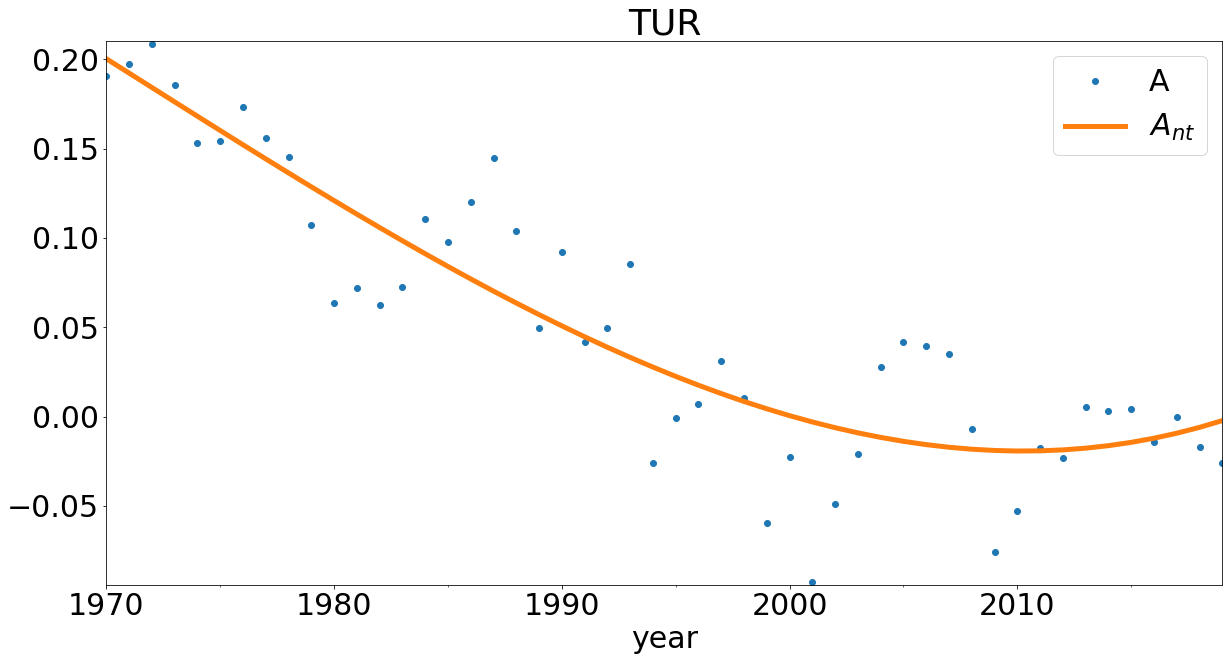

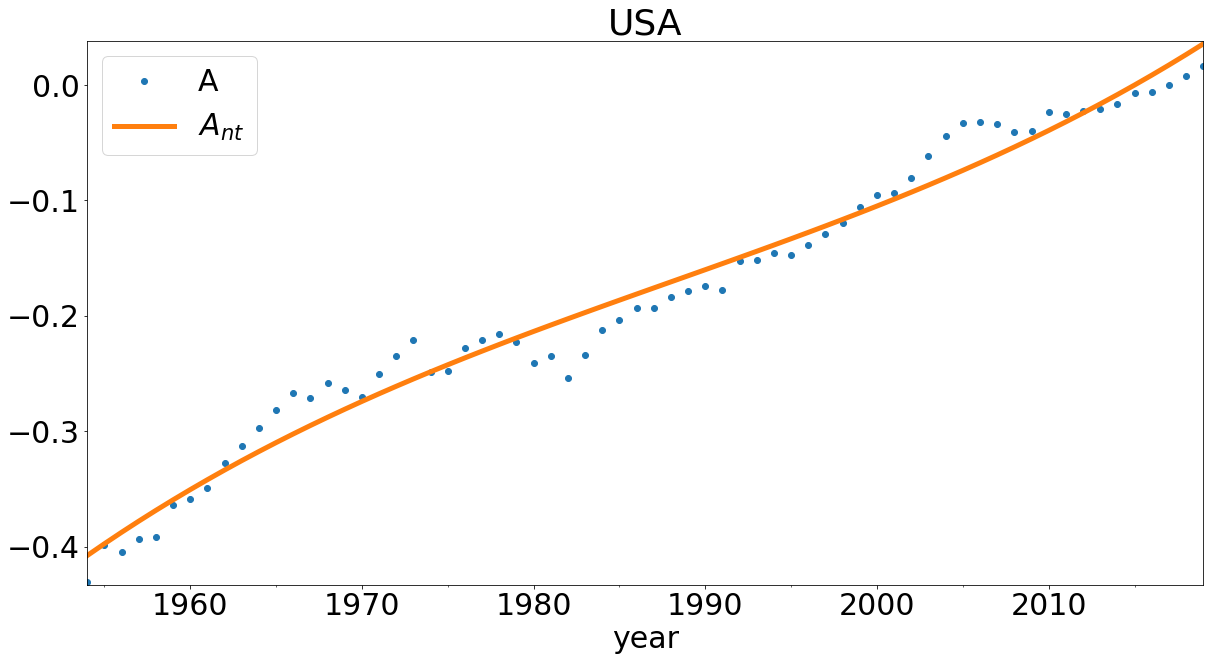

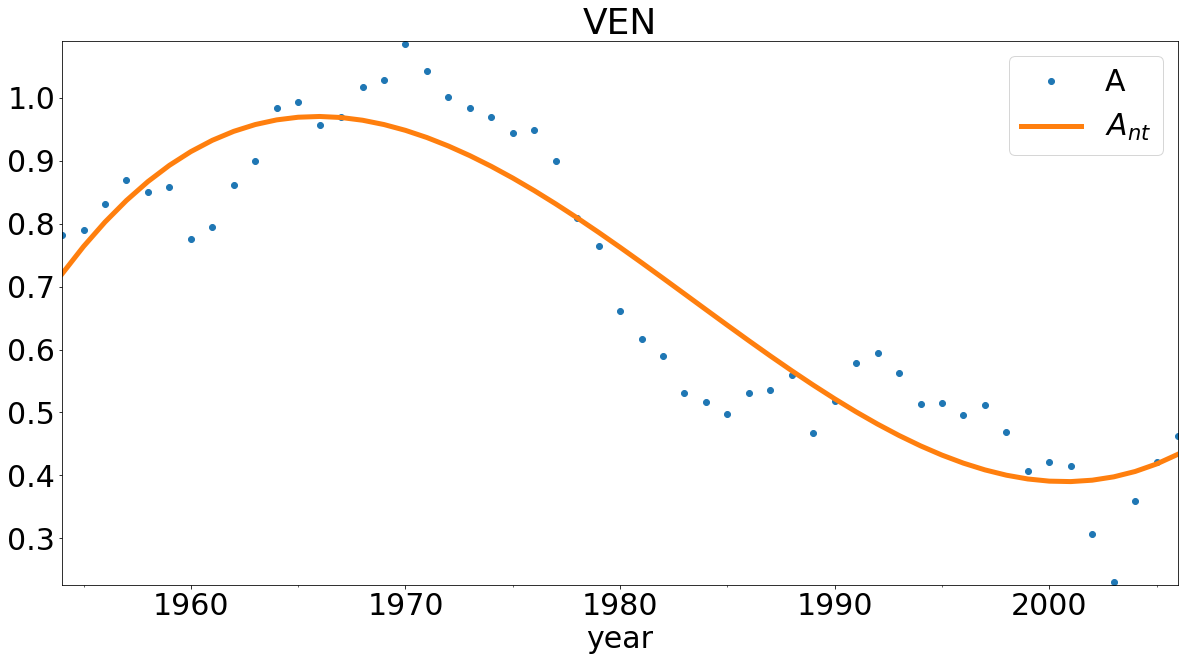

In [24]:
import statsmodels.api as sm
for real_var in ["y", "A"]:# if we had well formed unemployment variable, we
                                # could use this for loop to also use that variable
    for country in reg_countries:#ccode_dct.keys():
        X_vars = ["constant", "t"]
        reg_data = plot_data.loc[country, [real_var]]
        reg_data["t"] = np.arange(len(reg_data.index))
    # add polynomial terms
        for i in range(2,3 + 1):
            polynomial_time = "$t^" +str(i) + "$"        
            reg_data[polynomial_time] = np.arange(len(reg_data.index)) ** i
            X_vars.append(polynomial_time)

        reg_data["constant"] = 1
        reg_data.dropna(inplace=True)
        y = reg_data[real_var]
        X = reg_data[X_vars]
        reg = sm.OLS(y,X)
        results = reg.fit()
        # estimate long-run trend
        reg_data["$" + real_var + "_{nt}$"] = results.predict(reg_data[X_vars])
        # = results.fittedvalues
        fig, ax = plt.subplots(figsize = (20,10))
        reg_data[[real_var]].plot.line(ls = "", marker = "o", linewidth = 5, ax = ax)
        reg_data[["$" + real_var + "_{nt}$"]].plot.line(linewidth = 5, ax = ax)
        ax.set_title(country)
        
        # save long-run trend and cylical components in plot_data
        plot_data.loc[country,"$" + real_var + "_{nt}$"] = reg_data["$" + real_var + "_{nt}$"].values
        plot_data.loc[country,"$" + real_var + "_{ct}$"] = reg_data[real_var].sub(reg_data["$" + real_var + "_{nt}$"]).values


plot_data.dropna()

#### The vast majority of the data at the country level passes the Jarque-Bera which indicates skewness and kurtosis values consistent with a normal distribution. Notice, however, that the aggregate distributions reflect long left tails. 

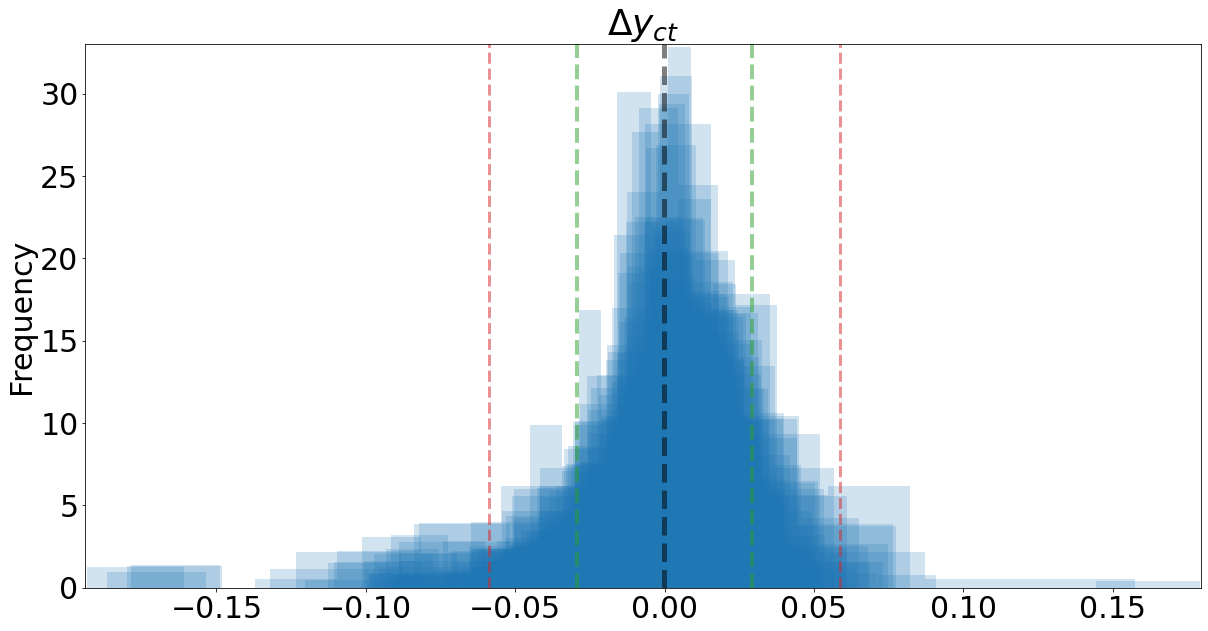

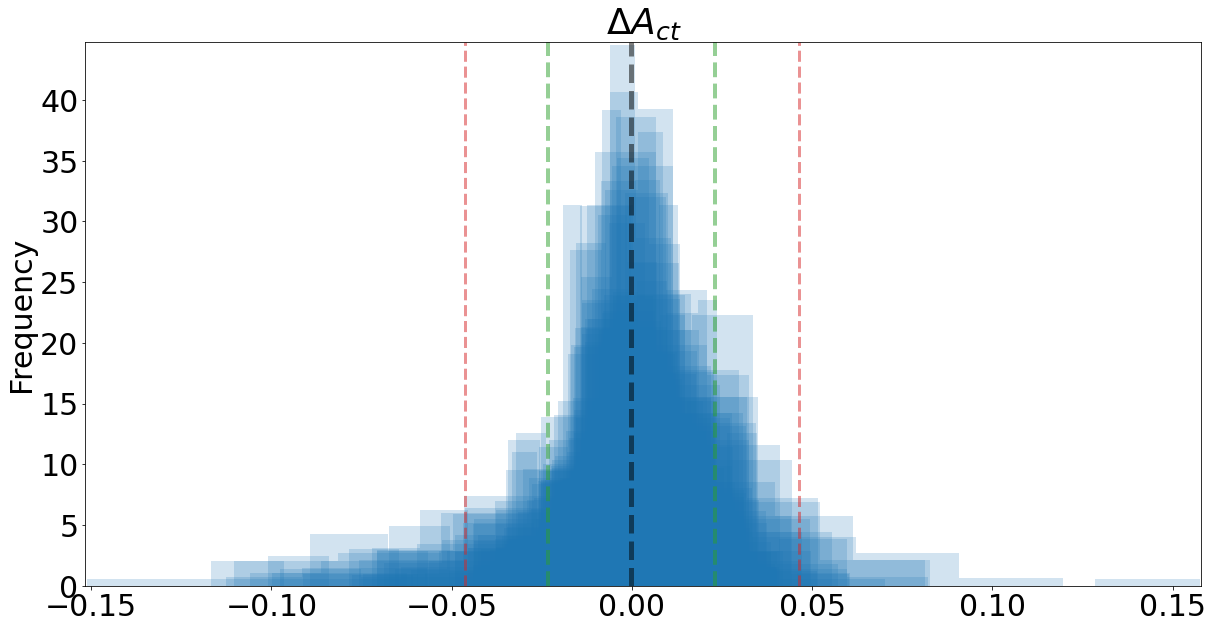

In [25]:
for var in ["y", "A"]:
    fig, ax = plt.subplots(figsize = (20,10))
    hist_df = plot_data["$" + var + "_{ct}$"].groupby("countrycode").diff()
    hist_df.groupby("countrycode").plot.hist(density = True, ax = ax, bins = 8, alpha = .2, color = "C0")
    ax.axvline(hist_df.mean(), ls = "--", linewidth = 5, color = "k", alpha = .5)
    for i in range(1,3):
        ax.axvline(hist_df.std() * (-1) * i, ls = "--", linewidth = 5 - i, color = "C" + str(i + 1), alpha  = .5)
        ax.axvline(hist_df.std() * (1) * i, ls = "--", linewidth = 5 - i, color = "C" + str(i + 1), alpha  = .5)
    
    ax.set_title("$\\Delta " + var + "_{ct}$")

False    97.435897
True      2.564103
Name: $p$, dtype: float64
False    84.615385
True     15.384615
Name: $p$, dtype: float64


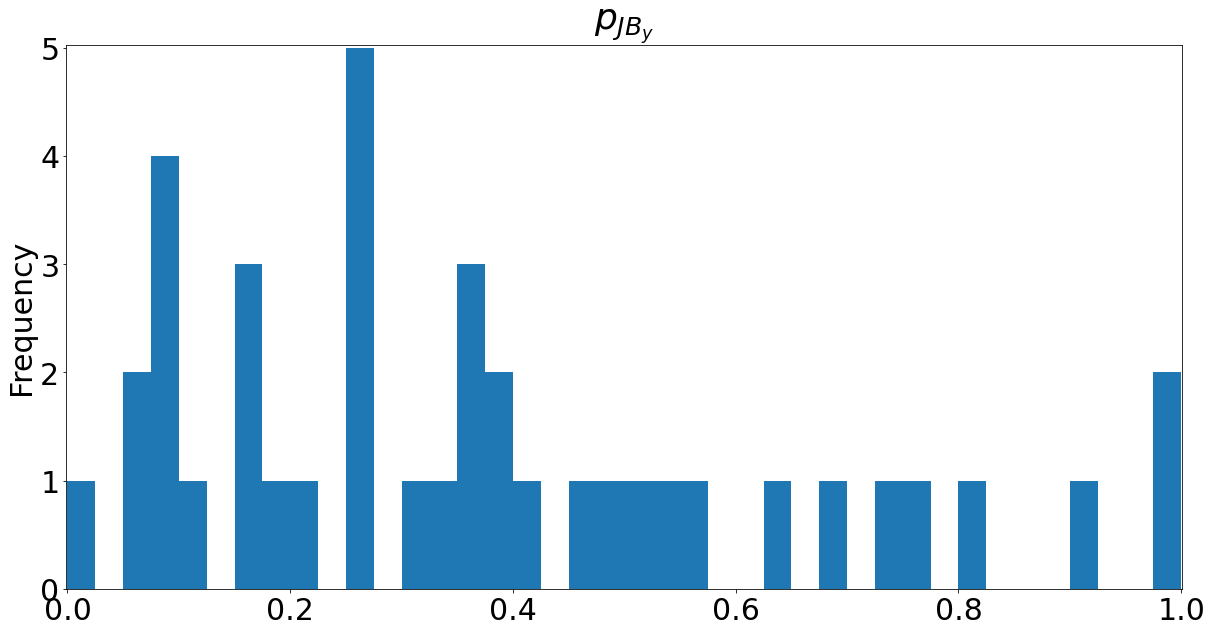

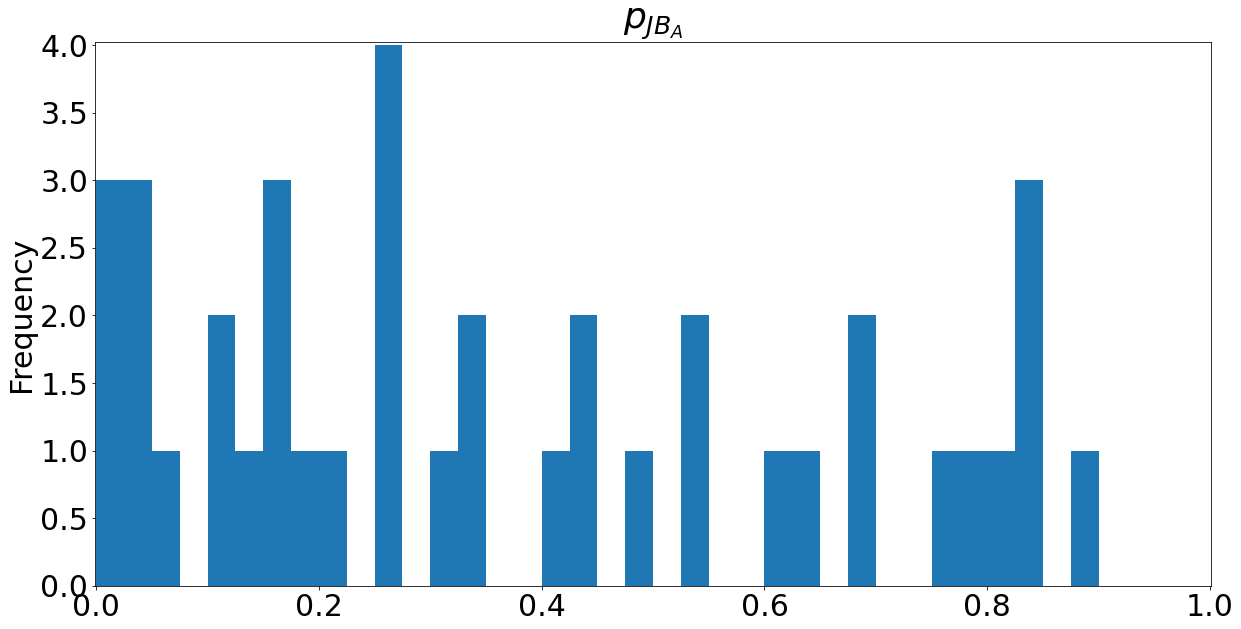

In [26]:
from statsmodels.stats.stattools import jarque_bera
jb_dct = {}
for var in ["y", "A"]:
    jb_dct[var] = {}
    for country in reg_countries:
        jb_dct[var][country] = {}
        jb_test = jarque_bera(plot_data.loc[country, "$" + var + "_{ct}$"].dropna())
        jb_dct[var][country]["JB Stat"], jb_dct[var][country]["$p$"] = jb_test[0], jb_test[1]

    jb_tests = pd.DataFrame(jb_dct[var]).T
    fig, ax = plt.subplots(figsize = (20,10))
    jb_tests["$p$"].plot.hist(bins = [i * .025 for i in range(41)], ax= ax)
    ax.set_title("$p_{{JB}_" + var + "}$")
    print((jb_tests["$p$"] < .05).value_counts(normalize = True).mul(100))

$$y_t = \alpha + g_t +\beta y_{t-1}$$

In [27]:
y_var = ["$\\frac{y}{pop}$"]
X_vars = [y_var[0] + " Lag"]
reg_data = plot_data
reg_data[X_vars[0]] = reg_data[y_var[0]].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_var]
X = reg_data[X_vars]
X["t"] = np.arange(len(X.index))

X["constant"] = 1
reg = sm.OLS(y,X)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        $\frac{y}{pop}$   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.949e+05
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:34:35   Log-Likelihood:                 4227.2
No. Observations:                2091   AIC:                            -8448.
Df Residuals:                    2088   BIC:                            -8432.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
$\frac{y}{pop}$ Lag     0.9964      0.001   1166.157      0.000       0.995       0.998
t                    1.132e-06   1.17e-06      0.964      0.335   -1.17e-06    3.44e-06
constant                0.0578      0.009      6.559      0.000       0.041       0.075
==============================================================================
Omnibus:                      390.809   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2044.373
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                       7.585   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y_var = ["$\\frac{y}{pop}$"]
X_vars = [y_var[0] + " Lag"]
reg_data = plot_data.groupby("countrycode").diff()
reg_data[X_vars[0]] = reg_data[y_var[0]].groupby("countrycode").shift()
reg_data.dropna(inplace = True)
y = reg_data[y_var]
X = reg_data[X_vars]
X["constant"] = 1
reg = sm.OLS(y,X)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        $\frac{y}{pop}$   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     328.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.70e-68
Time:                        14:34:35   Log-Likelihood:                 4215.3
No. Observations:                2013   AIC:                            -8427.
Df Residuals:                    2011   BIC:                            -8415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
$\frac{y}{pop}$ Lag     0.3717      0.021     18.114      0.000       0.331       0.412
constant                0.0141      0.001     17.266      0.000       0.013       0.016
==============================================================================
Omnibus:                      356.011   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2338.106
Skew:                          -0.662   Prob(JB):                         0.00
Kurtosis:                       8.111   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could perform a similar exercise using cyclical Real GDP. If on average, the cyclical component of real GDP is zero, then we can simply regress the cyclical component of real GDP on a lag of itself. The result shows that 70\% of variance can be explained by the lag, which is about as a good a result as we can hope for. And consistent the assertion of Lucas 1971, this cyclcal component shows peristence with modest dissipation each period.

We generate a similar results for total factor productivity. The regression explain  67\% of the variance of $A_{c_t}$.

$$y_{c_{t}} = \rho y_{c_{t-1}} + \epsilon_t$$
$$A_{c_{t}} = \rho A_{c_{t-1}} + \epsilon_t$$

                                 OLS Regression Results                                
Dep. Variable:               $y_{ct}$   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              3195.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                   4.38e-317
Time:                        11:26:38   Log-Likelihood:                          2275.1
No. Observations:                1025   AIC:                                     -4548.
Df Residuals:                    1024   BIC:                                     -4543.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

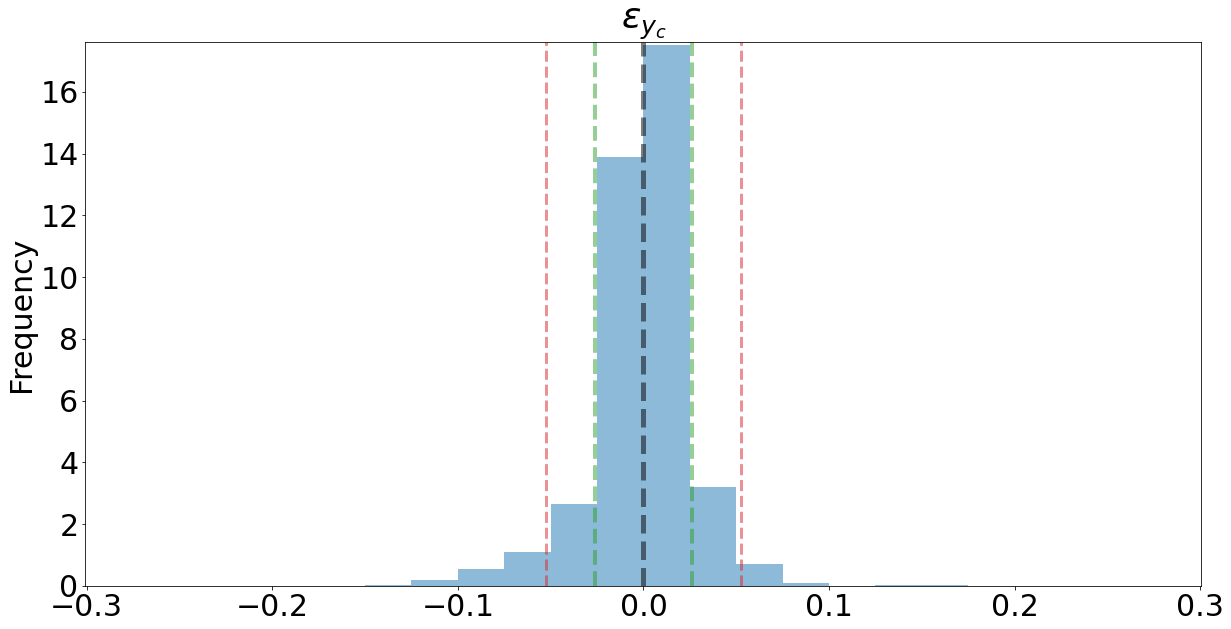

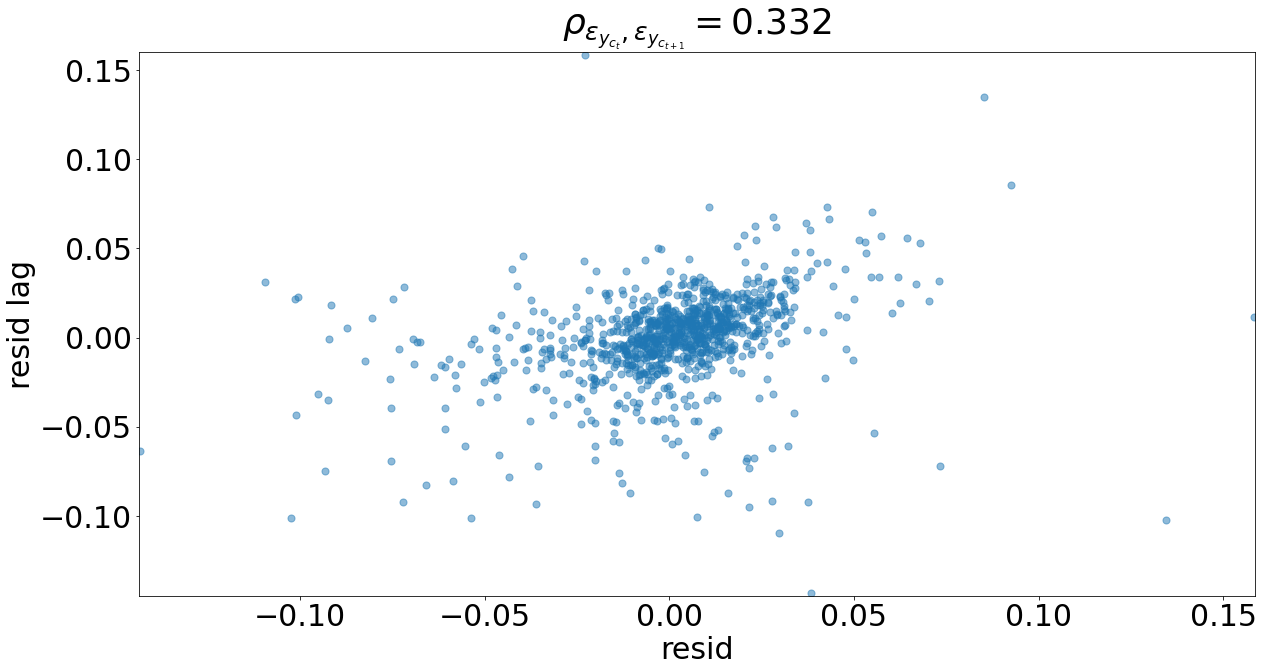

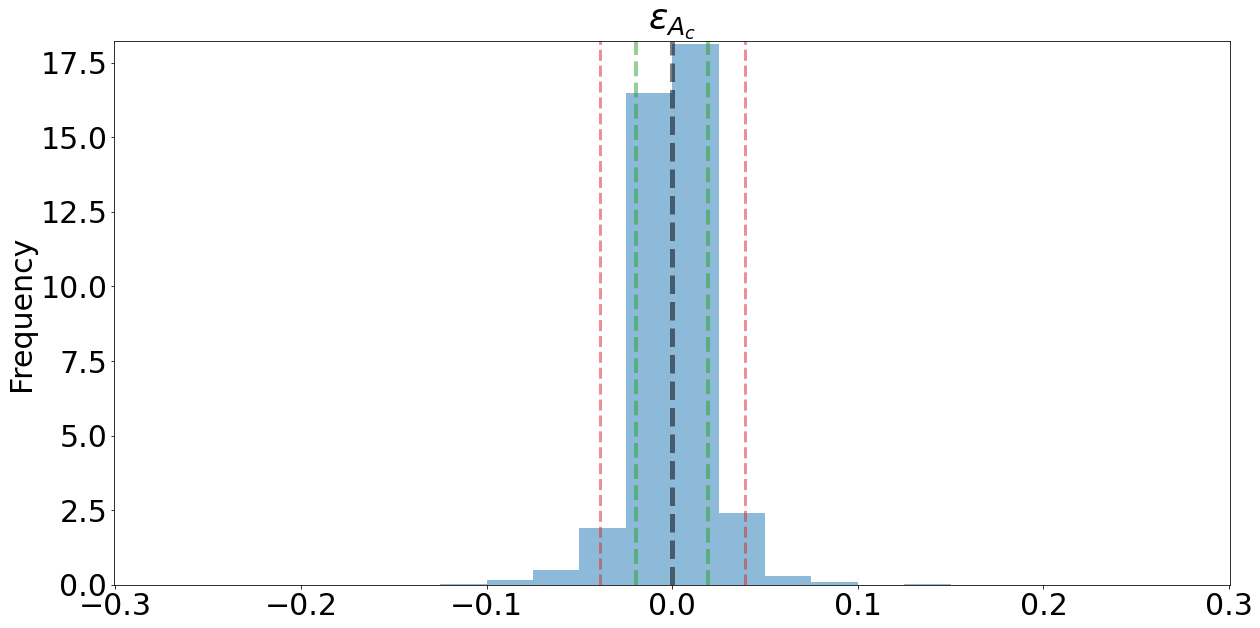

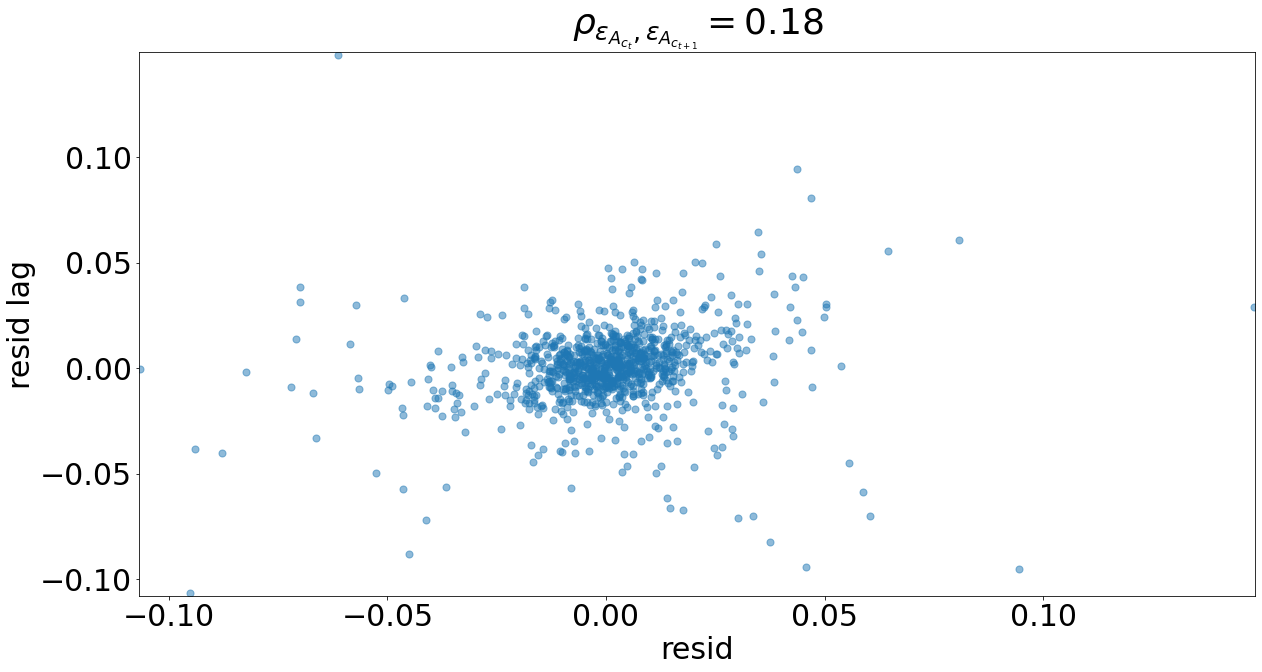

In [48]:
for var in ["y","A"]:
    y_var = ["$" + var + "_{ct}$"]
    X_vars = [y_var[0] + " Lag"]
    reg_data = plot_data
    reg_data[X_vars[0]] = reg_data[y_var[0]].groupby("countrycode").shift()
    reg_data.dropna(inplace = True)
    y = reg_data[y_var]
    X = reg_data[X_vars]

    reg = sm.OLS(y,X)
    results = reg.fit()
    
    
    fig, ax = plt.subplots(figsize = (20,10))
    results.resid.plot.hist(density = True, ax = ax, bins = [-.3 + x * .025 for x in range(25)], alpha = .5)
    ax.axvline(results.resid.mean(), ls = "--", linewidth = 5, color = "k", alpha = .5)
    for i in range(1,3):
        ax.axvline(results.resid.std() * (-1) * i, ls = "--", linewidth = 5 - i, color = "C" + str(i + 1), alpha  = .5)
        ax.axvline(results.resid.std() * (1) * i, ls = "--", linewidth = 5 - i, color = "C" + str(i + 1), alpha  = .5)
    ax.set_title("$\epsilon_{" + var + "_c}$")
    print(results.summary())
    resids = pd.DataFrame([results.resid,results.resid.groupby("countrycode").shift()]).T.rename(columns = {0:"resid", 
                                                                                                            1:"resid lag"}).dropna()
    print(sm.OLS(resids["resid"], resids["resid lag"]).fit().summary())
    fig, ax = plt.subplots(figsize = (20,10))
    resids.plot.scatter(x= "resid", 
                        y ="resid lag", 
                        ax = ax, s = 50, 
                        alpha = .5)
    ax.set_title(
        "$\\rho_{\\epsilon_{" + var + "_{c_t}},\\epsilon_{" + var + "_{c_{t+1}}}} = " + resids.corr().round(3).astype(str)["resid"]["resid lag"] + "$")

# In both regressions of the error term on its lag, the lag of the residual is statistically significant and different from 0. The I.I.D. assumption appears to be violated.